In [93]:
# Importing the required libraries

!pip install nltk pandas numpy sklearn matplotlib scipy
import nltk
import json
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import string
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.preprocessing 
import sklearn.naive_bayes
import sklearn.linear_model
import sklearn.feature_extraction
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/omshripc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/omshripc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/omshripc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/omshripc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Problem 1: Bayes Classifier

Bayes classifiers fall under the class of **generative classifiers**. Generative classifiers attempt to learn the generation process of a dataset, usually by making some assumptions about the process that generates the data. Then such classifiers use the learned model to make a prediction or classify the unseen data. A simple example is a Naïve Bayes Classifier.

### Naïve Bayes classifier
Consider a dataset $\left\{X^{(i)}, Y^{(i)}\right\}_{i=1}^{m}$. Each $X^{(i)}$ is an $n-$dimensional vector of input features. Let $Y^{(i)} \in \{0,1\}$ denote the class to which $X^{(i)}$ belongs (this can be easily extended to multi-class problems as well). A good classifier has to accurately predict the probability that any given input $X$ falls in class $1$ which is $ P(Y=1 | X)$. 

Recall Bayes theorem,

\begin{align}
P(Y|X) &= \frac{P(X|Y)P(Y)}{P(X)} \\
       &= \frac{P(X_1, X_2, \dots, X_n | Y)P(Y)}{P(X_1, X_2, \dots, X_n)}\\
\end{align}

**We use the assumption that features are independent of each other. That is one particular feature does not affect any other feature. Of course these assumptions of independence are rarely true, which is why the model is referred as the "Naïve Bayes" model. However, in practice, Naïve Bayes models have performed surprisingly well even on complex tasks, where it is clear that the strong independence assumptions are false.**

The independence assumption reduces the conditional probability expression to
\begin{align}
P(Y|X) &= \frac{P(X_1 | Y)P(X_2 | Y) \dots P(X_n | Y)P(Y)}{P(X_1)P(X_2)\dots P(X_n)}\\
\end{align}

The terms $P(X_i|Y)$ and $P(X_i)$ can be easily estimated/learned from the dataset. Hence, the value of $P(Y|X)$ can be found for each value of $Y$. Finally, the class to which $X$ belongs is estimated as $arg\max_{Y}P(Y|X)$. Moreover since $X$ is independent of $Y$, it is only required to find $arg\max_{Y}P(X|Y)P(Y).$ For better understanding with an example refer [this](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) article.


### Problem statement and Dataset
In this problem, you would implement, train and test a Naïve Bayes model to learn to classify sentiment (positive/negative) of a given text. The training data is in `all_sentiment_shuffled.txt` file.  You can use the function given below to read the dataset


In [2]:
#Function to read the data from text file 

def read_corpus(corpus_file):
    """ This function reads the file in the location specified by string 
    `corpus_file` and returns a list of tuples (list of words in text, label)
    """
    out = []
    with open(corpus_file) as f:
        for line in f:
            tokens = line.strip().split()
            out.append((' '.join(tokens[3:]), tokens[1]))
    return out

In [3]:
# Reading the data from text file using the above function

corpus = read_corpus('./all_sentiment_shuffled.txt')
print("Example:\n", " Text: ", corpus[0][0], "\n  Label: ", corpus[0][1])
print("Total number of documents =", len(corpus))

Example:
  Text:  i bought this album because i loved the title song . it 's such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n't worth the money i paid for this . it 's either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i 'll get down off my soapbox now . but country music really needs to get back to it 's roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things . 
  Label:  neg
Total number of documents = 11914


### Preprocessing a text document
We can guess that not all the words in a document will be helpful in classification. The words such as "a", "the", "is", etc appear in all the documents randomly and can be neglected or removed. Also a same word can be written in different tenses while conveying the same mood (example "rot"/"rotten"). Hence the documents need to be preprocessed before using them for training the classifier.

 Libraries such as `gensim`, `nltk` contain functions for doing these preprocessing steps, and you are welcome to use such functions in your code. Formally, these are the preprocessings to be done to the input text to make them simpler and which can improve the performance of your model as well.
* **Tokenization**: 
    1.   Split the text into sentences and the sentences into words
    2.   Lowercase the words and remove punctuation
* Remove all **stopwords** (stopwords are commonly used word such as "the", "a", "an", "in")
* Remove all words that have fewer than 3 characters.
* **Lemmatize** the document (words in third person are changed to first person, and verbs in past and future tenses are changed into present).


In [4]:
""" Implement preprocessing functions here. Use the python modules named above 
for implementing the functions. 
"""
# Removes all the punctuations present in the document
def remove_punctuation(doc):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    return tokenizer.tokenize(doc)

# Removes words like 'if', 'he', 'she', 'the', etc which never belongs to any topic
def remove_stopwords(doc):
    stop_words = set(nltk.corpus.stopwords.words('english'))

    processed_doc = []
    for w in doc:
        if w not in stop_words:
            processed_doc.append(w)
    return processed_doc

# lemmatizer is a transformers which transforms the word to its singular, present-tense form
def lemmatize(doc):
    
    return [nltk.WordNetLemmatizer().lemmatize(d,pos = (nltk.pos_tag([d])[0][1][0].lower() if nltk.pos_tag([d])[0][1][0].lower() in ['v'] else 'n')) for d in doc]


def preprocess(doc):
    """ Function to preprocess a single document
    """
    assert isinstance(doc, str) # assert that input is a document and not the corpus
    processed_doc = remove_punctuation(doc)
    processed_doc = remove_stopwords(processed_doc)
    processed_doc = lemmatize((processed_doc))
    return processed_doc

In [5]:
# Creating a dataframe from the given data to handle it easier

data = pd.DataFrame(columns=["Corpus","Class"]) # Dataframe to hold the data
bag_of_words = set() # Set which holds the vocabulary

#Loop to add data to both dataframe and vocabulary

for (i,d) in enumerate(corpus):
    s = preprocess(d[0])
    data.loc[i] = [s,d[1]]
    bag_of_words = bag_of_words.union(set(s))

Corpus Class
0      [bought, album, love, title, song, great, song...   neg
1      [mislead, thought, buying, entire, cd, contain...   neg
2      [introduce, many, ell, high, school, student, ...   neg
3      [anything, purchase, left, behind, series, exc...   pos
4      [love, movie, cant, wiat, third, one, funny, s...   pos
...                                                  ...   ...
11909  [story, dose, n, matter, main, character, fuse...   neg
11910  [like, everything, product, except, little, sl...   pos
11911  [flash, perfect, back, studio, main, flash, fi...   pos
11912  [boughten, gift, turn, aweful, idea, way, loud...   neg
11913  [pedometer, arrive, held, prisoner, difficult,...   neg

[11914 rows x 2 columns]

In [16]:
display(data)

Corpus Class
0      i bought this album because i loved the title ...   neg
1      i was misled and thought i was buying the enti...   neg
2      i have introduced many of my ell , high school...   neg
3      anything you purchase in the left behind serie...   pos
4      i loved these movies , and i cant wiat for the...   pos
...                                                  ...   ...
11909  the story here dose n't matter . the main char...   neg
11910  i liked everything about this product except i...   pos
11911  this flash is the perfect back-up for a studio...   pos
11912  i had boughten this as a gift which turned out...   neg
11913  the pedometer arrive held prisoner in a diffic...   neg

[11914 rows x 2 columns]

In [178]:
display(bag_of_words)

{'haywire',
 'pedophile',
 'gabriella',
 'irreplaceable',
 's770',
 'weil',
 'greyish',
 'win98',
 'booger',
 'villan',
 'ricci',
 'macaroni',
 'dos',
 '40mm',
 'mccartney',
 'cynthia',
 'whitaker',
 'fibromylagia',
 'otha',
 'gerd',
 'hair',
 'quadratic',
 'freeway',
 'seuss',
 'sunbeam',
 'rave',
 'damore',
 'bradley',
 'wayz',
 'explicit',
 'rook',
 'hardest',
 'howp',
 'beating',
 'apiece',
 'levity',
 'stake',
 'dc96',
 'lackluster',
 'imperial',
 'lomborg',
 'summary',
 'speek',
 'dystopian',
 'swede',
 'compositional',
 'bryce',
 'bollweevil',
 'darfur',
 'parinoid',
 'fascism',
 'fallutin',
 'vauderville',
 'sadly',
 'illicit',
 'shadowy',
 'teenage',
 'hopefully',
 'there',
 'weekely',
 'statistical',
 'repellas',
 '5pm',
 'l1812b',
 'flaubert',
 'addtion',
 'abandonment',
 'cuda',
 'harm',
 'voight',
 'keyboardist',
 'answersingenesis',
 'overspill',
 'dandemite',
 'equatorial',
 'pressburger',
 'db',
 'snitch',
 'compel',
 'granger',
 'griselidis',
 'wilhelm',
 'groundbrakin

### Implementation of Naïve Bayes 

You can refer the Naïve Bayes section in [this](https://web.stanford.edu/~jurafsky/slp3/slides/7_NB.pdf) slides (slide #32 has a simple pseudo code) to get a hint about implementation of Naïve Bayes for text classification. Then complete the following functions `train_nb` and `classify_nb`.

NOTE: If you multiply many small probabilities you may run into problems with numeric precision: the probability becomes zero. To handle this problem, it is recommended that you compute the logarithms of the probabilities instead of the probabilities.

In [17]:
# Function to compute the probabilities of each words in bag of words

def train_nb(training_documents):
    
    # Computing the probability of picking a document of given class
    
    n_neg = training_documents.groupby("Class").get_group("neg").count()["Corpus"]
    n_pos = training_documents.groupby("Class").get_group("pos").count()["Corpus"]
    
    P_c_pos = n_pos/(n_pos+n_neg)
    P_c_neg = n_neg/(n_pos+n_neg)
    
    # List to hold all the words in pos and neg class documents
    
    words_pos = []
    words_neg = []
    
    # Loop to add words to above list
    
    for i,row in training_documents.iterrows():
        if(row["Class"]=="pos"):
            words_pos.extend(row["Corpus"])
        else:
            words_neg.extend(row["Corpus"])
    
    # Dictionary which holds the probabilities of each words and the document probabilities
    
    train_P = {}
    
    # Loop to compute probabilities of each word
    
    l = len(bag_of_words)
    p = len(words_pos)
    n = len(words_neg)
    for i,word in enumerate(bag_of_words):
        train_P[word] = {"pos":0,"neg":0}
        train_P[word]["pos"] = ((words_pos.count(word)+1)/(l+p))
        train_P[word]["neg"] = ((words_neg.count(word)+1)/(l+n))
        print("Finished "+str(i+1)+" out of "+str(l))
    train_res = {"P_pos":P_c_pos,"P_neg":P_c_neg,"words":train_P}
    
    # Storing the computer probablities to a file
    
    with open("train_data.json",'w') as f:
        f.write(json.dumps(train_res))

# Function to predict the class of training data

def classify_nb(test_documents,P_c_pos,P_c_neg,train_P):\
    
    # List to hold the predictions
    
    pred = []
    
    # Loop to predict the class
    
    for i,row in test_documents.iterrows():
        pos_p = P_c_pos
        neg_p = P_c_neg
        
        # Loop to find the probability of all classes by summing the logarithm of all the probabilities
        
        for k in row["Corpus"]:
            if(k in train_P.keys()):
                pos_p = pos_p+np.log(train_P[k]["pos"])
                neg_p = neg_p+np.log(train_P[k]["neg"])
        
        # Using the probabilities to estimate the class
        
        if(pos_p>neg_p):
            pred.append("pos")
        else:
            pred.append("neg")
    return pred

# Function to get accuracy

def accuracy_nb(test_document):
    correct = 0
    total = len(test_document)
    for i,row in test_document.iterrows():
        if(row["Class"]==row["Prediction"]):
            correct+=1
    return(correct*100/total)
        

### Train-test split
After reading the dataset, you must split the dataset into training ($80\%$) and test data ($20\%$). Use training data to train the Naïve Bayes classifier and use test data to check the accuracy.

In [7]:
# Train-Test split

train_data_X,test_data_X,train_data_y,test_data_y = sklearn.model_selection.train_test_split(data["Corpus"],data["Class"],train_size = 0.8,random_state=42)

# Converting train-test to dataframes

train_frame = {"Corpus":train_data_X,"Class":train_data_y}
train_data = pd.DataFrame(train_frame)
test_frame = {"Corpus":test_data_X,"Class":test_data_y}
test_data = pd.DataFrame(test_frame)
display(train_data)
display(test_data)
print(train_data.groupby("Class").count())
print(test_data.groupby("Class").count())

Corpus Class
3181   [affirm, positive, comment, reviewer, truck, d...   pos
5357   [great, camera, take, place, earlier, canon, d...   pos
4874   [purchase, wife, valentine, day, installation,...   neg
8102   [like, many, highly, talented, innovative, gro...   pos
10400  [review, unit, large, defect, field, view, one...   neg
...                                                  ...   ...
11284  [lead, character, act, like, sleepwalk, entire...   neg
5191   [im, computer, literate, regularly, use, numbe...   neg
5390   [battery, life, worst, electric, razor, ever, ...   neg
860    [wo, n, stop, bobbin, yo, head, bought, first,...   pos
7270   [read, book, middle, school, watch, movie, sho...   pos

[9531 rows x 2 columns]

Corpus Class
3995   [long, time, act, user, biggest, complaint, re...   neg
7474   [spring, cybershot, august, could, compact, ca...   pos
7300   [much, drama, go, discussion, n, really, care,...   pos
3148   [easy, install, great, tool, easily, download,...   pos
747    [s5000, s5100, disapointed, s5000, power, swit...   neg
...                                                  ...   ...
267    [former, student, m, morris, state, william, m...   neg
4320   [line, song, vato, album, would, n, n_____, n,...   neg
5799   [commentary, many, tremendous, insight, book, ...   pos
6080   [buy, lot, card, always, hallmartk, quality, w...   pos
11511  [work, denise, austin, several, year, think, g...   neg

[2383 rows x 2 columns]

       Corpus
Class        
neg      4705
pos      4826
       Corpus
Class        
neg      1209
pos      1174


In [190]:
# Training using training data

train_nb(train_data)

0.506347707480852

0.49365229251914805

Finished 1 out of 38414
Finished 2 out of 38414
Finished 3 out of 38414
Finished 4 out of 38414
Finished 5 out of 38414
Finished 6 out of 38414
Finished 7 out of 38414
Finished 8 out of 38414
Finished 9 out of 38414
Finished 10 out of 38414
Finished 11 out of 38414
Finished 12 out of 38414
Finished 13 out of 38414
Finished 14 out of 38414
Finished 15 out of 38414
Finished 16 out of 38414
Finished 17 out of 38414
Finished 18 out of 38414
Finished 19 out of 38414
Finished 20 out of 38414
Finished 21 out of 38414
Finished 22 out of 38414
Finished 23 out of 38414
Finished 24 out of 38414
Finished 25 out of 38414
Finished 26 out of 38414
Finished 27 out of 38414
Finished 28 out of 38414
Finished 29 out of 38414
Finished 30 out of 38414
Finished 31 out of 38414
Finished 32 out of 38414
Finished 33 out of 38414
Finished 34 out of 38414
Finished 35 out of 38414
Finished 36 out of 38414
Finished 37 out of 38414
Finished 38 out of 38414
Finished 39 out of 38414
Finished 40 out of 38414
Finished 

Finished 325 out of 38414
Finished 326 out of 38414
Finished 327 out of 38414
Finished 328 out of 38414
Finished 329 out of 38414
Finished 330 out of 38414
Finished 331 out of 38414
Finished 332 out of 38414
Finished 333 out of 38414
Finished 334 out of 38414
Finished 335 out of 38414
Finished 336 out of 38414
Finished 337 out of 38414
Finished 338 out of 38414
Finished 339 out of 38414
Finished 340 out of 38414
Finished 341 out of 38414
Finished 342 out of 38414
Finished 343 out of 38414
Finished 344 out of 38414
Finished 345 out of 38414
Finished 346 out of 38414
Finished 347 out of 38414
Finished 348 out of 38414
Finished 349 out of 38414
Finished 350 out of 38414
Finished 351 out of 38414
Finished 352 out of 38414
Finished 353 out of 38414
Finished 354 out of 38414
Finished 355 out of 38414
Finished 356 out of 38414
Finished 357 out of 38414
Finished 358 out of 38414
Finished 359 out of 38414
Finished 360 out of 38414
Finished 361 out of 38414
Finished 362 out of 38414
Finished 363

Finished 650 out of 38414
Finished 651 out of 38414
Finished 652 out of 38414
Finished 653 out of 38414
Finished 654 out of 38414
Finished 655 out of 38414
Finished 656 out of 38414
Finished 657 out of 38414
Finished 658 out of 38414
Finished 659 out of 38414
Finished 660 out of 38414
Finished 661 out of 38414
Finished 662 out of 38414
Finished 663 out of 38414
Finished 664 out of 38414
Finished 665 out of 38414
Finished 666 out of 38414
Finished 667 out of 38414
Finished 668 out of 38414
Finished 669 out of 38414
Finished 670 out of 38414
Finished 671 out of 38414
Finished 672 out of 38414
Finished 673 out of 38414
Finished 674 out of 38414
Finished 675 out of 38414
Finished 676 out of 38414
Finished 677 out of 38414
Finished 678 out of 38414
Finished 679 out of 38414
Finished 680 out of 38414
Finished 681 out of 38414
Finished 682 out of 38414
Finished 683 out of 38414
Finished 684 out of 38414
Finished 685 out of 38414
Finished 686 out of 38414
Finished 687 out of 38414
Finished 688

Finished 966 out of 38414
Finished 967 out of 38414
Finished 968 out of 38414
Finished 969 out of 38414
Finished 970 out of 38414
Finished 971 out of 38414
Finished 972 out of 38414
Finished 973 out of 38414
Finished 974 out of 38414
Finished 975 out of 38414
Finished 976 out of 38414
Finished 977 out of 38414
Finished 978 out of 38414
Finished 979 out of 38414
Finished 980 out of 38414
Finished 981 out of 38414
Finished 982 out of 38414
Finished 983 out of 38414
Finished 984 out of 38414
Finished 985 out of 38414
Finished 986 out of 38414
Finished 987 out of 38414
Finished 988 out of 38414
Finished 989 out of 38414
Finished 990 out of 38414
Finished 991 out of 38414
Finished 992 out of 38414
Finished 993 out of 38414
Finished 994 out of 38414
Finished 995 out of 38414
Finished 996 out of 38414
Finished 997 out of 38414
Finished 998 out of 38414
Finished 999 out of 38414
Finished 1000 out of 38414
Finished 1001 out of 38414
Finished 1002 out of 38414
Finished 1003 out of 38414
Finished

Finished 1275 out of 38414
Finished 1276 out of 38414
Finished 1277 out of 38414
Finished 1278 out of 38414
Finished 1279 out of 38414
Finished 1280 out of 38414
Finished 1281 out of 38414
Finished 1282 out of 38414
Finished 1283 out of 38414
Finished 1284 out of 38414
Finished 1285 out of 38414
Finished 1286 out of 38414
Finished 1287 out of 38414
Finished 1288 out of 38414
Finished 1289 out of 38414
Finished 1290 out of 38414
Finished 1291 out of 38414
Finished 1292 out of 38414
Finished 1293 out of 38414
Finished 1294 out of 38414
Finished 1295 out of 38414
Finished 1296 out of 38414
Finished 1297 out of 38414
Finished 1298 out of 38414
Finished 1299 out of 38414
Finished 1300 out of 38414
Finished 1301 out of 38414
Finished 1302 out of 38414
Finished 1303 out of 38414
Finished 1304 out of 38414
Finished 1305 out of 38414
Finished 1306 out of 38414
Finished 1307 out of 38414
Finished 1308 out of 38414
Finished 1309 out of 38414
Finished 1310 out of 38414
Finished 1311 out of 38414
F

Finished 1581 out of 38414
Finished 1582 out of 38414
Finished 1583 out of 38414
Finished 1584 out of 38414
Finished 1585 out of 38414
Finished 1586 out of 38414
Finished 1587 out of 38414
Finished 1588 out of 38414
Finished 1589 out of 38414
Finished 1590 out of 38414
Finished 1591 out of 38414
Finished 1592 out of 38414
Finished 1593 out of 38414
Finished 1594 out of 38414
Finished 1595 out of 38414
Finished 1596 out of 38414
Finished 1597 out of 38414
Finished 1598 out of 38414
Finished 1599 out of 38414
Finished 1600 out of 38414
Finished 1601 out of 38414
Finished 1602 out of 38414
Finished 1603 out of 38414
Finished 1604 out of 38414
Finished 1605 out of 38414
Finished 1606 out of 38414
Finished 1607 out of 38414
Finished 1608 out of 38414
Finished 1609 out of 38414
Finished 1610 out of 38414
Finished 1611 out of 38414
Finished 1612 out of 38414
Finished 1613 out of 38414
Finished 1614 out of 38414
Finished 1615 out of 38414
Finished 1616 out of 38414
Finished 1617 out of 38414
F

Finished 1893 out of 38414
Finished 1894 out of 38414
Finished 1895 out of 38414
Finished 1896 out of 38414
Finished 1897 out of 38414
Finished 1898 out of 38414
Finished 1899 out of 38414
Finished 1900 out of 38414
Finished 1901 out of 38414
Finished 1902 out of 38414
Finished 1903 out of 38414
Finished 1904 out of 38414
Finished 1905 out of 38414
Finished 1906 out of 38414
Finished 1907 out of 38414
Finished 1908 out of 38414
Finished 1909 out of 38414
Finished 1910 out of 38414
Finished 1911 out of 38414
Finished 1912 out of 38414
Finished 1913 out of 38414
Finished 1914 out of 38414
Finished 1915 out of 38414
Finished 1916 out of 38414
Finished 1917 out of 38414
Finished 1918 out of 38414
Finished 1919 out of 38414
Finished 1920 out of 38414
Finished 1921 out of 38414
Finished 1922 out of 38414
Finished 1923 out of 38414
Finished 1924 out of 38414
Finished 1925 out of 38414
Finished 1926 out of 38414
Finished 1927 out of 38414
Finished 1928 out of 38414
Finished 1929 out of 38414
F

Finished 2201 out of 38414
Finished 2202 out of 38414
Finished 2203 out of 38414
Finished 2204 out of 38414
Finished 2205 out of 38414
Finished 2206 out of 38414
Finished 2207 out of 38414
Finished 2208 out of 38414
Finished 2209 out of 38414
Finished 2210 out of 38414
Finished 2211 out of 38414
Finished 2212 out of 38414
Finished 2213 out of 38414
Finished 2214 out of 38414
Finished 2215 out of 38414
Finished 2216 out of 38414
Finished 2217 out of 38414
Finished 2218 out of 38414
Finished 2219 out of 38414
Finished 2220 out of 38414
Finished 2221 out of 38414
Finished 2222 out of 38414
Finished 2223 out of 38414
Finished 2224 out of 38414
Finished 2225 out of 38414
Finished 2226 out of 38414
Finished 2227 out of 38414
Finished 2228 out of 38414
Finished 2229 out of 38414
Finished 2230 out of 38414
Finished 2231 out of 38414
Finished 2232 out of 38414
Finished 2233 out of 38414
Finished 2234 out of 38414
Finished 2235 out of 38414
Finished 2236 out of 38414
Finished 2237 out of 38414
F

Finished 2508 out of 38414
Finished 2509 out of 38414
Finished 2510 out of 38414
Finished 2511 out of 38414
Finished 2512 out of 38414
Finished 2513 out of 38414
Finished 2514 out of 38414
Finished 2515 out of 38414
Finished 2516 out of 38414
Finished 2517 out of 38414
Finished 2518 out of 38414
Finished 2519 out of 38414
Finished 2520 out of 38414
Finished 2521 out of 38414
Finished 2522 out of 38414
Finished 2523 out of 38414
Finished 2524 out of 38414
Finished 2525 out of 38414
Finished 2526 out of 38414
Finished 2527 out of 38414
Finished 2528 out of 38414
Finished 2529 out of 38414
Finished 2530 out of 38414
Finished 2531 out of 38414
Finished 2532 out of 38414
Finished 2533 out of 38414
Finished 2534 out of 38414
Finished 2535 out of 38414
Finished 2536 out of 38414
Finished 2537 out of 38414
Finished 2538 out of 38414
Finished 2539 out of 38414
Finished 2540 out of 38414
Finished 2541 out of 38414
Finished 2542 out of 38414
Finished 2543 out of 38414
Finished 2544 out of 38414
F

Finished 2813 out of 38414
Finished 2814 out of 38414
Finished 2815 out of 38414
Finished 2816 out of 38414
Finished 2817 out of 38414
Finished 2818 out of 38414
Finished 2819 out of 38414
Finished 2820 out of 38414
Finished 2821 out of 38414
Finished 2822 out of 38414
Finished 2823 out of 38414
Finished 2824 out of 38414
Finished 2825 out of 38414
Finished 2826 out of 38414
Finished 2827 out of 38414
Finished 2828 out of 38414
Finished 2829 out of 38414
Finished 2830 out of 38414
Finished 2831 out of 38414
Finished 2832 out of 38414
Finished 2833 out of 38414
Finished 2834 out of 38414
Finished 2835 out of 38414
Finished 2836 out of 38414
Finished 2837 out of 38414
Finished 2838 out of 38414
Finished 2839 out of 38414
Finished 2840 out of 38414
Finished 2841 out of 38414
Finished 2842 out of 38414
Finished 2843 out of 38414
Finished 2844 out of 38414
Finished 2845 out of 38414
Finished 2846 out of 38414
Finished 2847 out of 38414
Finished 2848 out of 38414
Finished 2849 out of 38414
F

Finished 3118 out of 38414
Finished 3119 out of 38414
Finished 3120 out of 38414
Finished 3121 out of 38414
Finished 3122 out of 38414
Finished 3123 out of 38414
Finished 3124 out of 38414
Finished 3125 out of 38414
Finished 3126 out of 38414
Finished 3127 out of 38414
Finished 3128 out of 38414
Finished 3129 out of 38414
Finished 3130 out of 38414
Finished 3131 out of 38414
Finished 3132 out of 38414
Finished 3133 out of 38414
Finished 3134 out of 38414
Finished 3135 out of 38414
Finished 3136 out of 38414
Finished 3137 out of 38414
Finished 3138 out of 38414
Finished 3139 out of 38414
Finished 3140 out of 38414
Finished 3141 out of 38414
Finished 3142 out of 38414
Finished 3143 out of 38414
Finished 3144 out of 38414
Finished 3145 out of 38414
Finished 3146 out of 38414
Finished 3147 out of 38414
Finished 3148 out of 38414
Finished 3149 out of 38414
Finished 3150 out of 38414
Finished 3151 out of 38414
Finished 3152 out of 38414
Finished 3153 out of 38414
Finished 3154 out of 38414
F

Finished 3430 out of 38414
Finished 3431 out of 38414
Finished 3432 out of 38414
Finished 3433 out of 38414
Finished 3434 out of 38414
Finished 3435 out of 38414
Finished 3436 out of 38414
Finished 3437 out of 38414
Finished 3438 out of 38414
Finished 3439 out of 38414
Finished 3440 out of 38414
Finished 3441 out of 38414
Finished 3442 out of 38414
Finished 3443 out of 38414
Finished 3444 out of 38414
Finished 3445 out of 38414
Finished 3446 out of 38414
Finished 3447 out of 38414
Finished 3448 out of 38414
Finished 3449 out of 38414
Finished 3450 out of 38414
Finished 3451 out of 38414
Finished 3452 out of 38414
Finished 3453 out of 38414
Finished 3454 out of 38414
Finished 3455 out of 38414
Finished 3456 out of 38414
Finished 3457 out of 38414
Finished 3458 out of 38414
Finished 3459 out of 38414
Finished 3460 out of 38414
Finished 3461 out of 38414
Finished 3462 out of 38414
Finished 3463 out of 38414
Finished 3464 out of 38414
Finished 3465 out of 38414
Finished 3466 out of 38414
F

Finished 3743 out of 38414
Finished 3744 out of 38414
Finished 3745 out of 38414
Finished 3746 out of 38414
Finished 3747 out of 38414
Finished 3748 out of 38414
Finished 3749 out of 38414
Finished 3750 out of 38414
Finished 3751 out of 38414
Finished 3752 out of 38414
Finished 3753 out of 38414
Finished 3754 out of 38414
Finished 3755 out of 38414
Finished 3756 out of 38414
Finished 3757 out of 38414
Finished 3758 out of 38414
Finished 3759 out of 38414
Finished 3760 out of 38414
Finished 3761 out of 38414
Finished 3762 out of 38414
Finished 3763 out of 38414
Finished 3764 out of 38414
Finished 3765 out of 38414
Finished 3766 out of 38414
Finished 3767 out of 38414
Finished 3768 out of 38414
Finished 3769 out of 38414
Finished 3770 out of 38414
Finished 3771 out of 38414
Finished 3772 out of 38414
Finished 3773 out of 38414
Finished 3774 out of 38414
Finished 3775 out of 38414
Finished 3776 out of 38414
Finished 3777 out of 38414
Finished 3778 out of 38414
Finished 3779 out of 38414
F

Finished 4048 out of 38414
Finished 4049 out of 38414
Finished 4050 out of 38414
Finished 4051 out of 38414
Finished 4052 out of 38414
Finished 4053 out of 38414
Finished 4054 out of 38414
Finished 4055 out of 38414
Finished 4056 out of 38414
Finished 4057 out of 38414
Finished 4058 out of 38414
Finished 4059 out of 38414
Finished 4060 out of 38414
Finished 4061 out of 38414
Finished 4062 out of 38414
Finished 4063 out of 38414
Finished 4064 out of 38414
Finished 4065 out of 38414
Finished 4066 out of 38414
Finished 4067 out of 38414
Finished 4068 out of 38414
Finished 4069 out of 38414
Finished 4070 out of 38414
Finished 4071 out of 38414
Finished 4072 out of 38414
Finished 4073 out of 38414
Finished 4074 out of 38414
Finished 4075 out of 38414
Finished 4076 out of 38414
Finished 4077 out of 38414
Finished 4078 out of 38414
Finished 4079 out of 38414
Finished 4080 out of 38414
Finished 4081 out of 38414
Finished 4082 out of 38414
Finished 4083 out of 38414
Finished 4084 out of 38414
F

Finished 4352 out of 38414
Finished 4353 out of 38414
Finished 4354 out of 38414
Finished 4355 out of 38414
Finished 4356 out of 38414
Finished 4357 out of 38414
Finished 4358 out of 38414
Finished 4359 out of 38414
Finished 4360 out of 38414
Finished 4361 out of 38414
Finished 4362 out of 38414
Finished 4363 out of 38414
Finished 4364 out of 38414
Finished 4365 out of 38414
Finished 4366 out of 38414
Finished 4367 out of 38414
Finished 4368 out of 38414
Finished 4369 out of 38414
Finished 4370 out of 38414
Finished 4371 out of 38414
Finished 4372 out of 38414
Finished 4373 out of 38414
Finished 4374 out of 38414
Finished 4375 out of 38414
Finished 4376 out of 38414
Finished 4377 out of 38414
Finished 4378 out of 38414
Finished 4379 out of 38414
Finished 4380 out of 38414
Finished 4381 out of 38414
Finished 4382 out of 38414
Finished 4383 out of 38414
Finished 4384 out of 38414
Finished 4385 out of 38414
Finished 4386 out of 38414
Finished 4387 out of 38414
Finished 4388 out of 38414
F

Finished 4661 out of 38414
Finished 4662 out of 38414
Finished 4663 out of 38414
Finished 4664 out of 38414
Finished 4665 out of 38414
Finished 4666 out of 38414
Finished 4667 out of 38414
Finished 4668 out of 38414
Finished 4669 out of 38414
Finished 4670 out of 38414
Finished 4671 out of 38414
Finished 4672 out of 38414
Finished 4673 out of 38414
Finished 4674 out of 38414
Finished 4675 out of 38414
Finished 4676 out of 38414
Finished 4677 out of 38414
Finished 4678 out of 38414
Finished 4679 out of 38414
Finished 4680 out of 38414
Finished 4681 out of 38414
Finished 4682 out of 38414
Finished 4683 out of 38414
Finished 4684 out of 38414
Finished 4685 out of 38414
Finished 4686 out of 38414
Finished 4687 out of 38414
Finished 4688 out of 38414
Finished 4689 out of 38414
Finished 4690 out of 38414
Finished 4691 out of 38414
Finished 4692 out of 38414
Finished 4693 out of 38414
Finished 4694 out of 38414
Finished 4695 out of 38414
Finished 4696 out of 38414
Finished 4697 out of 38414
F

Finished 4970 out of 38414
Finished 4971 out of 38414
Finished 4972 out of 38414
Finished 4973 out of 38414
Finished 4974 out of 38414
Finished 4975 out of 38414
Finished 4976 out of 38414
Finished 4977 out of 38414
Finished 4978 out of 38414
Finished 4979 out of 38414
Finished 4980 out of 38414
Finished 4981 out of 38414
Finished 4982 out of 38414
Finished 4983 out of 38414
Finished 4984 out of 38414
Finished 4985 out of 38414
Finished 4986 out of 38414
Finished 4987 out of 38414
Finished 4988 out of 38414
Finished 4989 out of 38414
Finished 4990 out of 38414
Finished 4991 out of 38414
Finished 4992 out of 38414
Finished 4993 out of 38414
Finished 4994 out of 38414
Finished 4995 out of 38414
Finished 4996 out of 38414
Finished 4997 out of 38414
Finished 4998 out of 38414
Finished 4999 out of 38414
Finished 5000 out of 38414
Finished 5001 out of 38414
Finished 5002 out of 38414
Finished 5003 out of 38414
Finished 5004 out of 38414
Finished 5005 out of 38414
Finished 5006 out of 38414
F

Finished 5276 out of 38414
Finished 5277 out of 38414
Finished 5278 out of 38414
Finished 5279 out of 38414
Finished 5280 out of 38414
Finished 5281 out of 38414
Finished 5282 out of 38414
Finished 5283 out of 38414
Finished 5284 out of 38414
Finished 5285 out of 38414
Finished 5286 out of 38414
Finished 5287 out of 38414
Finished 5288 out of 38414
Finished 5289 out of 38414
Finished 5290 out of 38414
Finished 5291 out of 38414
Finished 5292 out of 38414
Finished 5293 out of 38414
Finished 5294 out of 38414
Finished 5295 out of 38414
Finished 5296 out of 38414
Finished 5297 out of 38414
Finished 5298 out of 38414
Finished 5299 out of 38414
Finished 5300 out of 38414
Finished 5301 out of 38414
Finished 5302 out of 38414
Finished 5303 out of 38414
Finished 5304 out of 38414
Finished 5305 out of 38414
Finished 5306 out of 38414
Finished 5307 out of 38414
Finished 5308 out of 38414
Finished 5309 out of 38414
Finished 5310 out of 38414
Finished 5311 out of 38414
Finished 5312 out of 38414
F

Finished 5587 out of 38414
Finished 5588 out of 38414
Finished 5589 out of 38414
Finished 5590 out of 38414
Finished 5591 out of 38414
Finished 5592 out of 38414
Finished 5593 out of 38414
Finished 5594 out of 38414
Finished 5595 out of 38414
Finished 5596 out of 38414
Finished 5597 out of 38414
Finished 5598 out of 38414
Finished 5599 out of 38414
Finished 5600 out of 38414
Finished 5601 out of 38414
Finished 5602 out of 38414
Finished 5603 out of 38414
Finished 5604 out of 38414
Finished 5605 out of 38414
Finished 5606 out of 38414
Finished 5607 out of 38414
Finished 5608 out of 38414
Finished 5609 out of 38414
Finished 5610 out of 38414
Finished 5611 out of 38414
Finished 5612 out of 38414
Finished 5613 out of 38414
Finished 5614 out of 38414
Finished 5615 out of 38414
Finished 5616 out of 38414
Finished 5617 out of 38414
Finished 5618 out of 38414
Finished 5619 out of 38414
Finished 5620 out of 38414
Finished 5621 out of 38414
Finished 5622 out of 38414
Finished 5623 out of 38414
F

Finished 5901 out of 38414
Finished 5902 out of 38414
Finished 5903 out of 38414
Finished 5904 out of 38414
Finished 5905 out of 38414
Finished 5906 out of 38414
Finished 5907 out of 38414
Finished 5908 out of 38414
Finished 5909 out of 38414
Finished 5910 out of 38414
Finished 5911 out of 38414
Finished 5912 out of 38414
Finished 5913 out of 38414
Finished 5914 out of 38414
Finished 5915 out of 38414
Finished 5916 out of 38414
Finished 5917 out of 38414
Finished 5918 out of 38414
Finished 5919 out of 38414
Finished 5920 out of 38414
Finished 5921 out of 38414
Finished 5922 out of 38414
Finished 5923 out of 38414
Finished 5924 out of 38414
Finished 5925 out of 38414
Finished 5926 out of 38414
Finished 5927 out of 38414
Finished 5928 out of 38414
Finished 5929 out of 38414
Finished 5930 out of 38414
Finished 5931 out of 38414
Finished 5932 out of 38414
Finished 5933 out of 38414
Finished 5934 out of 38414
Finished 5935 out of 38414
Finished 5936 out of 38414
Finished 5937 out of 38414
F

Finished 6208 out of 38414
Finished 6209 out of 38414
Finished 6210 out of 38414
Finished 6211 out of 38414
Finished 6212 out of 38414
Finished 6213 out of 38414
Finished 6214 out of 38414
Finished 6215 out of 38414
Finished 6216 out of 38414
Finished 6217 out of 38414
Finished 6218 out of 38414
Finished 6219 out of 38414
Finished 6220 out of 38414
Finished 6221 out of 38414
Finished 6222 out of 38414
Finished 6223 out of 38414
Finished 6224 out of 38414
Finished 6225 out of 38414
Finished 6226 out of 38414
Finished 6227 out of 38414
Finished 6228 out of 38414
Finished 6229 out of 38414
Finished 6230 out of 38414
Finished 6231 out of 38414
Finished 6232 out of 38414
Finished 6233 out of 38414
Finished 6234 out of 38414
Finished 6235 out of 38414
Finished 6236 out of 38414
Finished 6237 out of 38414
Finished 6238 out of 38414
Finished 6239 out of 38414
Finished 6240 out of 38414
Finished 6241 out of 38414
Finished 6242 out of 38414
Finished 6243 out of 38414
Finished 6244 out of 38414
F

Finished 6512 out of 38414
Finished 6513 out of 38414
Finished 6514 out of 38414
Finished 6515 out of 38414
Finished 6516 out of 38414
Finished 6517 out of 38414
Finished 6518 out of 38414
Finished 6519 out of 38414
Finished 6520 out of 38414
Finished 6521 out of 38414
Finished 6522 out of 38414
Finished 6523 out of 38414
Finished 6524 out of 38414
Finished 6525 out of 38414
Finished 6526 out of 38414
Finished 6527 out of 38414
Finished 6528 out of 38414
Finished 6529 out of 38414
Finished 6530 out of 38414
Finished 6531 out of 38414
Finished 6532 out of 38414
Finished 6533 out of 38414
Finished 6534 out of 38414
Finished 6535 out of 38414
Finished 6536 out of 38414
Finished 6537 out of 38414
Finished 6538 out of 38414
Finished 6539 out of 38414
Finished 6540 out of 38414
Finished 6541 out of 38414
Finished 6542 out of 38414
Finished 6543 out of 38414
Finished 6544 out of 38414
Finished 6545 out of 38414
Finished 6546 out of 38414
Finished 6547 out of 38414
Finished 6548 out of 38414
F

Finished 6817 out of 38414
Finished 6818 out of 38414
Finished 6819 out of 38414
Finished 6820 out of 38414
Finished 6821 out of 38414
Finished 6822 out of 38414
Finished 6823 out of 38414
Finished 6824 out of 38414
Finished 6825 out of 38414
Finished 6826 out of 38414
Finished 6827 out of 38414
Finished 6828 out of 38414
Finished 6829 out of 38414
Finished 6830 out of 38414
Finished 6831 out of 38414
Finished 6832 out of 38414
Finished 6833 out of 38414
Finished 6834 out of 38414
Finished 6835 out of 38414
Finished 6836 out of 38414
Finished 6837 out of 38414
Finished 6838 out of 38414
Finished 6839 out of 38414
Finished 6840 out of 38414
Finished 6841 out of 38414
Finished 6842 out of 38414
Finished 6843 out of 38414
Finished 6844 out of 38414
Finished 6845 out of 38414
Finished 6846 out of 38414
Finished 6847 out of 38414
Finished 6848 out of 38414
Finished 6849 out of 38414
Finished 6850 out of 38414
Finished 6851 out of 38414
Finished 6852 out of 38414
Finished 6853 out of 38414
F

Finished 7125 out of 38414
Finished 7126 out of 38414
Finished 7127 out of 38414
Finished 7128 out of 38414
Finished 7129 out of 38414
Finished 7130 out of 38414
Finished 7131 out of 38414
Finished 7132 out of 38414
Finished 7133 out of 38414
Finished 7134 out of 38414
Finished 7135 out of 38414
Finished 7136 out of 38414
Finished 7137 out of 38414
Finished 7138 out of 38414
Finished 7139 out of 38414
Finished 7140 out of 38414
Finished 7141 out of 38414
Finished 7142 out of 38414
Finished 7143 out of 38414
Finished 7144 out of 38414
Finished 7145 out of 38414
Finished 7146 out of 38414
Finished 7147 out of 38414
Finished 7148 out of 38414
Finished 7149 out of 38414
Finished 7150 out of 38414
Finished 7151 out of 38414
Finished 7152 out of 38414
Finished 7153 out of 38414
Finished 7154 out of 38414
Finished 7155 out of 38414
Finished 7156 out of 38414
Finished 7157 out of 38414
Finished 7158 out of 38414
Finished 7159 out of 38414
Finished 7160 out of 38414
Finished 7161 out of 38414
F

Finished 7431 out of 38414
Finished 7432 out of 38414
Finished 7433 out of 38414
Finished 7434 out of 38414
Finished 7435 out of 38414
Finished 7436 out of 38414
Finished 7437 out of 38414
Finished 7438 out of 38414
Finished 7439 out of 38414
Finished 7440 out of 38414
Finished 7441 out of 38414
Finished 7442 out of 38414
Finished 7443 out of 38414
Finished 7444 out of 38414
Finished 7445 out of 38414
Finished 7446 out of 38414
Finished 7447 out of 38414
Finished 7448 out of 38414
Finished 7449 out of 38414
Finished 7450 out of 38414
Finished 7451 out of 38414
Finished 7452 out of 38414
Finished 7453 out of 38414
Finished 7454 out of 38414
Finished 7455 out of 38414
Finished 7456 out of 38414
Finished 7457 out of 38414
Finished 7458 out of 38414
Finished 7459 out of 38414
Finished 7460 out of 38414
Finished 7461 out of 38414
Finished 7462 out of 38414
Finished 7463 out of 38414
Finished 7464 out of 38414
Finished 7465 out of 38414
Finished 7466 out of 38414
Finished 7467 out of 38414
F

Finished 7739 out of 38414
Finished 7740 out of 38414
Finished 7741 out of 38414
Finished 7742 out of 38414
Finished 7743 out of 38414
Finished 7744 out of 38414
Finished 7745 out of 38414
Finished 7746 out of 38414
Finished 7747 out of 38414
Finished 7748 out of 38414
Finished 7749 out of 38414
Finished 7750 out of 38414
Finished 7751 out of 38414
Finished 7752 out of 38414
Finished 7753 out of 38414
Finished 7754 out of 38414
Finished 7755 out of 38414
Finished 7756 out of 38414
Finished 7757 out of 38414
Finished 7758 out of 38414
Finished 7759 out of 38414
Finished 7760 out of 38414
Finished 7761 out of 38414
Finished 7762 out of 38414
Finished 7763 out of 38414
Finished 7764 out of 38414
Finished 7765 out of 38414
Finished 7766 out of 38414
Finished 7767 out of 38414
Finished 7768 out of 38414
Finished 7769 out of 38414
Finished 7770 out of 38414
Finished 7771 out of 38414
Finished 7772 out of 38414
Finished 7773 out of 38414
Finished 7774 out of 38414
Finished 7775 out of 38414
F

Finished 8049 out of 38414
Finished 8050 out of 38414
Finished 8051 out of 38414
Finished 8052 out of 38414
Finished 8053 out of 38414
Finished 8054 out of 38414
Finished 8055 out of 38414
Finished 8056 out of 38414
Finished 8057 out of 38414
Finished 8058 out of 38414
Finished 8059 out of 38414
Finished 8060 out of 38414
Finished 8061 out of 38414
Finished 8062 out of 38414
Finished 8063 out of 38414
Finished 8064 out of 38414
Finished 8065 out of 38414
Finished 8066 out of 38414
Finished 8067 out of 38414
Finished 8068 out of 38414
Finished 8069 out of 38414
Finished 8070 out of 38414
Finished 8071 out of 38414
Finished 8072 out of 38414
Finished 8073 out of 38414
Finished 8074 out of 38414
Finished 8075 out of 38414
Finished 8076 out of 38414
Finished 8077 out of 38414
Finished 8078 out of 38414
Finished 8079 out of 38414
Finished 8080 out of 38414
Finished 8081 out of 38414
Finished 8082 out of 38414
Finished 8083 out of 38414
Finished 8084 out of 38414
Finished 8085 out of 38414
F

Finished 8365 out of 38414
Finished 8366 out of 38414
Finished 8367 out of 38414
Finished 8368 out of 38414
Finished 8369 out of 38414
Finished 8370 out of 38414
Finished 8371 out of 38414
Finished 8372 out of 38414
Finished 8373 out of 38414
Finished 8374 out of 38414
Finished 8375 out of 38414
Finished 8376 out of 38414
Finished 8377 out of 38414
Finished 8378 out of 38414
Finished 8379 out of 38414
Finished 8380 out of 38414
Finished 8381 out of 38414
Finished 8382 out of 38414
Finished 8383 out of 38414
Finished 8384 out of 38414
Finished 8385 out of 38414
Finished 8386 out of 38414
Finished 8387 out of 38414
Finished 8388 out of 38414
Finished 8389 out of 38414
Finished 8390 out of 38414
Finished 8391 out of 38414
Finished 8392 out of 38414
Finished 8393 out of 38414
Finished 8394 out of 38414
Finished 8395 out of 38414
Finished 8396 out of 38414
Finished 8397 out of 38414
Finished 8398 out of 38414
Finished 8399 out of 38414
Finished 8400 out of 38414
Finished 8401 out of 38414
F

Finished 8676 out of 38414
Finished 8677 out of 38414
Finished 8678 out of 38414
Finished 8679 out of 38414
Finished 8680 out of 38414
Finished 8681 out of 38414
Finished 8682 out of 38414
Finished 8683 out of 38414
Finished 8684 out of 38414
Finished 8685 out of 38414
Finished 8686 out of 38414
Finished 8687 out of 38414
Finished 8688 out of 38414
Finished 8689 out of 38414
Finished 8690 out of 38414
Finished 8691 out of 38414
Finished 8692 out of 38414
Finished 8693 out of 38414
Finished 8694 out of 38414
Finished 8695 out of 38414
Finished 8696 out of 38414
Finished 8697 out of 38414
Finished 8698 out of 38414
Finished 8699 out of 38414
Finished 8700 out of 38414
Finished 8701 out of 38414
Finished 8702 out of 38414
Finished 8703 out of 38414
Finished 8704 out of 38414
Finished 8705 out of 38414
Finished 8706 out of 38414
Finished 8707 out of 38414
Finished 8708 out of 38414
Finished 8709 out of 38414
Finished 8710 out of 38414
Finished 8711 out of 38414
Finished 8712 out of 38414
F

Finished 8983 out of 38414
Finished 8984 out of 38414
Finished 8985 out of 38414
Finished 8986 out of 38414
Finished 8987 out of 38414
Finished 8988 out of 38414
Finished 8989 out of 38414
Finished 8990 out of 38414
Finished 8991 out of 38414
Finished 8992 out of 38414
Finished 8993 out of 38414
Finished 8994 out of 38414
Finished 8995 out of 38414
Finished 8996 out of 38414
Finished 8997 out of 38414
Finished 8998 out of 38414
Finished 8999 out of 38414
Finished 9000 out of 38414
Finished 9001 out of 38414
Finished 9002 out of 38414
Finished 9003 out of 38414
Finished 9004 out of 38414
Finished 9005 out of 38414
Finished 9006 out of 38414
Finished 9007 out of 38414
Finished 9008 out of 38414
Finished 9009 out of 38414
Finished 9010 out of 38414
Finished 9011 out of 38414
Finished 9012 out of 38414
Finished 9013 out of 38414
Finished 9014 out of 38414
Finished 9015 out of 38414
Finished 9016 out of 38414
Finished 9017 out of 38414
Finished 9018 out of 38414
Finished 9019 out of 38414
F

Finished 9294 out of 38414
Finished 9295 out of 38414
Finished 9296 out of 38414
Finished 9297 out of 38414
Finished 9298 out of 38414
Finished 9299 out of 38414
Finished 9300 out of 38414
Finished 9301 out of 38414
Finished 9302 out of 38414
Finished 9303 out of 38414
Finished 9304 out of 38414
Finished 9305 out of 38414
Finished 9306 out of 38414
Finished 9307 out of 38414
Finished 9308 out of 38414
Finished 9309 out of 38414
Finished 9310 out of 38414
Finished 9311 out of 38414
Finished 9312 out of 38414
Finished 9313 out of 38414
Finished 9314 out of 38414
Finished 9315 out of 38414
Finished 9316 out of 38414
Finished 9317 out of 38414
Finished 9318 out of 38414
Finished 9319 out of 38414
Finished 9320 out of 38414
Finished 9321 out of 38414
Finished 9322 out of 38414
Finished 9323 out of 38414
Finished 9324 out of 38414
Finished 9325 out of 38414
Finished 9326 out of 38414
Finished 9327 out of 38414
Finished 9328 out of 38414
Finished 9329 out of 38414
Finished 9330 out of 38414
F

Finished 9602 out of 38414
Finished 9603 out of 38414
Finished 9604 out of 38414
Finished 9605 out of 38414
Finished 9606 out of 38414
Finished 9607 out of 38414
Finished 9608 out of 38414
Finished 9609 out of 38414
Finished 9610 out of 38414
Finished 9611 out of 38414
Finished 9612 out of 38414
Finished 9613 out of 38414
Finished 9614 out of 38414
Finished 9615 out of 38414
Finished 9616 out of 38414
Finished 9617 out of 38414
Finished 9618 out of 38414
Finished 9619 out of 38414
Finished 9620 out of 38414
Finished 9621 out of 38414
Finished 9622 out of 38414
Finished 9623 out of 38414
Finished 9624 out of 38414
Finished 9625 out of 38414
Finished 9626 out of 38414
Finished 9627 out of 38414
Finished 9628 out of 38414
Finished 9629 out of 38414
Finished 9630 out of 38414
Finished 9631 out of 38414
Finished 9632 out of 38414
Finished 9633 out of 38414
Finished 9634 out of 38414
Finished 9635 out of 38414
Finished 9636 out of 38414
Finished 9637 out of 38414
Finished 9638 out of 38414
F

Finished 9916 out of 38414
Finished 9917 out of 38414
Finished 9918 out of 38414
Finished 9919 out of 38414
Finished 9920 out of 38414
Finished 9921 out of 38414
Finished 9922 out of 38414
Finished 9923 out of 38414
Finished 9924 out of 38414
Finished 9925 out of 38414
Finished 9926 out of 38414
Finished 9927 out of 38414
Finished 9928 out of 38414
Finished 9929 out of 38414
Finished 9930 out of 38414
Finished 9931 out of 38414
Finished 9932 out of 38414
Finished 9933 out of 38414
Finished 9934 out of 38414
Finished 9935 out of 38414
Finished 9936 out of 38414
Finished 9937 out of 38414
Finished 9938 out of 38414
Finished 9939 out of 38414
Finished 9940 out of 38414
Finished 9941 out of 38414
Finished 9942 out of 38414
Finished 9943 out of 38414
Finished 9944 out of 38414
Finished 9945 out of 38414
Finished 9946 out of 38414
Finished 9947 out of 38414
Finished 9948 out of 38414
Finished 9949 out of 38414
Finished 9950 out of 38414
Finished 9951 out of 38414
Finished 9952 out of 38414
F

Finished 10216 out of 38414
Finished 10217 out of 38414
Finished 10218 out of 38414
Finished 10219 out of 38414
Finished 10220 out of 38414
Finished 10221 out of 38414
Finished 10222 out of 38414
Finished 10223 out of 38414
Finished 10224 out of 38414
Finished 10225 out of 38414
Finished 10226 out of 38414
Finished 10227 out of 38414
Finished 10228 out of 38414
Finished 10229 out of 38414
Finished 10230 out of 38414
Finished 10231 out of 38414
Finished 10232 out of 38414
Finished 10233 out of 38414
Finished 10234 out of 38414
Finished 10235 out of 38414
Finished 10236 out of 38414
Finished 10237 out of 38414
Finished 10238 out of 38414
Finished 10239 out of 38414
Finished 10240 out of 38414
Finished 10241 out of 38414
Finished 10242 out of 38414
Finished 10243 out of 38414
Finished 10244 out of 38414
Finished 10245 out of 38414
Finished 10246 out of 38414
Finished 10247 out of 38414
Finished 10248 out of 38414
Finished 10249 out of 38414
Finished 10250 out of 38414
Finished 10251 out o

Finished 10517 out of 38414
Finished 10518 out of 38414
Finished 10519 out of 38414
Finished 10520 out of 38414
Finished 10521 out of 38414
Finished 10522 out of 38414
Finished 10523 out of 38414
Finished 10524 out of 38414
Finished 10525 out of 38414
Finished 10526 out of 38414
Finished 10527 out of 38414
Finished 10528 out of 38414
Finished 10529 out of 38414
Finished 10530 out of 38414
Finished 10531 out of 38414
Finished 10532 out of 38414
Finished 10533 out of 38414
Finished 10534 out of 38414
Finished 10535 out of 38414
Finished 10536 out of 38414
Finished 10537 out of 38414
Finished 10538 out of 38414
Finished 10539 out of 38414
Finished 10540 out of 38414
Finished 10541 out of 38414
Finished 10542 out of 38414
Finished 10543 out of 38414
Finished 10544 out of 38414
Finished 10545 out of 38414
Finished 10546 out of 38414
Finished 10547 out of 38414
Finished 10548 out of 38414
Finished 10549 out of 38414
Finished 10550 out of 38414
Finished 10551 out of 38414
Finished 10552 out o

Finished 10819 out of 38414
Finished 10820 out of 38414
Finished 10821 out of 38414
Finished 10822 out of 38414
Finished 10823 out of 38414
Finished 10824 out of 38414
Finished 10825 out of 38414
Finished 10826 out of 38414
Finished 10827 out of 38414
Finished 10828 out of 38414
Finished 10829 out of 38414
Finished 10830 out of 38414
Finished 10831 out of 38414
Finished 10832 out of 38414
Finished 10833 out of 38414
Finished 10834 out of 38414
Finished 10835 out of 38414
Finished 10836 out of 38414
Finished 10837 out of 38414
Finished 10838 out of 38414
Finished 10839 out of 38414
Finished 10840 out of 38414
Finished 10841 out of 38414
Finished 10842 out of 38414
Finished 10843 out of 38414
Finished 10844 out of 38414
Finished 10845 out of 38414
Finished 10846 out of 38414
Finished 10847 out of 38414
Finished 10848 out of 38414
Finished 10849 out of 38414
Finished 10850 out of 38414
Finished 10851 out of 38414
Finished 10852 out of 38414
Finished 10853 out of 38414
Finished 10854 out o

Finished 11120 out of 38414
Finished 11121 out of 38414
Finished 11122 out of 38414
Finished 11123 out of 38414
Finished 11124 out of 38414
Finished 11125 out of 38414
Finished 11126 out of 38414
Finished 11127 out of 38414
Finished 11128 out of 38414
Finished 11129 out of 38414
Finished 11130 out of 38414
Finished 11131 out of 38414
Finished 11132 out of 38414
Finished 11133 out of 38414
Finished 11134 out of 38414
Finished 11135 out of 38414
Finished 11136 out of 38414
Finished 11137 out of 38414
Finished 11138 out of 38414
Finished 11139 out of 38414
Finished 11140 out of 38414
Finished 11141 out of 38414
Finished 11142 out of 38414
Finished 11143 out of 38414
Finished 11144 out of 38414
Finished 11145 out of 38414
Finished 11146 out of 38414
Finished 11147 out of 38414
Finished 11148 out of 38414
Finished 11149 out of 38414
Finished 11150 out of 38414
Finished 11151 out of 38414
Finished 11152 out of 38414
Finished 11153 out of 38414
Finished 11154 out of 38414
Finished 11155 out o

Finished 11425 out of 38414
Finished 11426 out of 38414
Finished 11427 out of 38414
Finished 11428 out of 38414
Finished 11429 out of 38414
Finished 11430 out of 38414
Finished 11431 out of 38414
Finished 11432 out of 38414
Finished 11433 out of 38414
Finished 11434 out of 38414
Finished 11435 out of 38414
Finished 11436 out of 38414
Finished 11437 out of 38414
Finished 11438 out of 38414
Finished 11439 out of 38414
Finished 11440 out of 38414
Finished 11441 out of 38414
Finished 11442 out of 38414
Finished 11443 out of 38414
Finished 11444 out of 38414
Finished 11445 out of 38414
Finished 11446 out of 38414
Finished 11447 out of 38414
Finished 11448 out of 38414
Finished 11449 out of 38414
Finished 11450 out of 38414
Finished 11451 out of 38414
Finished 11452 out of 38414
Finished 11453 out of 38414
Finished 11454 out of 38414
Finished 11455 out of 38414
Finished 11456 out of 38414
Finished 11457 out of 38414
Finished 11458 out of 38414
Finished 11459 out of 38414
Finished 11460 out o

Finished 11730 out of 38414
Finished 11731 out of 38414
Finished 11732 out of 38414
Finished 11733 out of 38414
Finished 11734 out of 38414
Finished 11735 out of 38414
Finished 11736 out of 38414
Finished 11737 out of 38414
Finished 11738 out of 38414
Finished 11739 out of 38414
Finished 11740 out of 38414
Finished 11741 out of 38414
Finished 11742 out of 38414
Finished 11743 out of 38414
Finished 11744 out of 38414
Finished 11745 out of 38414
Finished 11746 out of 38414
Finished 11747 out of 38414
Finished 11748 out of 38414
Finished 11749 out of 38414
Finished 11750 out of 38414
Finished 11751 out of 38414
Finished 11752 out of 38414
Finished 11753 out of 38414
Finished 11754 out of 38414
Finished 11755 out of 38414
Finished 11756 out of 38414
Finished 11757 out of 38414
Finished 11758 out of 38414
Finished 11759 out of 38414
Finished 11760 out of 38414
Finished 11761 out of 38414
Finished 11762 out of 38414
Finished 11763 out of 38414
Finished 11764 out of 38414
Finished 11765 out o

Finished 12034 out of 38414
Finished 12035 out of 38414
Finished 12036 out of 38414
Finished 12037 out of 38414
Finished 12038 out of 38414
Finished 12039 out of 38414
Finished 12040 out of 38414
Finished 12041 out of 38414
Finished 12042 out of 38414
Finished 12043 out of 38414
Finished 12044 out of 38414
Finished 12045 out of 38414
Finished 12046 out of 38414
Finished 12047 out of 38414
Finished 12048 out of 38414
Finished 12049 out of 38414
Finished 12050 out of 38414
Finished 12051 out of 38414
Finished 12052 out of 38414
Finished 12053 out of 38414
Finished 12054 out of 38414
Finished 12055 out of 38414
Finished 12056 out of 38414
Finished 12057 out of 38414
Finished 12058 out of 38414
Finished 12059 out of 38414
Finished 12060 out of 38414
Finished 12061 out of 38414
Finished 12062 out of 38414
Finished 12063 out of 38414
Finished 12064 out of 38414
Finished 12065 out of 38414
Finished 12066 out of 38414
Finished 12067 out of 38414
Finished 12068 out of 38414
Finished 12069 out o

Finished 12334 out of 38414
Finished 12335 out of 38414
Finished 12336 out of 38414
Finished 12337 out of 38414
Finished 12338 out of 38414
Finished 12339 out of 38414
Finished 12340 out of 38414
Finished 12341 out of 38414
Finished 12342 out of 38414
Finished 12343 out of 38414
Finished 12344 out of 38414
Finished 12345 out of 38414
Finished 12346 out of 38414
Finished 12347 out of 38414
Finished 12348 out of 38414
Finished 12349 out of 38414
Finished 12350 out of 38414
Finished 12351 out of 38414
Finished 12352 out of 38414
Finished 12353 out of 38414
Finished 12354 out of 38414
Finished 12355 out of 38414
Finished 12356 out of 38414
Finished 12357 out of 38414
Finished 12358 out of 38414
Finished 12359 out of 38414
Finished 12360 out of 38414
Finished 12361 out of 38414
Finished 12362 out of 38414
Finished 12363 out of 38414
Finished 12364 out of 38414
Finished 12365 out of 38414
Finished 12366 out of 38414
Finished 12367 out of 38414
Finished 12368 out of 38414
Finished 12369 out o

Finished 12633 out of 38414
Finished 12634 out of 38414
Finished 12635 out of 38414
Finished 12636 out of 38414
Finished 12637 out of 38414
Finished 12638 out of 38414
Finished 12639 out of 38414
Finished 12640 out of 38414
Finished 12641 out of 38414
Finished 12642 out of 38414
Finished 12643 out of 38414
Finished 12644 out of 38414
Finished 12645 out of 38414
Finished 12646 out of 38414
Finished 12647 out of 38414
Finished 12648 out of 38414
Finished 12649 out of 38414
Finished 12650 out of 38414
Finished 12651 out of 38414
Finished 12652 out of 38414
Finished 12653 out of 38414
Finished 12654 out of 38414
Finished 12655 out of 38414
Finished 12656 out of 38414
Finished 12657 out of 38414
Finished 12658 out of 38414
Finished 12659 out of 38414
Finished 12660 out of 38414
Finished 12661 out of 38414
Finished 12662 out of 38414
Finished 12663 out of 38414
Finished 12664 out of 38414
Finished 12665 out of 38414
Finished 12666 out of 38414
Finished 12667 out of 38414
Finished 12668 out o

Finished 12930 out of 38414
Finished 12931 out of 38414
Finished 12932 out of 38414
Finished 12933 out of 38414
Finished 12934 out of 38414
Finished 12935 out of 38414
Finished 12936 out of 38414
Finished 12937 out of 38414
Finished 12938 out of 38414
Finished 12939 out of 38414
Finished 12940 out of 38414
Finished 12941 out of 38414
Finished 12942 out of 38414
Finished 12943 out of 38414
Finished 12944 out of 38414
Finished 12945 out of 38414
Finished 12946 out of 38414
Finished 12947 out of 38414
Finished 12948 out of 38414
Finished 12949 out of 38414
Finished 12950 out of 38414
Finished 12951 out of 38414
Finished 12952 out of 38414
Finished 12953 out of 38414
Finished 12954 out of 38414
Finished 12955 out of 38414
Finished 12956 out of 38414
Finished 12957 out of 38414
Finished 12958 out of 38414
Finished 12959 out of 38414
Finished 12960 out of 38414
Finished 12961 out of 38414
Finished 12962 out of 38414
Finished 12963 out of 38414
Finished 12964 out of 38414
Finished 12965 out o

Finished 13225 out of 38414
Finished 13226 out of 38414
Finished 13227 out of 38414
Finished 13228 out of 38414
Finished 13229 out of 38414
Finished 13230 out of 38414
Finished 13231 out of 38414
Finished 13232 out of 38414
Finished 13233 out of 38414
Finished 13234 out of 38414
Finished 13235 out of 38414
Finished 13236 out of 38414
Finished 13237 out of 38414
Finished 13238 out of 38414
Finished 13239 out of 38414
Finished 13240 out of 38414
Finished 13241 out of 38414
Finished 13242 out of 38414
Finished 13243 out of 38414
Finished 13244 out of 38414
Finished 13245 out of 38414
Finished 13246 out of 38414
Finished 13247 out of 38414
Finished 13248 out of 38414
Finished 13249 out of 38414
Finished 13250 out of 38414
Finished 13251 out of 38414
Finished 13252 out of 38414
Finished 13253 out of 38414
Finished 13254 out of 38414
Finished 13255 out of 38414
Finished 13256 out of 38414
Finished 13257 out of 38414
Finished 13258 out of 38414
Finished 13259 out of 38414
Finished 13260 out o

Finished 13525 out of 38414
Finished 13526 out of 38414
Finished 13527 out of 38414
Finished 13528 out of 38414
Finished 13529 out of 38414
Finished 13530 out of 38414
Finished 13531 out of 38414
Finished 13532 out of 38414
Finished 13533 out of 38414
Finished 13534 out of 38414
Finished 13535 out of 38414
Finished 13536 out of 38414
Finished 13537 out of 38414
Finished 13538 out of 38414
Finished 13539 out of 38414
Finished 13540 out of 38414
Finished 13541 out of 38414
Finished 13542 out of 38414
Finished 13543 out of 38414
Finished 13544 out of 38414
Finished 13545 out of 38414
Finished 13546 out of 38414
Finished 13547 out of 38414
Finished 13548 out of 38414
Finished 13549 out of 38414
Finished 13550 out of 38414
Finished 13551 out of 38414
Finished 13552 out of 38414
Finished 13553 out of 38414
Finished 13554 out of 38414
Finished 13555 out of 38414
Finished 13556 out of 38414
Finished 13557 out of 38414
Finished 13558 out of 38414
Finished 13559 out of 38414
Finished 13560 out o

Finished 13818 out of 38414
Finished 13819 out of 38414
Finished 13820 out of 38414
Finished 13821 out of 38414
Finished 13822 out of 38414
Finished 13823 out of 38414
Finished 13824 out of 38414
Finished 13825 out of 38414
Finished 13826 out of 38414
Finished 13827 out of 38414
Finished 13828 out of 38414
Finished 13829 out of 38414
Finished 13830 out of 38414
Finished 13831 out of 38414
Finished 13832 out of 38414
Finished 13833 out of 38414
Finished 13834 out of 38414
Finished 13835 out of 38414
Finished 13836 out of 38414
Finished 13837 out of 38414
Finished 13838 out of 38414
Finished 13839 out of 38414
Finished 13840 out of 38414
Finished 13841 out of 38414
Finished 13842 out of 38414
Finished 13843 out of 38414
Finished 13844 out of 38414
Finished 13845 out of 38414
Finished 13846 out of 38414
Finished 13847 out of 38414
Finished 13848 out of 38414
Finished 13849 out of 38414
Finished 13850 out of 38414
Finished 13851 out of 38414
Finished 13852 out of 38414
Finished 13853 out o

Finished 14114 out of 38414
Finished 14115 out of 38414
Finished 14116 out of 38414
Finished 14117 out of 38414
Finished 14118 out of 38414
Finished 14119 out of 38414
Finished 14120 out of 38414
Finished 14121 out of 38414
Finished 14122 out of 38414
Finished 14123 out of 38414
Finished 14124 out of 38414
Finished 14125 out of 38414
Finished 14126 out of 38414
Finished 14127 out of 38414
Finished 14128 out of 38414
Finished 14129 out of 38414
Finished 14130 out of 38414
Finished 14131 out of 38414
Finished 14132 out of 38414
Finished 14133 out of 38414
Finished 14134 out of 38414
Finished 14135 out of 38414
Finished 14136 out of 38414
Finished 14137 out of 38414
Finished 14138 out of 38414
Finished 14139 out of 38414
Finished 14140 out of 38414
Finished 14141 out of 38414
Finished 14142 out of 38414
Finished 14143 out of 38414
Finished 14144 out of 38414
Finished 14145 out of 38414
Finished 14146 out of 38414
Finished 14147 out of 38414
Finished 14148 out of 38414
Finished 14149 out o

Finished 14413 out of 38414
Finished 14414 out of 38414
Finished 14415 out of 38414
Finished 14416 out of 38414
Finished 14417 out of 38414
Finished 14418 out of 38414
Finished 14419 out of 38414
Finished 14420 out of 38414
Finished 14421 out of 38414
Finished 14422 out of 38414
Finished 14423 out of 38414
Finished 14424 out of 38414
Finished 14425 out of 38414
Finished 14426 out of 38414
Finished 14427 out of 38414
Finished 14428 out of 38414
Finished 14429 out of 38414
Finished 14430 out of 38414
Finished 14431 out of 38414
Finished 14432 out of 38414
Finished 14433 out of 38414
Finished 14434 out of 38414
Finished 14435 out of 38414
Finished 14436 out of 38414
Finished 14437 out of 38414
Finished 14438 out of 38414
Finished 14439 out of 38414
Finished 14440 out of 38414
Finished 14441 out of 38414
Finished 14442 out of 38414
Finished 14443 out of 38414
Finished 14444 out of 38414
Finished 14445 out of 38414
Finished 14446 out of 38414
Finished 14447 out of 38414
Finished 14448 out o

Finished 14717 out of 38414
Finished 14718 out of 38414
Finished 14719 out of 38414
Finished 14720 out of 38414
Finished 14721 out of 38414
Finished 14722 out of 38414
Finished 14723 out of 38414
Finished 14724 out of 38414
Finished 14725 out of 38414
Finished 14726 out of 38414
Finished 14727 out of 38414
Finished 14728 out of 38414
Finished 14729 out of 38414
Finished 14730 out of 38414
Finished 14731 out of 38414
Finished 14732 out of 38414
Finished 14733 out of 38414
Finished 14734 out of 38414
Finished 14735 out of 38414
Finished 14736 out of 38414
Finished 14737 out of 38414
Finished 14738 out of 38414
Finished 14739 out of 38414
Finished 14740 out of 38414
Finished 14741 out of 38414
Finished 14742 out of 38414
Finished 14743 out of 38414
Finished 14744 out of 38414
Finished 14745 out of 38414
Finished 14746 out of 38414
Finished 14747 out of 38414
Finished 14748 out of 38414
Finished 14749 out of 38414
Finished 14750 out of 38414
Finished 14751 out of 38414
Finished 14752 out o

Finished 15013 out of 38414
Finished 15014 out of 38414
Finished 15015 out of 38414
Finished 15016 out of 38414
Finished 15017 out of 38414
Finished 15018 out of 38414
Finished 15019 out of 38414
Finished 15020 out of 38414
Finished 15021 out of 38414
Finished 15022 out of 38414
Finished 15023 out of 38414
Finished 15024 out of 38414
Finished 15025 out of 38414
Finished 15026 out of 38414
Finished 15027 out of 38414
Finished 15028 out of 38414
Finished 15029 out of 38414
Finished 15030 out of 38414
Finished 15031 out of 38414
Finished 15032 out of 38414
Finished 15033 out of 38414
Finished 15034 out of 38414
Finished 15035 out of 38414
Finished 15036 out of 38414
Finished 15037 out of 38414
Finished 15038 out of 38414
Finished 15039 out of 38414
Finished 15040 out of 38414
Finished 15041 out of 38414
Finished 15042 out of 38414
Finished 15043 out of 38414
Finished 15044 out of 38414
Finished 15045 out of 38414
Finished 15046 out of 38414
Finished 15047 out of 38414
Finished 15048 out o

Finished 15316 out of 38414
Finished 15317 out of 38414
Finished 15318 out of 38414
Finished 15319 out of 38414
Finished 15320 out of 38414
Finished 15321 out of 38414
Finished 15322 out of 38414
Finished 15323 out of 38414
Finished 15324 out of 38414
Finished 15325 out of 38414
Finished 15326 out of 38414
Finished 15327 out of 38414
Finished 15328 out of 38414
Finished 15329 out of 38414
Finished 15330 out of 38414
Finished 15331 out of 38414
Finished 15332 out of 38414
Finished 15333 out of 38414
Finished 15334 out of 38414
Finished 15335 out of 38414
Finished 15336 out of 38414
Finished 15337 out of 38414
Finished 15338 out of 38414
Finished 15339 out of 38414
Finished 15340 out of 38414
Finished 15341 out of 38414
Finished 15342 out of 38414
Finished 15343 out of 38414
Finished 15344 out of 38414
Finished 15345 out of 38414
Finished 15346 out of 38414
Finished 15347 out of 38414
Finished 15348 out of 38414
Finished 15349 out of 38414
Finished 15350 out of 38414
Finished 15351 out o

Finished 15612 out of 38414
Finished 15613 out of 38414
Finished 15614 out of 38414
Finished 15615 out of 38414
Finished 15616 out of 38414
Finished 15617 out of 38414
Finished 15618 out of 38414
Finished 15619 out of 38414
Finished 15620 out of 38414
Finished 15621 out of 38414
Finished 15622 out of 38414
Finished 15623 out of 38414
Finished 15624 out of 38414
Finished 15625 out of 38414
Finished 15626 out of 38414
Finished 15627 out of 38414
Finished 15628 out of 38414
Finished 15629 out of 38414
Finished 15630 out of 38414
Finished 15631 out of 38414
Finished 15632 out of 38414
Finished 15633 out of 38414
Finished 15634 out of 38414
Finished 15635 out of 38414
Finished 15636 out of 38414
Finished 15637 out of 38414
Finished 15638 out of 38414
Finished 15639 out of 38414
Finished 15640 out of 38414
Finished 15641 out of 38414
Finished 15642 out of 38414
Finished 15643 out of 38414
Finished 15644 out of 38414
Finished 15645 out of 38414
Finished 15646 out of 38414
Finished 15647 out o

Finished 15915 out of 38414
Finished 15916 out of 38414
Finished 15917 out of 38414
Finished 15918 out of 38414
Finished 15919 out of 38414
Finished 15920 out of 38414
Finished 15921 out of 38414
Finished 15922 out of 38414
Finished 15923 out of 38414
Finished 15924 out of 38414
Finished 15925 out of 38414
Finished 15926 out of 38414
Finished 15927 out of 38414
Finished 15928 out of 38414
Finished 15929 out of 38414
Finished 15930 out of 38414
Finished 15931 out of 38414
Finished 15932 out of 38414
Finished 15933 out of 38414
Finished 15934 out of 38414
Finished 15935 out of 38414
Finished 15936 out of 38414
Finished 15937 out of 38414
Finished 15938 out of 38414
Finished 15939 out of 38414
Finished 15940 out of 38414
Finished 15941 out of 38414
Finished 15942 out of 38414
Finished 15943 out of 38414
Finished 15944 out of 38414
Finished 15945 out of 38414
Finished 15946 out of 38414
Finished 15947 out of 38414
Finished 15948 out of 38414
Finished 15949 out of 38414
Finished 15950 out o

Finished 16219 out of 38414
Finished 16220 out of 38414
Finished 16221 out of 38414
Finished 16222 out of 38414
Finished 16223 out of 38414
Finished 16224 out of 38414
Finished 16225 out of 38414
Finished 16226 out of 38414
Finished 16227 out of 38414
Finished 16228 out of 38414
Finished 16229 out of 38414
Finished 16230 out of 38414
Finished 16231 out of 38414
Finished 16232 out of 38414
Finished 16233 out of 38414
Finished 16234 out of 38414
Finished 16235 out of 38414
Finished 16236 out of 38414
Finished 16237 out of 38414
Finished 16238 out of 38414
Finished 16239 out of 38414
Finished 16240 out of 38414
Finished 16241 out of 38414
Finished 16242 out of 38414
Finished 16243 out of 38414
Finished 16244 out of 38414
Finished 16245 out of 38414
Finished 16246 out of 38414
Finished 16247 out of 38414
Finished 16248 out of 38414
Finished 16249 out of 38414
Finished 16250 out of 38414
Finished 16251 out of 38414
Finished 16252 out of 38414
Finished 16253 out of 38414
Finished 16254 out o

Finished 16523 out of 38414
Finished 16524 out of 38414
Finished 16525 out of 38414
Finished 16526 out of 38414
Finished 16527 out of 38414
Finished 16528 out of 38414
Finished 16529 out of 38414
Finished 16530 out of 38414
Finished 16531 out of 38414
Finished 16532 out of 38414
Finished 16533 out of 38414
Finished 16534 out of 38414
Finished 16535 out of 38414
Finished 16536 out of 38414
Finished 16537 out of 38414
Finished 16538 out of 38414
Finished 16539 out of 38414
Finished 16540 out of 38414
Finished 16541 out of 38414
Finished 16542 out of 38414
Finished 16543 out of 38414
Finished 16544 out of 38414
Finished 16545 out of 38414
Finished 16546 out of 38414
Finished 16547 out of 38414
Finished 16548 out of 38414
Finished 16549 out of 38414
Finished 16550 out of 38414
Finished 16551 out of 38414
Finished 16552 out of 38414
Finished 16553 out of 38414
Finished 16554 out of 38414
Finished 16555 out of 38414
Finished 16556 out of 38414
Finished 16557 out of 38414
Finished 16558 out o

Finished 16826 out of 38414
Finished 16827 out of 38414
Finished 16828 out of 38414
Finished 16829 out of 38414
Finished 16830 out of 38414
Finished 16831 out of 38414
Finished 16832 out of 38414
Finished 16833 out of 38414
Finished 16834 out of 38414
Finished 16835 out of 38414
Finished 16836 out of 38414
Finished 16837 out of 38414
Finished 16838 out of 38414
Finished 16839 out of 38414
Finished 16840 out of 38414
Finished 16841 out of 38414
Finished 16842 out of 38414
Finished 16843 out of 38414
Finished 16844 out of 38414
Finished 16845 out of 38414
Finished 16846 out of 38414
Finished 16847 out of 38414
Finished 16848 out of 38414
Finished 16849 out of 38414
Finished 16850 out of 38414
Finished 16851 out of 38414
Finished 16852 out of 38414
Finished 16853 out of 38414
Finished 16854 out of 38414
Finished 16855 out of 38414
Finished 16856 out of 38414
Finished 16857 out of 38414
Finished 16858 out of 38414
Finished 16859 out of 38414
Finished 16860 out of 38414
Finished 16861 out o

Finished 17121 out of 38414
Finished 17122 out of 38414
Finished 17123 out of 38414
Finished 17124 out of 38414
Finished 17125 out of 38414
Finished 17126 out of 38414
Finished 17127 out of 38414
Finished 17128 out of 38414
Finished 17129 out of 38414
Finished 17130 out of 38414
Finished 17131 out of 38414
Finished 17132 out of 38414
Finished 17133 out of 38414
Finished 17134 out of 38414
Finished 17135 out of 38414
Finished 17136 out of 38414
Finished 17137 out of 38414
Finished 17138 out of 38414
Finished 17139 out of 38414
Finished 17140 out of 38414
Finished 17141 out of 38414
Finished 17142 out of 38414
Finished 17143 out of 38414
Finished 17144 out of 38414
Finished 17145 out of 38414
Finished 17146 out of 38414
Finished 17147 out of 38414
Finished 17148 out of 38414
Finished 17149 out of 38414
Finished 17150 out of 38414
Finished 17151 out of 38414
Finished 17152 out of 38414
Finished 17153 out of 38414
Finished 17154 out of 38414
Finished 17155 out of 38414
Finished 17156 out o

Finished 17424 out of 38414
Finished 17425 out of 38414
Finished 17426 out of 38414
Finished 17427 out of 38414
Finished 17428 out of 38414
Finished 17429 out of 38414
Finished 17430 out of 38414
Finished 17431 out of 38414
Finished 17432 out of 38414
Finished 17433 out of 38414
Finished 17434 out of 38414
Finished 17435 out of 38414
Finished 17436 out of 38414
Finished 17437 out of 38414
Finished 17438 out of 38414
Finished 17439 out of 38414
Finished 17440 out of 38414
Finished 17441 out of 38414
Finished 17442 out of 38414
Finished 17443 out of 38414
Finished 17444 out of 38414
Finished 17445 out of 38414
Finished 17446 out of 38414
Finished 17447 out of 38414
Finished 17448 out of 38414
Finished 17449 out of 38414
Finished 17450 out of 38414
Finished 17451 out of 38414
Finished 17452 out of 38414
Finished 17453 out of 38414
Finished 17454 out of 38414
Finished 17455 out of 38414
Finished 17456 out of 38414
Finished 17457 out of 38414
Finished 17458 out of 38414
Finished 17459 out o

Finished 17717 out of 38414
Finished 17718 out of 38414
Finished 17719 out of 38414
Finished 17720 out of 38414
Finished 17721 out of 38414
Finished 17722 out of 38414
Finished 17723 out of 38414
Finished 17724 out of 38414
Finished 17725 out of 38414
Finished 17726 out of 38414
Finished 17727 out of 38414
Finished 17728 out of 38414
Finished 17729 out of 38414
Finished 17730 out of 38414
Finished 17731 out of 38414
Finished 17732 out of 38414
Finished 17733 out of 38414
Finished 17734 out of 38414
Finished 17735 out of 38414
Finished 17736 out of 38414
Finished 17737 out of 38414
Finished 17738 out of 38414
Finished 17739 out of 38414
Finished 17740 out of 38414
Finished 17741 out of 38414
Finished 17742 out of 38414
Finished 17743 out of 38414
Finished 17744 out of 38414
Finished 17745 out of 38414
Finished 17746 out of 38414
Finished 17747 out of 38414
Finished 17748 out of 38414
Finished 17749 out of 38414
Finished 17750 out of 38414
Finished 17751 out of 38414
Finished 17752 out o

Finished 18015 out of 38414
Finished 18016 out of 38414
Finished 18017 out of 38414
Finished 18018 out of 38414
Finished 18019 out of 38414
Finished 18020 out of 38414
Finished 18021 out of 38414
Finished 18022 out of 38414
Finished 18023 out of 38414
Finished 18024 out of 38414
Finished 18025 out of 38414
Finished 18026 out of 38414
Finished 18027 out of 38414
Finished 18028 out of 38414
Finished 18029 out of 38414
Finished 18030 out of 38414
Finished 18031 out of 38414
Finished 18032 out of 38414
Finished 18033 out of 38414
Finished 18034 out of 38414
Finished 18035 out of 38414
Finished 18036 out of 38414
Finished 18037 out of 38414
Finished 18038 out of 38414
Finished 18039 out of 38414
Finished 18040 out of 38414
Finished 18041 out of 38414
Finished 18042 out of 38414
Finished 18043 out of 38414
Finished 18044 out of 38414
Finished 18045 out of 38414
Finished 18046 out of 38414
Finished 18047 out of 38414
Finished 18048 out of 38414
Finished 18049 out of 38414
Finished 18050 out o

Finished 18313 out of 38414
Finished 18314 out of 38414
Finished 18315 out of 38414
Finished 18316 out of 38414
Finished 18317 out of 38414
Finished 18318 out of 38414
Finished 18319 out of 38414
Finished 18320 out of 38414
Finished 18321 out of 38414
Finished 18322 out of 38414
Finished 18323 out of 38414
Finished 18324 out of 38414
Finished 18325 out of 38414
Finished 18326 out of 38414
Finished 18327 out of 38414
Finished 18328 out of 38414
Finished 18329 out of 38414
Finished 18330 out of 38414
Finished 18331 out of 38414
Finished 18332 out of 38414
Finished 18333 out of 38414
Finished 18334 out of 38414
Finished 18335 out of 38414
Finished 18336 out of 38414
Finished 18337 out of 38414
Finished 18338 out of 38414
Finished 18339 out of 38414
Finished 18340 out of 38414
Finished 18341 out of 38414
Finished 18342 out of 38414
Finished 18343 out of 38414
Finished 18344 out of 38414
Finished 18345 out of 38414
Finished 18346 out of 38414
Finished 18347 out of 38414
Finished 18348 out o

Finished 18610 out of 38414
Finished 18611 out of 38414
Finished 18612 out of 38414
Finished 18613 out of 38414
Finished 18614 out of 38414
Finished 18615 out of 38414
Finished 18616 out of 38414
Finished 18617 out of 38414
Finished 18618 out of 38414
Finished 18619 out of 38414
Finished 18620 out of 38414
Finished 18621 out of 38414
Finished 18622 out of 38414
Finished 18623 out of 38414
Finished 18624 out of 38414
Finished 18625 out of 38414
Finished 18626 out of 38414
Finished 18627 out of 38414
Finished 18628 out of 38414
Finished 18629 out of 38414
Finished 18630 out of 38414
Finished 18631 out of 38414
Finished 18632 out of 38414
Finished 18633 out of 38414
Finished 18634 out of 38414
Finished 18635 out of 38414
Finished 18636 out of 38414
Finished 18637 out of 38414
Finished 18638 out of 38414
Finished 18639 out of 38414
Finished 18640 out of 38414
Finished 18641 out of 38414
Finished 18642 out of 38414
Finished 18643 out of 38414
Finished 18644 out of 38414
Finished 18645 out o

Finished 18911 out of 38414
Finished 18912 out of 38414
Finished 18913 out of 38414
Finished 18914 out of 38414
Finished 18915 out of 38414
Finished 18916 out of 38414
Finished 18917 out of 38414
Finished 18918 out of 38414
Finished 18919 out of 38414
Finished 18920 out of 38414
Finished 18921 out of 38414
Finished 18922 out of 38414
Finished 18923 out of 38414
Finished 18924 out of 38414
Finished 18925 out of 38414
Finished 18926 out of 38414
Finished 18927 out of 38414
Finished 18928 out of 38414
Finished 18929 out of 38414
Finished 18930 out of 38414
Finished 18931 out of 38414
Finished 18932 out of 38414
Finished 18933 out of 38414
Finished 18934 out of 38414
Finished 18935 out of 38414
Finished 18936 out of 38414
Finished 18937 out of 38414
Finished 18938 out of 38414
Finished 18939 out of 38414
Finished 18940 out of 38414
Finished 18941 out of 38414
Finished 18942 out of 38414
Finished 18943 out of 38414
Finished 18944 out of 38414
Finished 18945 out of 38414
Finished 18946 out o

Finished 19207 out of 38414
Finished 19208 out of 38414
Finished 19209 out of 38414
Finished 19210 out of 38414
Finished 19211 out of 38414
Finished 19212 out of 38414
Finished 19213 out of 38414
Finished 19214 out of 38414
Finished 19215 out of 38414
Finished 19216 out of 38414
Finished 19217 out of 38414
Finished 19218 out of 38414
Finished 19219 out of 38414
Finished 19220 out of 38414
Finished 19221 out of 38414
Finished 19222 out of 38414
Finished 19223 out of 38414
Finished 19224 out of 38414
Finished 19225 out of 38414
Finished 19226 out of 38414
Finished 19227 out of 38414
Finished 19228 out of 38414
Finished 19229 out of 38414
Finished 19230 out of 38414
Finished 19231 out of 38414
Finished 19232 out of 38414
Finished 19233 out of 38414
Finished 19234 out of 38414
Finished 19235 out of 38414
Finished 19236 out of 38414
Finished 19237 out of 38414
Finished 19238 out of 38414
Finished 19239 out of 38414
Finished 19240 out of 38414
Finished 19241 out of 38414
Finished 19242 out o

Finished 19501 out of 38414
Finished 19502 out of 38414
Finished 19503 out of 38414
Finished 19504 out of 38414
Finished 19505 out of 38414
Finished 19506 out of 38414
Finished 19507 out of 38414
Finished 19508 out of 38414
Finished 19509 out of 38414
Finished 19510 out of 38414
Finished 19511 out of 38414
Finished 19512 out of 38414
Finished 19513 out of 38414
Finished 19514 out of 38414
Finished 19515 out of 38414
Finished 19516 out of 38414
Finished 19517 out of 38414
Finished 19518 out of 38414
Finished 19519 out of 38414
Finished 19520 out of 38414
Finished 19521 out of 38414
Finished 19522 out of 38414
Finished 19523 out of 38414
Finished 19524 out of 38414
Finished 19525 out of 38414
Finished 19526 out of 38414
Finished 19527 out of 38414
Finished 19528 out of 38414
Finished 19529 out of 38414
Finished 19530 out of 38414
Finished 19531 out of 38414
Finished 19532 out of 38414
Finished 19533 out of 38414
Finished 19534 out of 38414
Finished 19535 out of 38414
Finished 19536 out o

Finished 19794 out of 38414
Finished 19795 out of 38414
Finished 19796 out of 38414
Finished 19797 out of 38414
Finished 19798 out of 38414
Finished 19799 out of 38414
Finished 19800 out of 38414
Finished 19801 out of 38414
Finished 19802 out of 38414
Finished 19803 out of 38414
Finished 19804 out of 38414
Finished 19805 out of 38414
Finished 19806 out of 38414
Finished 19807 out of 38414
Finished 19808 out of 38414
Finished 19809 out of 38414
Finished 19810 out of 38414
Finished 19811 out of 38414
Finished 19812 out of 38414
Finished 19813 out of 38414
Finished 19814 out of 38414
Finished 19815 out of 38414
Finished 19816 out of 38414
Finished 19817 out of 38414
Finished 19818 out of 38414
Finished 19819 out of 38414
Finished 19820 out of 38414
Finished 19821 out of 38414
Finished 19822 out of 38414
Finished 19823 out of 38414
Finished 19824 out of 38414
Finished 19825 out of 38414
Finished 19826 out of 38414
Finished 19827 out of 38414
Finished 19828 out of 38414
Finished 19829 out o

Finished 20088 out of 38414
Finished 20089 out of 38414
Finished 20090 out of 38414
Finished 20091 out of 38414
Finished 20092 out of 38414
Finished 20093 out of 38414
Finished 20094 out of 38414
Finished 20095 out of 38414
Finished 20096 out of 38414
Finished 20097 out of 38414
Finished 20098 out of 38414
Finished 20099 out of 38414
Finished 20100 out of 38414
Finished 20101 out of 38414
Finished 20102 out of 38414
Finished 20103 out of 38414
Finished 20104 out of 38414
Finished 20105 out of 38414
Finished 20106 out of 38414
Finished 20107 out of 38414
Finished 20108 out of 38414
Finished 20109 out of 38414
Finished 20110 out of 38414
Finished 20111 out of 38414
Finished 20112 out of 38414
Finished 20113 out of 38414
Finished 20114 out of 38414
Finished 20115 out of 38414
Finished 20116 out of 38414
Finished 20117 out of 38414
Finished 20118 out of 38414
Finished 20119 out of 38414
Finished 20120 out of 38414
Finished 20121 out of 38414
Finished 20122 out of 38414
Finished 20123 out o

Finished 20382 out of 38414
Finished 20383 out of 38414
Finished 20384 out of 38414
Finished 20385 out of 38414
Finished 20386 out of 38414
Finished 20387 out of 38414
Finished 20388 out of 38414
Finished 20389 out of 38414
Finished 20390 out of 38414
Finished 20391 out of 38414
Finished 20392 out of 38414
Finished 20393 out of 38414
Finished 20394 out of 38414
Finished 20395 out of 38414
Finished 20396 out of 38414
Finished 20397 out of 38414
Finished 20398 out of 38414
Finished 20399 out of 38414
Finished 20400 out of 38414
Finished 20401 out of 38414
Finished 20402 out of 38414
Finished 20403 out of 38414
Finished 20404 out of 38414
Finished 20405 out of 38414
Finished 20406 out of 38414
Finished 20407 out of 38414
Finished 20408 out of 38414
Finished 20409 out of 38414
Finished 20410 out of 38414
Finished 20411 out of 38414
Finished 20412 out of 38414
Finished 20413 out of 38414
Finished 20414 out of 38414
Finished 20415 out of 38414
Finished 20416 out of 38414
Finished 20417 out o

Finished 20682 out of 38414
Finished 20683 out of 38414
Finished 20684 out of 38414
Finished 20685 out of 38414
Finished 20686 out of 38414
Finished 20687 out of 38414
Finished 20688 out of 38414
Finished 20689 out of 38414
Finished 20690 out of 38414
Finished 20691 out of 38414
Finished 20692 out of 38414
Finished 20693 out of 38414
Finished 20694 out of 38414
Finished 20695 out of 38414
Finished 20696 out of 38414
Finished 20697 out of 38414
Finished 20698 out of 38414
Finished 20699 out of 38414
Finished 20700 out of 38414
Finished 20701 out of 38414
Finished 20702 out of 38414
Finished 20703 out of 38414
Finished 20704 out of 38414
Finished 20705 out of 38414
Finished 20706 out of 38414
Finished 20707 out of 38414
Finished 20708 out of 38414
Finished 20709 out of 38414
Finished 20710 out of 38414
Finished 20711 out of 38414
Finished 20712 out of 38414
Finished 20713 out of 38414
Finished 20714 out of 38414
Finished 20715 out of 38414
Finished 20716 out of 38414
Finished 20717 out o

Finished 20984 out of 38414
Finished 20985 out of 38414
Finished 20986 out of 38414
Finished 20987 out of 38414
Finished 20988 out of 38414
Finished 20989 out of 38414
Finished 20990 out of 38414
Finished 20991 out of 38414
Finished 20992 out of 38414
Finished 20993 out of 38414
Finished 20994 out of 38414
Finished 20995 out of 38414
Finished 20996 out of 38414
Finished 20997 out of 38414
Finished 20998 out of 38414
Finished 20999 out of 38414
Finished 21000 out of 38414
Finished 21001 out of 38414
Finished 21002 out of 38414
Finished 21003 out of 38414
Finished 21004 out of 38414
Finished 21005 out of 38414
Finished 21006 out of 38414
Finished 21007 out of 38414
Finished 21008 out of 38414
Finished 21009 out of 38414
Finished 21010 out of 38414
Finished 21011 out of 38414
Finished 21012 out of 38414
Finished 21013 out of 38414
Finished 21014 out of 38414
Finished 21015 out of 38414
Finished 21016 out of 38414
Finished 21017 out of 38414
Finished 21018 out of 38414
Finished 21019 out o

Finished 21288 out of 38414
Finished 21289 out of 38414
Finished 21290 out of 38414
Finished 21291 out of 38414
Finished 21292 out of 38414
Finished 21293 out of 38414
Finished 21294 out of 38414
Finished 21295 out of 38414
Finished 21296 out of 38414
Finished 21297 out of 38414
Finished 21298 out of 38414
Finished 21299 out of 38414
Finished 21300 out of 38414
Finished 21301 out of 38414
Finished 21302 out of 38414
Finished 21303 out of 38414
Finished 21304 out of 38414
Finished 21305 out of 38414
Finished 21306 out of 38414
Finished 21307 out of 38414
Finished 21308 out of 38414
Finished 21309 out of 38414
Finished 21310 out of 38414
Finished 21311 out of 38414
Finished 21312 out of 38414
Finished 21313 out of 38414
Finished 21314 out of 38414
Finished 21315 out of 38414
Finished 21316 out of 38414
Finished 21317 out of 38414
Finished 21318 out of 38414
Finished 21319 out of 38414
Finished 21320 out of 38414
Finished 21321 out of 38414
Finished 21322 out of 38414
Finished 21323 out o

Finished 21583 out of 38414
Finished 21584 out of 38414
Finished 21585 out of 38414
Finished 21586 out of 38414
Finished 21587 out of 38414
Finished 21588 out of 38414
Finished 21589 out of 38414
Finished 21590 out of 38414
Finished 21591 out of 38414
Finished 21592 out of 38414
Finished 21593 out of 38414
Finished 21594 out of 38414
Finished 21595 out of 38414
Finished 21596 out of 38414
Finished 21597 out of 38414
Finished 21598 out of 38414
Finished 21599 out of 38414
Finished 21600 out of 38414
Finished 21601 out of 38414
Finished 21602 out of 38414
Finished 21603 out of 38414
Finished 21604 out of 38414
Finished 21605 out of 38414
Finished 21606 out of 38414
Finished 21607 out of 38414
Finished 21608 out of 38414
Finished 21609 out of 38414
Finished 21610 out of 38414
Finished 21611 out of 38414
Finished 21612 out of 38414
Finished 21613 out of 38414
Finished 21614 out of 38414
Finished 21615 out of 38414
Finished 21616 out of 38414
Finished 21617 out of 38414
Finished 21618 out o

Finished 21883 out of 38414
Finished 21884 out of 38414
Finished 21885 out of 38414
Finished 21886 out of 38414
Finished 21887 out of 38414
Finished 21888 out of 38414
Finished 21889 out of 38414
Finished 21890 out of 38414
Finished 21891 out of 38414
Finished 21892 out of 38414
Finished 21893 out of 38414
Finished 21894 out of 38414
Finished 21895 out of 38414
Finished 21896 out of 38414
Finished 21897 out of 38414
Finished 21898 out of 38414
Finished 21899 out of 38414
Finished 21900 out of 38414
Finished 21901 out of 38414
Finished 21902 out of 38414
Finished 21903 out of 38414
Finished 21904 out of 38414
Finished 21905 out of 38414
Finished 21906 out of 38414
Finished 21907 out of 38414
Finished 21908 out of 38414
Finished 21909 out of 38414
Finished 21910 out of 38414
Finished 21911 out of 38414
Finished 21912 out of 38414
Finished 21913 out of 38414
Finished 21914 out of 38414
Finished 21915 out of 38414
Finished 21916 out of 38414
Finished 21917 out of 38414
Finished 21918 out o

Finished 22180 out of 38414
Finished 22181 out of 38414
Finished 22182 out of 38414
Finished 22183 out of 38414
Finished 22184 out of 38414
Finished 22185 out of 38414
Finished 22186 out of 38414
Finished 22187 out of 38414
Finished 22188 out of 38414
Finished 22189 out of 38414
Finished 22190 out of 38414
Finished 22191 out of 38414
Finished 22192 out of 38414
Finished 22193 out of 38414
Finished 22194 out of 38414
Finished 22195 out of 38414
Finished 22196 out of 38414
Finished 22197 out of 38414
Finished 22198 out of 38414
Finished 22199 out of 38414
Finished 22200 out of 38414
Finished 22201 out of 38414
Finished 22202 out of 38414
Finished 22203 out of 38414
Finished 22204 out of 38414
Finished 22205 out of 38414
Finished 22206 out of 38414
Finished 22207 out of 38414
Finished 22208 out of 38414
Finished 22209 out of 38414
Finished 22210 out of 38414
Finished 22211 out of 38414
Finished 22212 out of 38414
Finished 22213 out of 38414
Finished 22214 out of 38414
Finished 22215 out o

Finished 22486 out of 38414
Finished 22487 out of 38414
Finished 22488 out of 38414
Finished 22489 out of 38414
Finished 22490 out of 38414
Finished 22491 out of 38414
Finished 22492 out of 38414
Finished 22493 out of 38414
Finished 22494 out of 38414
Finished 22495 out of 38414
Finished 22496 out of 38414
Finished 22497 out of 38414
Finished 22498 out of 38414
Finished 22499 out of 38414
Finished 22500 out of 38414
Finished 22501 out of 38414
Finished 22502 out of 38414
Finished 22503 out of 38414
Finished 22504 out of 38414
Finished 22505 out of 38414
Finished 22506 out of 38414
Finished 22507 out of 38414
Finished 22508 out of 38414
Finished 22509 out of 38414
Finished 22510 out of 38414
Finished 22511 out of 38414
Finished 22512 out of 38414
Finished 22513 out of 38414
Finished 22514 out of 38414
Finished 22515 out of 38414
Finished 22516 out of 38414
Finished 22517 out of 38414
Finished 22518 out of 38414
Finished 22519 out of 38414
Finished 22520 out of 38414
Finished 22521 out o

Finished 22783 out of 38414
Finished 22784 out of 38414
Finished 22785 out of 38414
Finished 22786 out of 38414
Finished 22787 out of 38414
Finished 22788 out of 38414
Finished 22789 out of 38414
Finished 22790 out of 38414
Finished 22791 out of 38414
Finished 22792 out of 38414
Finished 22793 out of 38414
Finished 22794 out of 38414
Finished 22795 out of 38414
Finished 22796 out of 38414
Finished 22797 out of 38414
Finished 22798 out of 38414
Finished 22799 out of 38414
Finished 22800 out of 38414
Finished 22801 out of 38414
Finished 22802 out of 38414
Finished 22803 out of 38414
Finished 22804 out of 38414
Finished 22805 out of 38414
Finished 22806 out of 38414
Finished 22807 out of 38414
Finished 22808 out of 38414
Finished 22809 out of 38414
Finished 22810 out of 38414
Finished 22811 out of 38414
Finished 22812 out of 38414
Finished 22813 out of 38414
Finished 22814 out of 38414
Finished 22815 out of 38414
Finished 22816 out of 38414
Finished 22817 out of 38414
Finished 22818 out o

Finished 23084 out of 38414
Finished 23085 out of 38414
Finished 23086 out of 38414
Finished 23087 out of 38414
Finished 23088 out of 38414
Finished 23089 out of 38414
Finished 23090 out of 38414
Finished 23091 out of 38414
Finished 23092 out of 38414
Finished 23093 out of 38414
Finished 23094 out of 38414
Finished 23095 out of 38414
Finished 23096 out of 38414
Finished 23097 out of 38414
Finished 23098 out of 38414
Finished 23099 out of 38414
Finished 23100 out of 38414
Finished 23101 out of 38414
Finished 23102 out of 38414
Finished 23103 out of 38414
Finished 23104 out of 38414
Finished 23105 out of 38414
Finished 23106 out of 38414
Finished 23107 out of 38414
Finished 23108 out of 38414
Finished 23109 out of 38414
Finished 23110 out of 38414
Finished 23111 out of 38414
Finished 23112 out of 38414
Finished 23113 out of 38414
Finished 23114 out of 38414
Finished 23115 out of 38414
Finished 23116 out of 38414
Finished 23117 out of 38414
Finished 23118 out of 38414
Finished 23119 out o

Finished 23385 out of 38414
Finished 23386 out of 38414
Finished 23387 out of 38414
Finished 23388 out of 38414
Finished 23389 out of 38414
Finished 23390 out of 38414
Finished 23391 out of 38414
Finished 23392 out of 38414
Finished 23393 out of 38414
Finished 23394 out of 38414
Finished 23395 out of 38414
Finished 23396 out of 38414
Finished 23397 out of 38414
Finished 23398 out of 38414
Finished 23399 out of 38414
Finished 23400 out of 38414
Finished 23401 out of 38414
Finished 23402 out of 38414
Finished 23403 out of 38414
Finished 23404 out of 38414
Finished 23405 out of 38414
Finished 23406 out of 38414
Finished 23407 out of 38414
Finished 23408 out of 38414
Finished 23409 out of 38414
Finished 23410 out of 38414
Finished 23411 out of 38414
Finished 23412 out of 38414
Finished 23413 out of 38414
Finished 23414 out of 38414
Finished 23415 out of 38414
Finished 23416 out of 38414
Finished 23417 out of 38414
Finished 23418 out of 38414
Finished 23419 out of 38414
Finished 23420 out o

Finished 23689 out of 38414
Finished 23690 out of 38414
Finished 23691 out of 38414
Finished 23692 out of 38414
Finished 23693 out of 38414
Finished 23694 out of 38414
Finished 23695 out of 38414
Finished 23696 out of 38414
Finished 23697 out of 38414
Finished 23698 out of 38414
Finished 23699 out of 38414
Finished 23700 out of 38414
Finished 23701 out of 38414
Finished 23702 out of 38414
Finished 23703 out of 38414
Finished 23704 out of 38414
Finished 23705 out of 38414
Finished 23706 out of 38414
Finished 23707 out of 38414
Finished 23708 out of 38414
Finished 23709 out of 38414
Finished 23710 out of 38414
Finished 23711 out of 38414
Finished 23712 out of 38414
Finished 23713 out of 38414
Finished 23714 out of 38414
Finished 23715 out of 38414
Finished 23716 out of 38414
Finished 23717 out of 38414
Finished 23718 out of 38414
Finished 23719 out of 38414
Finished 23720 out of 38414
Finished 23721 out of 38414
Finished 23722 out of 38414
Finished 23723 out of 38414
Finished 23724 out o

Finished 23990 out of 38414
Finished 23991 out of 38414
Finished 23992 out of 38414
Finished 23993 out of 38414
Finished 23994 out of 38414
Finished 23995 out of 38414
Finished 23996 out of 38414
Finished 23997 out of 38414
Finished 23998 out of 38414
Finished 23999 out of 38414
Finished 24000 out of 38414
Finished 24001 out of 38414
Finished 24002 out of 38414
Finished 24003 out of 38414
Finished 24004 out of 38414
Finished 24005 out of 38414
Finished 24006 out of 38414
Finished 24007 out of 38414
Finished 24008 out of 38414
Finished 24009 out of 38414
Finished 24010 out of 38414
Finished 24011 out of 38414
Finished 24012 out of 38414
Finished 24013 out of 38414
Finished 24014 out of 38414
Finished 24015 out of 38414
Finished 24016 out of 38414
Finished 24017 out of 38414
Finished 24018 out of 38414
Finished 24019 out of 38414
Finished 24020 out of 38414
Finished 24021 out of 38414
Finished 24022 out of 38414
Finished 24023 out of 38414
Finished 24024 out of 38414
Finished 24025 out o

Finished 24285 out of 38414
Finished 24286 out of 38414
Finished 24287 out of 38414
Finished 24288 out of 38414
Finished 24289 out of 38414
Finished 24290 out of 38414
Finished 24291 out of 38414
Finished 24292 out of 38414
Finished 24293 out of 38414
Finished 24294 out of 38414
Finished 24295 out of 38414
Finished 24296 out of 38414
Finished 24297 out of 38414
Finished 24298 out of 38414
Finished 24299 out of 38414
Finished 24300 out of 38414
Finished 24301 out of 38414
Finished 24302 out of 38414
Finished 24303 out of 38414
Finished 24304 out of 38414
Finished 24305 out of 38414
Finished 24306 out of 38414
Finished 24307 out of 38414
Finished 24308 out of 38414
Finished 24309 out of 38414
Finished 24310 out of 38414
Finished 24311 out of 38414
Finished 24312 out of 38414
Finished 24313 out of 38414
Finished 24314 out of 38414
Finished 24315 out of 38414
Finished 24316 out of 38414
Finished 24317 out of 38414
Finished 24318 out of 38414
Finished 24319 out of 38414
Finished 24320 out o

Finished 24582 out of 38414
Finished 24583 out of 38414
Finished 24584 out of 38414
Finished 24585 out of 38414
Finished 24586 out of 38414
Finished 24587 out of 38414
Finished 24588 out of 38414
Finished 24589 out of 38414
Finished 24590 out of 38414
Finished 24591 out of 38414
Finished 24592 out of 38414
Finished 24593 out of 38414
Finished 24594 out of 38414
Finished 24595 out of 38414
Finished 24596 out of 38414
Finished 24597 out of 38414
Finished 24598 out of 38414
Finished 24599 out of 38414
Finished 24600 out of 38414
Finished 24601 out of 38414
Finished 24602 out of 38414
Finished 24603 out of 38414
Finished 24604 out of 38414
Finished 24605 out of 38414
Finished 24606 out of 38414
Finished 24607 out of 38414
Finished 24608 out of 38414
Finished 24609 out of 38414
Finished 24610 out of 38414
Finished 24611 out of 38414
Finished 24612 out of 38414
Finished 24613 out of 38414
Finished 24614 out of 38414
Finished 24615 out of 38414
Finished 24616 out of 38414
Finished 24617 out o

Finished 24878 out of 38414
Finished 24879 out of 38414
Finished 24880 out of 38414
Finished 24881 out of 38414
Finished 24882 out of 38414
Finished 24883 out of 38414
Finished 24884 out of 38414
Finished 24885 out of 38414
Finished 24886 out of 38414
Finished 24887 out of 38414
Finished 24888 out of 38414
Finished 24889 out of 38414
Finished 24890 out of 38414
Finished 24891 out of 38414
Finished 24892 out of 38414
Finished 24893 out of 38414
Finished 24894 out of 38414
Finished 24895 out of 38414
Finished 24896 out of 38414
Finished 24897 out of 38414
Finished 24898 out of 38414
Finished 24899 out of 38414
Finished 24900 out of 38414
Finished 24901 out of 38414
Finished 24902 out of 38414
Finished 24903 out of 38414
Finished 24904 out of 38414
Finished 24905 out of 38414
Finished 24906 out of 38414
Finished 24907 out of 38414
Finished 24908 out of 38414
Finished 24909 out of 38414
Finished 24910 out of 38414
Finished 24911 out of 38414
Finished 24912 out of 38414
Finished 24913 out o

Finished 25180 out of 38414
Finished 25181 out of 38414
Finished 25182 out of 38414
Finished 25183 out of 38414
Finished 25184 out of 38414
Finished 25185 out of 38414
Finished 25186 out of 38414
Finished 25187 out of 38414
Finished 25188 out of 38414
Finished 25189 out of 38414
Finished 25190 out of 38414
Finished 25191 out of 38414
Finished 25192 out of 38414
Finished 25193 out of 38414
Finished 25194 out of 38414
Finished 25195 out of 38414
Finished 25196 out of 38414
Finished 25197 out of 38414
Finished 25198 out of 38414
Finished 25199 out of 38414
Finished 25200 out of 38414
Finished 25201 out of 38414
Finished 25202 out of 38414
Finished 25203 out of 38414
Finished 25204 out of 38414
Finished 25205 out of 38414
Finished 25206 out of 38414
Finished 25207 out of 38414
Finished 25208 out of 38414
Finished 25209 out of 38414
Finished 25210 out of 38414
Finished 25211 out of 38414
Finished 25212 out of 38414
Finished 25213 out of 38414
Finished 25214 out of 38414
Finished 25215 out o

Finished 25479 out of 38414
Finished 25480 out of 38414
Finished 25481 out of 38414
Finished 25482 out of 38414
Finished 25483 out of 38414
Finished 25484 out of 38414
Finished 25485 out of 38414
Finished 25486 out of 38414
Finished 25487 out of 38414
Finished 25488 out of 38414
Finished 25489 out of 38414
Finished 25490 out of 38414
Finished 25491 out of 38414
Finished 25492 out of 38414
Finished 25493 out of 38414
Finished 25494 out of 38414
Finished 25495 out of 38414
Finished 25496 out of 38414
Finished 25497 out of 38414
Finished 25498 out of 38414
Finished 25499 out of 38414
Finished 25500 out of 38414
Finished 25501 out of 38414
Finished 25502 out of 38414
Finished 25503 out of 38414
Finished 25504 out of 38414
Finished 25505 out of 38414
Finished 25506 out of 38414
Finished 25507 out of 38414
Finished 25508 out of 38414
Finished 25509 out of 38414
Finished 25510 out of 38414
Finished 25511 out of 38414
Finished 25512 out of 38414
Finished 25513 out of 38414
Finished 25514 out o

Finished 25784 out of 38414
Finished 25785 out of 38414
Finished 25786 out of 38414
Finished 25787 out of 38414
Finished 25788 out of 38414
Finished 25789 out of 38414
Finished 25790 out of 38414
Finished 25791 out of 38414
Finished 25792 out of 38414
Finished 25793 out of 38414
Finished 25794 out of 38414
Finished 25795 out of 38414
Finished 25796 out of 38414
Finished 25797 out of 38414
Finished 25798 out of 38414
Finished 25799 out of 38414
Finished 25800 out of 38414
Finished 25801 out of 38414
Finished 25802 out of 38414
Finished 25803 out of 38414
Finished 25804 out of 38414
Finished 25805 out of 38414
Finished 25806 out of 38414
Finished 25807 out of 38414
Finished 25808 out of 38414
Finished 25809 out of 38414
Finished 25810 out of 38414
Finished 25811 out of 38414
Finished 25812 out of 38414
Finished 25813 out of 38414
Finished 25814 out of 38414
Finished 25815 out of 38414
Finished 25816 out of 38414
Finished 25817 out of 38414
Finished 25818 out of 38414
Finished 25819 out o

Finished 26089 out of 38414
Finished 26090 out of 38414
Finished 26091 out of 38414
Finished 26092 out of 38414
Finished 26093 out of 38414
Finished 26094 out of 38414
Finished 26095 out of 38414
Finished 26096 out of 38414
Finished 26097 out of 38414
Finished 26098 out of 38414
Finished 26099 out of 38414
Finished 26100 out of 38414
Finished 26101 out of 38414
Finished 26102 out of 38414
Finished 26103 out of 38414
Finished 26104 out of 38414
Finished 26105 out of 38414
Finished 26106 out of 38414
Finished 26107 out of 38414
Finished 26108 out of 38414
Finished 26109 out of 38414
Finished 26110 out of 38414
Finished 26111 out of 38414
Finished 26112 out of 38414
Finished 26113 out of 38414
Finished 26114 out of 38414
Finished 26115 out of 38414
Finished 26116 out of 38414
Finished 26117 out of 38414
Finished 26118 out of 38414
Finished 26119 out of 38414
Finished 26120 out of 38414
Finished 26121 out of 38414
Finished 26122 out of 38414
Finished 26123 out of 38414
Finished 26124 out o

Finished 26392 out of 38414
Finished 26393 out of 38414
Finished 26394 out of 38414
Finished 26395 out of 38414
Finished 26396 out of 38414
Finished 26397 out of 38414
Finished 26398 out of 38414
Finished 26399 out of 38414
Finished 26400 out of 38414
Finished 26401 out of 38414
Finished 26402 out of 38414
Finished 26403 out of 38414
Finished 26404 out of 38414
Finished 26405 out of 38414
Finished 26406 out of 38414
Finished 26407 out of 38414
Finished 26408 out of 38414
Finished 26409 out of 38414
Finished 26410 out of 38414
Finished 26411 out of 38414
Finished 26412 out of 38414
Finished 26413 out of 38414
Finished 26414 out of 38414
Finished 26415 out of 38414
Finished 26416 out of 38414
Finished 26417 out of 38414
Finished 26418 out of 38414
Finished 26419 out of 38414
Finished 26420 out of 38414
Finished 26421 out of 38414
Finished 26422 out of 38414
Finished 26423 out of 38414
Finished 26424 out of 38414
Finished 26425 out of 38414
Finished 26426 out of 38414
Finished 26427 out o

Finished 26689 out of 38414
Finished 26690 out of 38414
Finished 26691 out of 38414
Finished 26692 out of 38414
Finished 26693 out of 38414
Finished 26694 out of 38414
Finished 26695 out of 38414
Finished 26696 out of 38414
Finished 26697 out of 38414
Finished 26698 out of 38414
Finished 26699 out of 38414
Finished 26700 out of 38414
Finished 26701 out of 38414
Finished 26702 out of 38414
Finished 26703 out of 38414
Finished 26704 out of 38414
Finished 26705 out of 38414
Finished 26706 out of 38414
Finished 26707 out of 38414
Finished 26708 out of 38414
Finished 26709 out of 38414
Finished 26710 out of 38414
Finished 26711 out of 38414
Finished 26712 out of 38414
Finished 26713 out of 38414
Finished 26714 out of 38414
Finished 26715 out of 38414
Finished 26716 out of 38414
Finished 26717 out of 38414
Finished 26718 out of 38414
Finished 26719 out of 38414
Finished 26720 out of 38414
Finished 26721 out of 38414
Finished 26722 out of 38414
Finished 26723 out of 38414
Finished 26724 out o

Finished 26988 out of 38414
Finished 26989 out of 38414
Finished 26990 out of 38414
Finished 26991 out of 38414
Finished 26992 out of 38414
Finished 26993 out of 38414
Finished 26994 out of 38414
Finished 26995 out of 38414
Finished 26996 out of 38414
Finished 26997 out of 38414
Finished 26998 out of 38414
Finished 26999 out of 38414
Finished 27000 out of 38414
Finished 27001 out of 38414
Finished 27002 out of 38414
Finished 27003 out of 38414
Finished 27004 out of 38414
Finished 27005 out of 38414
Finished 27006 out of 38414
Finished 27007 out of 38414
Finished 27008 out of 38414
Finished 27009 out of 38414
Finished 27010 out of 38414
Finished 27011 out of 38414
Finished 27012 out of 38414
Finished 27013 out of 38414
Finished 27014 out of 38414
Finished 27015 out of 38414
Finished 27016 out of 38414
Finished 27017 out of 38414
Finished 27018 out of 38414
Finished 27019 out of 38414
Finished 27020 out of 38414
Finished 27021 out of 38414
Finished 27022 out of 38414
Finished 27023 out o

Finished 27284 out of 38414
Finished 27285 out of 38414
Finished 27286 out of 38414
Finished 27287 out of 38414
Finished 27288 out of 38414
Finished 27289 out of 38414
Finished 27290 out of 38414
Finished 27291 out of 38414
Finished 27292 out of 38414
Finished 27293 out of 38414
Finished 27294 out of 38414
Finished 27295 out of 38414
Finished 27296 out of 38414
Finished 27297 out of 38414
Finished 27298 out of 38414
Finished 27299 out of 38414
Finished 27300 out of 38414
Finished 27301 out of 38414
Finished 27302 out of 38414
Finished 27303 out of 38414
Finished 27304 out of 38414
Finished 27305 out of 38414
Finished 27306 out of 38414
Finished 27307 out of 38414
Finished 27308 out of 38414
Finished 27309 out of 38414
Finished 27310 out of 38414
Finished 27311 out of 38414
Finished 27312 out of 38414
Finished 27313 out of 38414
Finished 27314 out of 38414
Finished 27315 out of 38414
Finished 27316 out of 38414
Finished 27317 out of 38414
Finished 27318 out of 38414
Finished 27319 out o

Finished 27587 out of 38414
Finished 27588 out of 38414
Finished 27589 out of 38414
Finished 27590 out of 38414
Finished 27591 out of 38414
Finished 27592 out of 38414
Finished 27593 out of 38414
Finished 27594 out of 38414
Finished 27595 out of 38414
Finished 27596 out of 38414
Finished 27597 out of 38414
Finished 27598 out of 38414
Finished 27599 out of 38414
Finished 27600 out of 38414
Finished 27601 out of 38414
Finished 27602 out of 38414
Finished 27603 out of 38414
Finished 27604 out of 38414
Finished 27605 out of 38414
Finished 27606 out of 38414
Finished 27607 out of 38414
Finished 27608 out of 38414
Finished 27609 out of 38414
Finished 27610 out of 38414
Finished 27611 out of 38414
Finished 27612 out of 38414
Finished 27613 out of 38414
Finished 27614 out of 38414
Finished 27615 out of 38414
Finished 27616 out of 38414
Finished 27617 out of 38414
Finished 27618 out of 38414
Finished 27619 out of 38414
Finished 27620 out of 38414
Finished 27621 out of 38414
Finished 27622 out o

Finished 27887 out of 38414
Finished 27888 out of 38414
Finished 27889 out of 38414
Finished 27890 out of 38414
Finished 27891 out of 38414
Finished 27892 out of 38414
Finished 27893 out of 38414
Finished 27894 out of 38414
Finished 27895 out of 38414
Finished 27896 out of 38414
Finished 27897 out of 38414
Finished 27898 out of 38414
Finished 27899 out of 38414
Finished 27900 out of 38414
Finished 27901 out of 38414
Finished 27902 out of 38414
Finished 27903 out of 38414
Finished 27904 out of 38414
Finished 27905 out of 38414
Finished 27906 out of 38414
Finished 27907 out of 38414
Finished 27908 out of 38414
Finished 27909 out of 38414
Finished 27910 out of 38414
Finished 27911 out of 38414
Finished 27912 out of 38414
Finished 27913 out of 38414
Finished 27914 out of 38414
Finished 27915 out of 38414
Finished 27916 out of 38414
Finished 27917 out of 38414
Finished 27918 out of 38414
Finished 27919 out of 38414
Finished 27920 out of 38414
Finished 27921 out of 38414
Finished 27922 out o

Finished 28183 out of 38414
Finished 28184 out of 38414
Finished 28185 out of 38414
Finished 28186 out of 38414
Finished 28187 out of 38414
Finished 28188 out of 38414
Finished 28189 out of 38414
Finished 28190 out of 38414
Finished 28191 out of 38414
Finished 28192 out of 38414
Finished 28193 out of 38414
Finished 28194 out of 38414
Finished 28195 out of 38414
Finished 28196 out of 38414
Finished 28197 out of 38414
Finished 28198 out of 38414
Finished 28199 out of 38414
Finished 28200 out of 38414
Finished 28201 out of 38414
Finished 28202 out of 38414
Finished 28203 out of 38414
Finished 28204 out of 38414
Finished 28205 out of 38414
Finished 28206 out of 38414
Finished 28207 out of 38414
Finished 28208 out of 38414
Finished 28209 out of 38414
Finished 28210 out of 38414
Finished 28211 out of 38414
Finished 28212 out of 38414
Finished 28213 out of 38414
Finished 28214 out of 38414
Finished 28215 out of 38414
Finished 28216 out of 38414
Finished 28217 out of 38414
Finished 28218 out o

Finished 28484 out of 38414
Finished 28485 out of 38414
Finished 28486 out of 38414
Finished 28487 out of 38414
Finished 28488 out of 38414
Finished 28489 out of 38414
Finished 28490 out of 38414
Finished 28491 out of 38414
Finished 28492 out of 38414
Finished 28493 out of 38414
Finished 28494 out of 38414
Finished 28495 out of 38414
Finished 28496 out of 38414
Finished 28497 out of 38414
Finished 28498 out of 38414
Finished 28499 out of 38414
Finished 28500 out of 38414
Finished 28501 out of 38414
Finished 28502 out of 38414
Finished 28503 out of 38414
Finished 28504 out of 38414
Finished 28505 out of 38414
Finished 28506 out of 38414
Finished 28507 out of 38414
Finished 28508 out of 38414
Finished 28509 out of 38414
Finished 28510 out of 38414
Finished 28511 out of 38414
Finished 28512 out of 38414
Finished 28513 out of 38414
Finished 28514 out of 38414
Finished 28515 out of 38414
Finished 28516 out of 38414
Finished 28517 out of 38414
Finished 28518 out of 38414
Finished 28519 out o

Finished 28783 out of 38414
Finished 28784 out of 38414
Finished 28785 out of 38414
Finished 28786 out of 38414
Finished 28787 out of 38414
Finished 28788 out of 38414
Finished 28789 out of 38414
Finished 28790 out of 38414
Finished 28791 out of 38414
Finished 28792 out of 38414
Finished 28793 out of 38414
Finished 28794 out of 38414
Finished 28795 out of 38414
Finished 28796 out of 38414
Finished 28797 out of 38414
Finished 28798 out of 38414
Finished 28799 out of 38414
Finished 28800 out of 38414
Finished 28801 out of 38414
Finished 28802 out of 38414
Finished 28803 out of 38414
Finished 28804 out of 38414
Finished 28805 out of 38414
Finished 28806 out of 38414
Finished 28807 out of 38414
Finished 28808 out of 38414
Finished 28809 out of 38414
Finished 28810 out of 38414
Finished 28811 out of 38414
Finished 28812 out of 38414
Finished 28813 out of 38414
Finished 28814 out of 38414
Finished 28815 out of 38414
Finished 28816 out of 38414
Finished 28817 out of 38414
Finished 28818 out o

Finished 29085 out of 38414
Finished 29086 out of 38414
Finished 29087 out of 38414
Finished 29088 out of 38414
Finished 29089 out of 38414
Finished 29090 out of 38414
Finished 29091 out of 38414
Finished 29092 out of 38414
Finished 29093 out of 38414
Finished 29094 out of 38414
Finished 29095 out of 38414
Finished 29096 out of 38414
Finished 29097 out of 38414
Finished 29098 out of 38414
Finished 29099 out of 38414
Finished 29100 out of 38414
Finished 29101 out of 38414
Finished 29102 out of 38414
Finished 29103 out of 38414
Finished 29104 out of 38414
Finished 29105 out of 38414
Finished 29106 out of 38414
Finished 29107 out of 38414
Finished 29108 out of 38414
Finished 29109 out of 38414
Finished 29110 out of 38414
Finished 29111 out of 38414
Finished 29112 out of 38414
Finished 29113 out of 38414
Finished 29114 out of 38414
Finished 29115 out of 38414
Finished 29116 out of 38414
Finished 29117 out of 38414
Finished 29118 out of 38414
Finished 29119 out of 38414
Finished 29120 out o

Finished 29383 out of 38414
Finished 29384 out of 38414
Finished 29385 out of 38414
Finished 29386 out of 38414
Finished 29387 out of 38414
Finished 29388 out of 38414
Finished 29389 out of 38414
Finished 29390 out of 38414
Finished 29391 out of 38414
Finished 29392 out of 38414
Finished 29393 out of 38414
Finished 29394 out of 38414
Finished 29395 out of 38414
Finished 29396 out of 38414
Finished 29397 out of 38414
Finished 29398 out of 38414
Finished 29399 out of 38414
Finished 29400 out of 38414
Finished 29401 out of 38414
Finished 29402 out of 38414
Finished 29403 out of 38414
Finished 29404 out of 38414
Finished 29405 out of 38414
Finished 29406 out of 38414
Finished 29407 out of 38414
Finished 29408 out of 38414
Finished 29409 out of 38414
Finished 29410 out of 38414
Finished 29411 out of 38414
Finished 29412 out of 38414
Finished 29413 out of 38414
Finished 29414 out of 38414
Finished 29415 out of 38414
Finished 29416 out of 38414
Finished 29417 out of 38414
Finished 29418 out o

Finished 29680 out of 38414
Finished 29681 out of 38414
Finished 29682 out of 38414
Finished 29683 out of 38414
Finished 29684 out of 38414
Finished 29685 out of 38414
Finished 29686 out of 38414
Finished 29687 out of 38414
Finished 29688 out of 38414
Finished 29689 out of 38414
Finished 29690 out of 38414
Finished 29691 out of 38414
Finished 29692 out of 38414
Finished 29693 out of 38414
Finished 29694 out of 38414
Finished 29695 out of 38414
Finished 29696 out of 38414
Finished 29697 out of 38414
Finished 29698 out of 38414
Finished 29699 out of 38414
Finished 29700 out of 38414
Finished 29701 out of 38414
Finished 29702 out of 38414
Finished 29703 out of 38414
Finished 29704 out of 38414
Finished 29705 out of 38414
Finished 29706 out of 38414
Finished 29707 out of 38414
Finished 29708 out of 38414
Finished 29709 out of 38414
Finished 29710 out of 38414
Finished 29711 out of 38414
Finished 29712 out of 38414
Finished 29713 out of 38414
Finished 29714 out of 38414
Finished 29715 out o

Finished 29976 out of 38414
Finished 29977 out of 38414
Finished 29978 out of 38414
Finished 29979 out of 38414
Finished 29980 out of 38414
Finished 29981 out of 38414
Finished 29982 out of 38414
Finished 29983 out of 38414
Finished 29984 out of 38414
Finished 29985 out of 38414
Finished 29986 out of 38414
Finished 29987 out of 38414
Finished 29988 out of 38414
Finished 29989 out of 38414
Finished 29990 out of 38414
Finished 29991 out of 38414
Finished 29992 out of 38414
Finished 29993 out of 38414
Finished 29994 out of 38414
Finished 29995 out of 38414
Finished 29996 out of 38414
Finished 29997 out of 38414
Finished 29998 out of 38414
Finished 29999 out of 38414
Finished 30000 out of 38414
Finished 30001 out of 38414
Finished 30002 out of 38414
Finished 30003 out of 38414
Finished 30004 out of 38414
Finished 30005 out of 38414
Finished 30006 out of 38414
Finished 30007 out of 38414
Finished 30008 out of 38414
Finished 30009 out of 38414
Finished 30010 out of 38414
Finished 30011 out o

Finished 30269 out of 38414
Finished 30270 out of 38414
Finished 30271 out of 38414
Finished 30272 out of 38414
Finished 30273 out of 38414
Finished 30274 out of 38414
Finished 30275 out of 38414
Finished 30276 out of 38414
Finished 30277 out of 38414
Finished 30278 out of 38414
Finished 30279 out of 38414
Finished 30280 out of 38414
Finished 30281 out of 38414
Finished 30282 out of 38414
Finished 30283 out of 38414
Finished 30284 out of 38414
Finished 30285 out of 38414
Finished 30286 out of 38414
Finished 30287 out of 38414
Finished 30288 out of 38414
Finished 30289 out of 38414
Finished 30290 out of 38414
Finished 30291 out of 38414
Finished 30292 out of 38414
Finished 30293 out of 38414
Finished 30294 out of 38414
Finished 30295 out of 38414
Finished 30296 out of 38414
Finished 30297 out of 38414
Finished 30298 out of 38414
Finished 30299 out of 38414
Finished 30300 out of 38414
Finished 30301 out of 38414
Finished 30302 out of 38414
Finished 30303 out of 38414
Finished 30304 out o

Finished 30570 out of 38414
Finished 30571 out of 38414
Finished 30572 out of 38414
Finished 30573 out of 38414
Finished 30574 out of 38414
Finished 30575 out of 38414
Finished 30576 out of 38414
Finished 30577 out of 38414
Finished 30578 out of 38414
Finished 30579 out of 38414
Finished 30580 out of 38414
Finished 30581 out of 38414
Finished 30582 out of 38414
Finished 30583 out of 38414
Finished 30584 out of 38414
Finished 30585 out of 38414
Finished 30586 out of 38414
Finished 30587 out of 38414
Finished 30588 out of 38414
Finished 30589 out of 38414
Finished 30590 out of 38414
Finished 30591 out of 38414
Finished 30592 out of 38414
Finished 30593 out of 38414
Finished 30594 out of 38414
Finished 30595 out of 38414
Finished 30596 out of 38414
Finished 30597 out of 38414
Finished 30598 out of 38414
Finished 30599 out of 38414
Finished 30600 out of 38414
Finished 30601 out of 38414
Finished 30602 out of 38414
Finished 30603 out of 38414
Finished 30604 out of 38414
Finished 30605 out o

Finished 30865 out of 38414
Finished 30866 out of 38414
Finished 30867 out of 38414
Finished 30868 out of 38414
Finished 30869 out of 38414
Finished 30870 out of 38414
Finished 30871 out of 38414
Finished 30872 out of 38414
Finished 30873 out of 38414
Finished 30874 out of 38414
Finished 30875 out of 38414
Finished 30876 out of 38414
Finished 30877 out of 38414
Finished 30878 out of 38414
Finished 30879 out of 38414
Finished 30880 out of 38414
Finished 30881 out of 38414
Finished 30882 out of 38414
Finished 30883 out of 38414
Finished 30884 out of 38414
Finished 30885 out of 38414
Finished 30886 out of 38414
Finished 30887 out of 38414
Finished 30888 out of 38414
Finished 30889 out of 38414
Finished 30890 out of 38414
Finished 30891 out of 38414
Finished 30892 out of 38414
Finished 30893 out of 38414
Finished 30894 out of 38414
Finished 30895 out of 38414
Finished 30896 out of 38414
Finished 30897 out of 38414
Finished 30898 out of 38414
Finished 30899 out of 38414
Finished 30900 out o

Finished 31162 out of 38414
Finished 31163 out of 38414
Finished 31164 out of 38414
Finished 31165 out of 38414
Finished 31166 out of 38414
Finished 31167 out of 38414
Finished 31168 out of 38414
Finished 31169 out of 38414
Finished 31170 out of 38414
Finished 31171 out of 38414
Finished 31172 out of 38414
Finished 31173 out of 38414
Finished 31174 out of 38414
Finished 31175 out of 38414
Finished 31176 out of 38414
Finished 31177 out of 38414
Finished 31178 out of 38414
Finished 31179 out of 38414
Finished 31180 out of 38414
Finished 31181 out of 38414
Finished 31182 out of 38414
Finished 31183 out of 38414
Finished 31184 out of 38414
Finished 31185 out of 38414
Finished 31186 out of 38414
Finished 31187 out of 38414
Finished 31188 out of 38414
Finished 31189 out of 38414
Finished 31190 out of 38414
Finished 31191 out of 38414
Finished 31192 out of 38414
Finished 31193 out of 38414
Finished 31194 out of 38414
Finished 31195 out of 38414
Finished 31196 out of 38414
Finished 31197 out o

Finished 31458 out of 38414
Finished 31459 out of 38414
Finished 31460 out of 38414
Finished 31461 out of 38414
Finished 31462 out of 38414
Finished 31463 out of 38414
Finished 31464 out of 38414
Finished 31465 out of 38414
Finished 31466 out of 38414
Finished 31467 out of 38414
Finished 31468 out of 38414
Finished 31469 out of 38414
Finished 31470 out of 38414
Finished 31471 out of 38414
Finished 31472 out of 38414
Finished 31473 out of 38414
Finished 31474 out of 38414
Finished 31475 out of 38414
Finished 31476 out of 38414
Finished 31477 out of 38414
Finished 31478 out of 38414
Finished 31479 out of 38414
Finished 31480 out of 38414
Finished 31481 out of 38414
Finished 31482 out of 38414
Finished 31483 out of 38414
Finished 31484 out of 38414
Finished 31485 out of 38414
Finished 31486 out of 38414
Finished 31487 out of 38414
Finished 31488 out of 38414
Finished 31489 out of 38414
Finished 31490 out of 38414
Finished 31491 out of 38414
Finished 31492 out of 38414
Finished 31493 out o

Finished 31751 out of 38414
Finished 31752 out of 38414
Finished 31753 out of 38414
Finished 31754 out of 38414
Finished 31755 out of 38414
Finished 31756 out of 38414
Finished 31757 out of 38414
Finished 31758 out of 38414
Finished 31759 out of 38414
Finished 31760 out of 38414
Finished 31761 out of 38414
Finished 31762 out of 38414
Finished 31763 out of 38414
Finished 31764 out of 38414
Finished 31765 out of 38414
Finished 31766 out of 38414
Finished 31767 out of 38414
Finished 31768 out of 38414
Finished 31769 out of 38414
Finished 31770 out of 38414
Finished 31771 out of 38414
Finished 31772 out of 38414
Finished 31773 out of 38414
Finished 31774 out of 38414
Finished 31775 out of 38414
Finished 31776 out of 38414
Finished 31777 out of 38414
Finished 31778 out of 38414
Finished 31779 out of 38414
Finished 31780 out of 38414
Finished 31781 out of 38414
Finished 31782 out of 38414
Finished 31783 out of 38414
Finished 31784 out of 38414
Finished 31785 out of 38414
Finished 31786 out o

Finished 32055 out of 38414
Finished 32056 out of 38414
Finished 32057 out of 38414
Finished 32058 out of 38414
Finished 32059 out of 38414
Finished 32060 out of 38414
Finished 32061 out of 38414
Finished 32062 out of 38414
Finished 32063 out of 38414
Finished 32064 out of 38414
Finished 32065 out of 38414
Finished 32066 out of 38414
Finished 32067 out of 38414
Finished 32068 out of 38414
Finished 32069 out of 38414
Finished 32070 out of 38414
Finished 32071 out of 38414
Finished 32072 out of 38414
Finished 32073 out of 38414
Finished 32074 out of 38414
Finished 32075 out of 38414
Finished 32076 out of 38414
Finished 32077 out of 38414
Finished 32078 out of 38414
Finished 32079 out of 38414
Finished 32080 out of 38414
Finished 32081 out of 38414
Finished 32082 out of 38414
Finished 32083 out of 38414
Finished 32084 out of 38414
Finished 32085 out of 38414
Finished 32086 out of 38414
Finished 32087 out of 38414
Finished 32088 out of 38414
Finished 32089 out of 38414
Finished 32090 out o

Finished 32352 out of 38414
Finished 32353 out of 38414
Finished 32354 out of 38414
Finished 32355 out of 38414
Finished 32356 out of 38414
Finished 32357 out of 38414
Finished 32358 out of 38414
Finished 32359 out of 38414
Finished 32360 out of 38414
Finished 32361 out of 38414
Finished 32362 out of 38414
Finished 32363 out of 38414
Finished 32364 out of 38414
Finished 32365 out of 38414
Finished 32366 out of 38414
Finished 32367 out of 38414
Finished 32368 out of 38414
Finished 32369 out of 38414
Finished 32370 out of 38414
Finished 32371 out of 38414
Finished 32372 out of 38414
Finished 32373 out of 38414
Finished 32374 out of 38414
Finished 32375 out of 38414
Finished 32376 out of 38414
Finished 32377 out of 38414
Finished 32378 out of 38414
Finished 32379 out of 38414
Finished 32380 out of 38414
Finished 32381 out of 38414
Finished 32382 out of 38414
Finished 32383 out of 38414
Finished 32384 out of 38414
Finished 32385 out of 38414
Finished 32386 out of 38414
Finished 32387 out o

Finished 32655 out of 38414
Finished 32656 out of 38414
Finished 32657 out of 38414
Finished 32658 out of 38414
Finished 32659 out of 38414
Finished 32660 out of 38414
Finished 32661 out of 38414
Finished 32662 out of 38414
Finished 32663 out of 38414
Finished 32664 out of 38414
Finished 32665 out of 38414
Finished 32666 out of 38414
Finished 32667 out of 38414
Finished 32668 out of 38414
Finished 32669 out of 38414
Finished 32670 out of 38414
Finished 32671 out of 38414
Finished 32672 out of 38414
Finished 32673 out of 38414
Finished 32674 out of 38414
Finished 32675 out of 38414
Finished 32676 out of 38414
Finished 32677 out of 38414
Finished 32678 out of 38414
Finished 32679 out of 38414
Finished 32680 out of 38414
Finished 32681 out of 38414
Finished 32682 out of 38414
Finished 32683 out of 38414
Finished 32684 out of 38414
Finished 32685 out of 38414
Finished 32686 out of 38414
Finished 32687 out of 38414
Finished 32688 out of 38414
Finished 32689 out of 38414
Finished 32690 out o

Finished 32950 out of 38414
Finished 32951 out of 38414
Finished 32952 out of 38414
Finished 32953 out of 38414
Finished 32954 out of 38414
Finished 32955 out of 38414
Finished 32956 out of 38414
Finished 32957 out of 38414
Finished 32958 out of 38414
Finished 32959 out of 38414
Finished 32960 out of 38414
Finished 32961 out of 38414
Finished 32962 out of 38414
Finished 32963 out of 38414
Finished 32964 out of 38414
Finished 32965 out of 38414
Finished 32966 out of 38414
Finished 32967 out of 38414
Finished 32968 out of 38414
Finished 32969 out of 38414
Finished 32970 out of 38414
Finished 32971 out of 38414
Finished 32972 out of 38414
Finished 32973 out of 38414
Finished 32974 out of 38414
Finished 32975 out of 38414
Finished 32976 out of 38414
Finished 32977 out of 38414
Finished 32978 out of 38414
Finished 32979 out of 38414
Finished 32980 out of 38414
Finished 32981 out of 38414
Finished 32982 out of 38414
Finished 32983 out of 38414
Finished 32984 out of 38414
Finished 32985 out o

Finished 33250 out of 38414
Finished 33251 out of 38414
Finished 33252 out of 38414
Finished 33253 out of 38414
Finished 33254 out of 38414
Finished 33255 out of 38414
Finished 33256 out of 38414
Finished 33257 out of 38414
Finished 33258 out of 38414
Finished 33259 out of 38414
Finished 33260 out of 38414
Finished 33261 out of 38414
Finished 33262 out of 38414
Finished 33263 out of 38414
Finished 33264 out of 38414
Finished 33265 out of 38414
Finished 33266 out of 38414
Finished 33267 out of 38414
Finished 33268 out of 38414
Finished 33269 out of 38414
Finished 33270 out of 38414
Finished 33271 out of 38414
Finished 33272 out of 38414
Finished 33273 out of 38414
Finished 33274 out of 38414
Finished 33275 out of 38414
Finished 33276 out of 38414
Finished 33277 out of 38414
Finished 33278 out of 38414
Finished 33279 out of 38414
Finished 33280 out of 38414
Finished 33281 out of 38414
Finished 33282 out of 38414
Finished 33283 out of 38414
Finished 33284 out of 38414
Finished 33285 out o

Finished 33545 out of 38414
Finished 33546 out of 38414
Finished 33547 out of 38414
Finished 33548 out of 38414
Finished 33549 out of 38414
Finished 33550 out of 38414
Finished 33551 out of 38414
Finished 33552 out of 38414
Finished 33553 out of 38414
Finished 33554 out of 38414
Finished 33555 out of 38414
Finished 33556 out of 38414
Finished 33557 out of 38414
Finished 33558 out of 38414
Finished 33559 out of 38414
Finished 33560 out of 38414
Finished 33561 out of 38414
Finished 33562 out of 38414
Finished 33563 out of 38414
Finished 33564 out of 38414
Finished 33565 out of 38414
Finished 33566 out of 38414
Finished 33567 out of 38414
Finished 33568 out of 38414
Finished 33569 out of 38414
Finished 33570 out of 38414
Finished 33571 out of 38414
Finished 33572 out of 38414
Finished 33573 out of 38414
Finished 33574 out of 38414
Finished 33575 out of 38414
Finished 33576 out of 38414
Finished 33577 out of 38414
Finished 33578 out of 38414
Finished 33579 out of 38414
Finished 33580 out o

Finished 33840 out of 38414
Finished 33841 out of 38414
Finished 33842 out of 38414
Finished 33843 out of 38414
Finished 33844 out of 38414
Finished 33845 out of 38414
Finished 33846 out of 38414
Finished 33847 out of 38414
Finished 33848 out of 38414
Finished 33849 out of 38414
Finished 33850 out of 38414
Finished 33851 out of 38414
Finished 33852 out of 38414
Finished 33853 out of 38414
Finished 33854 out of 38414
Finished 33855 out of 38414
Finished 33856 out of 38414
Finished 33857 out of 38414
Finished 33858 out of 38414
Finished 33859 out of 38414
Finished 33860 out of 38414
Finished 33861 out of 38414
Finished 33862 out of 38414
Finished 33863 out of 38414
Finished 33864 out of 38414
Finished 33865 out of 38414
Finished 33866 out of 38414
Finished 33867 out of 38414
Finished 33868 out of 38414
Finished 33869 out of 38414
Finished 33870 out of 38414
Finished 33871 out of 38414
Finished 33872 out of 38414
Finished 33873 out of 38414
Finished 33874 out of 38414
Finished 33875 out o

Finished 34143 out of 38414
Finished 34144 out of 38414
Finished 34145 out of 38414
Finished 34146 out of 38414
Finished 34147 out of 38414
Finished 34148 out of 38414
Finished 34149 out of 38414
Finished 34150 out of 38414
Finished 34151 out of 38414
Finished 34152 out of 38414
Finished 34153 out of 38414
Finished 34154 out of 38414
Finished 34155 out of 38414
Finished 34156 out of 38414
Finished 34157 out of 38414
Finished 34158 out of 38414
Finished 34159 out of 38414
Finished 34160 out of 38414
Finished 34161 out of 38414
Finished 34162 out of 38414
Finished 34163 out of 38414
Finished 34164 out of 38414
Finished 34165 out of 38414
Finished 34166 out of 38414
Finished 34167 out of 38414
Finished 34168 out of 38414
Finished 34169 out of 38414
Finished 34170 out of 38414
Finished 34171 out of 38414
Finished 34172 out of 38414
Finished 34173 out of 38414
Finished 34174 out of 38414
Finished 34175 out of 38414
Finished 34176 out of 38414
Finished 34177 out of 38414
Finished 34178 out o

Finished 34438 out of 38414
Finished 34439 out of 38414
Finished 34440 out of 38414
Finished 34441 out of 38414
Finished 34442 out of 38414
Finished 34443 out of 38414
Finished 34444 out of 38414
Finished 34445 out of 38414
Finished 34446 out of 38414
Finished 34447 out of 38414
Finished 34448 out of 38414
Finished 34449 out of 38414
Finished 34450 out of 38414
Finished 34451 out of 38414
Finished 34452 out of 38414
Finished 34453 out of 38414
Finished 34454 out of 38414
Finished 34455 out of 38414
Finished 34456 out of 38414
Finished 34457 out of 38414
Finished 34458 out of 38414
Finished 34459 out of 38414
Finished 34460 out of 38414
Finished 34461 out of 38414
Finished 34462 out of 38414
Finished 34463 out of 38414
Finished 34464 out of 38414
Finished 34465 out of 38414
Finished 34466 out of 38414
Finished 34467 out of 38414
Finished 34468 out of 38414
Finished 34469 out of 38414
Finished 34470 out of 38414
Finished 34471 out of 38414
Finished 34472 out of 38414
Finished 34473 out o

Finished 34735 out of 38414
Finished 34736 out of 38414
Finished 34737 out of 38414
Finished 34738 out of 38414
Finished 34739 out of 38414
Finished 34740 out of 38414
Finished 34741 out of 38414
Finished 34742 out of 38414
Finished 34743 out of 38414
Finished 34744 out of 38414
Finished 34745 out of 38414
Finished 34746 out of 38414
Finished 34747 out of 38414
Finished 34748 out of 38414
Finished 34749 out of 38414
Finished 34750 out of 38414
Finished 34751 out of 38414
Finished 34752 out of 38414
Finished 34753 out of 38414
Finished 34754 out of 38414
Finished 34755 out of 38414
Finished 34756 out of 38414
Finished 34757 out of 38414
Finished 34758 out of 38414
Finished 34759 out of 38414
Finished 34760 out of 38414
Finished 34761 out of 38414
Finished 34762 out of 38414
Finished 34763 out of 38414
Finished 34764 out of 38414
Finished 34765 out of 38414
Finished 34766 out of 38414
Finished 34767 out of 38414
Finished 34768 out of 38414
Finished 34769 out of 38414
Finished 34770 out o

Finished 35033 out of 38414
Finished 35034 out of 38414
Finished 35035 out of 38414
Finished 35036 out of 38414
Finished 35037 out of 38414
Finished 35038 out of 38414
Finished 35039 out of 38414
Finished 35040 out of 38414
Finished 35041 out of 38414
Finished 35042 out of 38414
Finished 35043 out of 38414
Finished 35044 out of 38414
Finished 35045 out of 38414
Finished 35046 out of 38414
Finished 35047 out of 38414
Finished 35048 out of 38414
Finished 35049 out of 38414
Finished 35050 out of 38414
Finished 35051 out of 38414
Finished 35052 out of 38414
Finished 35053 out of 38414
Finished 35054 out of 38414
Finished 35055 out of 38414
Finished 35056 out of 38414
Finished 35057 out of 38414
Finished 35058 out of 38414
Finished 35059 out of 38414
Finished 35060 out of 38414
Finished 35061 out of 38414
Finished 35062 out of 38414
Finished 35063 out of 38414
Finished 35064 out of 38414
Finished 35065 out of 38414
Finished 35066 out of 38414
Finished 35067 out of 38414
Finished 35068 out o

Finished 35332 out of 38414
Finished 35333 out of 38414
Finished 35334 out of 38414
Finished 35335 out of 38414
Finished 35336 out of 38414
Finished 35337 out of 38414
Finished 35338 out of 38414
Finished 35339 out of 38414
Finished 35340 out of 38414
Finished 35341 out of 38414
Finished 35342 out of 38414
Finished 35343 out of 38414
Finished 35344 out of 38414
Finished 35345 out of 38414
Finished 35346 out of 38414
Finished 35347 out of 38414
Finished 35348 out of 38414
Finished 35349 out of 38414
Finished 35350 out of 38414
Finished 35351 out of 38414
Finished 35352 out of 38414
Finished 35353 out of 38414
Finished 35354 out of 38414
Finished 35355 out of 38414
Finished 35356 out of 38414
Finished 35357 out of 38414
Finished 35358 out of 38414
Finished 35359 out of 38414
Finished 35360 out of 38414
Finished 35361 out of 38414
Finished 35362 out of 38414
Finished 35363 out of 38414
Finished 35364 out of 38414
Finished 35365 out of 38414
Finished 35366 out of 38414
Finished 35367 out o

Finished 35630 out of 38414
Finished 35631 out of 38414
Finished 35632 out of 38414
Finished 35633 out of 38414
Finished 35634 out of 38414
Finished 35635 out of 38414
Finished 35636 out of 38414
Finished 35637 out of 38414
Finished 35638 out of 38414
Finished 35639 out of 38414
Finished 35640 out of 38414
Finished 35641 out of 38414
Finished 35642 out of 38414
Finished 35643 out of 38414
Finished 35644 out of 38414
Finished 35645 out of 38414
Finished 35646 out of 38414
Finished 35647 out of 38414
Finished 35648 out of 38414
Finished 35649 out of 38414
Finished 35650 out of 38414
Finished 35651 out of 38414
Finished 35652 out of 38414
Finished 35653 out of 38414
Finished 35654 out of 38414
Finished 35655 out of 38414
Finished 35656 out of 38414
Finished 35657 out of 38414
Finished 35658 out of 38414
Finished 35659 out of 38414
Finished 35660 out of 38414
Finished 35661 out of 38414
Finished 35662 out of 38414
Finished 35663 out of 38414
Finished 35664 out of 38414
Finished 35665 out o

Finished 35928 out of 38414
Finished 35929 out of 38414
Finished 35930 out of 38414
Finished 35931 out of 38414
Finished 35932 out of 38414
Finished 35933 out of 38414
Finished 35934 out of 38414
Finished 35935 out of 38414
Finished 35936 out of 38414
Finished 35937 out of 38414
Finished 35938 out of 38414
Finished 35939 out of 38414
Finished 35940 out of 38414
Finished 35941 out of 38414
Finished 35942 out of 38414
Finished 35943 out of 38414
Finished 35944 out of 38414
Finished 35945 out of 38414
Finished 35946 out of 38414
Finished 35947 out of 38414
Finished 35948 out of 38414
Finished 35949 out of 38414
Finished 35950 out of 38414
Finished 35951 out of 38414
Finished 35952 out of 38414
Finished 35953 out of 38414
Finished 35954 out of 38414
Finished 35955 out of 38414
Finished 35956 out of 38414
Finished 35957 out of 38414
Finished 35958 out of 38414
Finished 35959 out of 38414
Finished 35960 out of 38414
Finished 35961 out of 38414
Finished 35962 out of 38414
Finished 35963 out o

Finished 36226 out of 38414
Finished 36227 out of 38414
Finished 36228 out of 38414
Finished 36229 out of 38414
Finished 36230 out of 38414
Finished 36231 out of 38414
Finished 36232 out of 38414
Finished 36233 out of 38414
Finished 36234 out of 38414
Finished 36235 out of 38414
Finished 36236 out of 38414
Finished 36237 out of 38414
Finished 36238 out of 38414
Finished 36239 out of 38414
Finished 36240 out of 38414
Finished 36241 out of 38414
Finished 36242 out of 38414
Finished 36243 out of 38414
Finished 36244 out of 38414
Finished 36245 out of 38414
Finished 36246 out of 38414
Finished 36247 out of 38414
Finished 36248 out of 38414
Finished 36249 out of 38414
Finished 36250 out of 38414
Finished 36251 out of 38414
Finished 36252 out of 38414
Finished 36253 out of 38414
Finished 36254 out of 38414
Finished 36255 out of 38414
Finished 36256 out of 38414
Finished 36257 out of 38414
Finished 36258 out of 38414
Finished 36259 out of 38414
Finished 36260 out of 38414
Finished 36261 out o

Finished 36523 out of 38414
Finished 36524 out of 38414
Finished 36525 out of 38414
Finished 36526 out of 38414
Finished 36527 out of 38414
Finished 36528 out of 38414
Finished 36529 out of 38414
Finished 36530 out of 38414
Finished 36531 out of 38414
Finished 36532 out of 38414
Finished 36533 out of 38414
Finished 36534 out of 38414
Finished 36535 out of 38414
Finished 36536 out of 38414
Finished 36537 out of 38414
Finished 36538 out of 38414
Finished 36539 out of 38414
Finished 36540 out of 38414
Finished 36541 out of 38414
Finished 36542 out of 38414
Finished 36543 out of 38414
Finished 36544 out of 38414
Finished 36545 out of 38414
Finished 36546 out of 38414
Finished 36547 out of 38414
Finished 36548 out of 38414
Finished 36549 out of 38414
Finished 36550 out of 38414
Finished 36551 out of 38414
Finished 36552 out of 38414
Finished 36553 out of 38414
Finished 36554 out of 38414
Finished 36555 out of 38414
Finished 36556 out of 38414
Finished 36557 out of 38414
Finished 36558 out o

Finished 36819 out of 38414
Finished 36820 out of 38414
Finished 36821 out of 38414
Finished 36822 out of 38414
Finished 36823 out of 38414
Finished 36824 out of 38414
Finished 36825 out of 38414
Finished 36826 out of 38414
Finished 36827 out of 38414
Finished 36828 out of 38414
Finished 36829 out of 38414
Finished 36830 out of 38414
Finished 36831 out of 38414
Finished 36832 out of 38414
Finished 36833 out of 38414
Finished 36834 out of 38414
Finished 36835 out of 38414
Finished 36836 out of 38414
Finished 36837 out of 38414
Finished 36838 out of 38414
Finished 36839 out of 38414
Finished 36840 out of 38414
Finished 36841 out of 38414
Finished 36842 out of 38414
Finished 36843 out of 38414
Finished 36844 out of 38414
Finished 36845 out of 38414
Finished 36846 out of 38414
Finished 36847 out of 38414
Finished 36848 out of 38414
Finished 36849 out of 38414
Finished 36850 out of 38414
Finished 36851 out of 38414
Finished 36852 out of 38414
Finished 36853 out of 38414
Finished 36854 out o

Finished 37116 out of 38414
Finished 37117 out of 38414
Finished 37118 out of 38414
Finished 37119 out of 38414
Finished 37120 out of 38414
Finished 37121 out of 38414
Finished 37122 out of 38414
Finished 37123 out of 38414
Finished 37124 out of 38414
Finished 37125 out of 38414
Finished 37126 out of 38414
Finished 37127 out of 38414
Finished 37128 out of 38414
Finished 37129 out of 38414
Finished 37130 out of 38414
Finished 37131 out of 38414
Finished 37132 out of 38414
Finished 37133 out of 38414
Finished 37134 out of 38414
Finished 37135 out of 38414
Finished 37136 out of 38414
Finished 37137 out of 38414
Finished 37138 out of 38414
Finished 37139 out of 38414
Finished 37140 out of 38414
Finished 37141 out of 38414
Finished 37142 out of 38414
Finished 37143 out of 38414
Finished 37144 out of 38414
Finished 37145 out of 38414
Finished 37146 out of 38414
Finished 37147 out of 38414
Finished 37148 out of 38414
Finished 37149 out of 38414
Finished 37150 out of 38414
Finished 37151 out o

Finished 37414 out of 38414
Finished 37415 out of 38414
Finished 37416 out of 38414
Finished 37417 out of 38414
Finished 37418 out of 38414
Finished 37419 out of 38414
Finished 37420 out of 38414
Finished 37421 out of 38414
Finished 37422 out of 38414
Finished 37423 out of 38414
Finished 37424 out of 38414
Finished 37425 out of 38414
Finished 37426 out of 38414
Finished 37427 out of 38414
Finished 37428 out of 38414
Finished 37429 out of 38414
Finished 37430 out of 38414
Finished 37431 out of 38414
Finished 37432 out of 38414
Finished 37433 out of 38414
Finished 37434 out of 38414
Finished 37435 out of 38414
Finished 37436 out of 38414
Finished 37437 out of 38414
Finished 37438 out of 38414
Finished 37439 out of 38414
Finished 37440 out of 38414
Finished 37441 out of 38414
Finished 37442 out of 38414
Finished 37443 out of 38414
Finished 37444 out of 38414
Finished 37445 out of 38414
Finished 37446 out of 38414
Finished 37447 out of 38414
Finished 37448 out of 38414
Finished 37449 out o

Finished 37715 out of 38414
Finished 37716 out of 38414
Finished 37717 out of 38414
Finished 37718 out of 38414
Finished 37719 out of 38414
Finished 37720 out of 38414
Finished 37721 out of 38414
Finished 37722 out of 38414
Finished 37723 out of 38414
Finished 37724 out of 38414
Finished 37725 out of 38414
Finished 37726 out of 38414
Finished 37727 out of 38414
Finished 37728 out of 38414
Finished 37729 out of 38414
Finished 37730 out of 38414
Finished 37731 out of 38414
Finished 37732 out of 38414
Finished 37733 out of 38414
Finished 37734 out of 38414
Finished 37735 out of 38414
Finished 37736 out of 38414
Finished 37737 out of 38414
Finished 37738 out of 38414
Finished 37739 out of 38414
Finished 37740 out of 38414
Finished 37741 out of 38414
Finished 37742 out of 38414
Finished 37743 out of 38414
Finished 37744 out of 38414
Finished 37745 out of 38414
Finished 37746 out of 38414
Finished 37747 out of 38414
Finished 37748 out of 38414
Finished 37749 out of 38414
Finished 37750 out o

Finished 38020 out of 38414
Finished 38021 out of 38414
Finished 38022 out of 38414
Finished 38023 out of 38414
Finished 38024 out of 38414
Finished 38025 out of 38414
Finished 38026 out of 38414
Finished 38027 out of 38414
Finished 38028 out of 38414
Finished 38029 out of 38414
Finished 38030 out of 38414
Finished 38031 out of 38414
Finished 38032 out of 38414
Finished 38033 out of 38414
Finished 38034 out of 38414
Finished 38035 out of 38414
Finished 38036 out of 38414
Finished 38037 out of 38414
Finished 38038 out of 38414
Finished 38039 out of 38414
Finished 38040 out of 38414
Finished 38041 out of 38414
Finished 38042 out of 38414
Finished 38043 out of 38414
Finished 38044 out of 38414
Finished 38045 out of 38414
Finished 38046 out of 38414
Finished 38047 out of 38414
Finished 38048 out of 38414
Finished 38049 out of 38414
Finished 38050 out of 38414
Finished 38051 out of 38414
Finished 38052 out of 38414
Finished 38053 out of 38414
Finished 38054 out of 38414
Finished 38055 out o

Finished 38321 out of 38414
Finished 38322 out of 38414
Finished 38323 out of 38414
Finished 38324 out of 38414
Finished 38325 out of 38414
Finished 38326 out of 38414
Finished 38327 out of 38414
Finished 38328 out of 38414
Finished 38329 out of 38414
Finished 38330 out of 38414
Finished 38331 out of 38414
Finished 38332 out of 38414
Finished 38333 out of 38414
Finished 38334 out of 38414
Finished 38335 out of 38414
Finished 38336 out of 38414
Finished 38337 out of 38414
Finished 38338 out of 38414
Finished 38339 out of 38414
Finished 38340 out of 38414
Finished 38341 out of 38414
Finished 38342 out of 38414
Finished 38343 out of 38414
Finished 38344 out of 38414
Finished 38345 out of 38414
Finished 38346 out of 38414
Finished 38347 out of 38414
Finished 38348 out of 38414
Finished 38349 out of 38414
Finished 38350 out of 38414
Finished 38351 out of 38414
Finished 38352 out of 38414
Finished 38353 out of 38414
Finished 38354 out of 38414
Finished 38355 out of 38414
Finished 38356 out o

In [8]:
# Loading the probabilities from file, sending to the predicting function and getting probability

with open('train_data.json') as f:
    json_train_data = json.load(f)

pred = classify_nb(test_data,json_train_data["P_pos"],json_train_data["P_neg"],json_train_data["words"])

In [9]:
# Storing the prediction in the test dataset

test_data["Prediction"] = pred
display(test_data)

Corpus Class Prediction
3995   [long, time, act, user, biggest, complaint, re...   neg        neg
7474   [spring, cybershot, august, could, compact, ca...   pos        pos
7300   [much, drama, go, discussion, n, really, care,...   pos        pos
3148   [easy, install, great, tool, easily, download,...   pos        pos
747    [s5000, s5100, disapointed, s5000, power, swit...   neg        neg
...                                                  ...   ...        ...
267    [former, student, m, morris, state, william, m...   neg        pos
4320   [line, song, vato, album, would, n, n_____, n,...   neg        neg
5799   [commentary, many, tremendous, insight, book, ...   pos        pos
6080   [buy, lot, card, always, hallmartk, quality, w...   pos        pos
11511  [work, denise, austin, several, year, think, g...   neg        pos

[2383 rows x 3 columns]

In [10]:
# Predicting accuracy

accuracy = accuracy_nb(test_data)
print("Accuracy of my Naive Bayes model : "+str(accuracy))

Accuracy of my Naive Bayes model : 81.49391523289971


### Comparison (Bonus)
Also use `sklearn`'s Naïve Bayes classifier and compare its performance with the classifier you implemented. 

In [11]:
# Predicting using the sklearn Naive Bayes classifier

corpus = read_corpus('./all_sentiment_shuffled.txt')
count_vect = sklearn.feature_extraction.text.CountVectorizer()
data = pd.DataFrame(columns=["Corpus","Class"])
for (i,d) in enumerate(corpus):
    data.loc[i] = [d[0],d[1]]
display(data)

Corpus Class
0      i bought this album because i loved the title ...   neg
1      i was misled and thought i was buying the enti...   neg
2      i have introduced many of my ell , high school...   neg
3      anything you purchase in the left behind serie...   pos
4      i loved these movies , and i cant wiat for the...   pos
...                                                  ...   ...
11909  the story here dose n't matter . the main char...   neg
11910  i liked everything about this product except i...   pos
11911  this flash is the perfect back-up for a studio...   pos
11912  i had boughten this as a gift which turned out...   neg
11913  the pedometer arrive held prisoner in a diffic...   neg

[11914 rows x 2 columns]

In [12]:
# Preprocessing the data for prediction

train_X,test_X,train_y,test_y=sklearn.model_selection.train_test_split(data["Corpus"],data["Class"],train_size = 0.8,random_state=42)
train_X = train_X.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
test_y = test_y.reset_index(drop=True)
X_train_counts = count_vect.fit_transform(train_X)
X_test_counts = count_vect.transform(test_X)
tf_transformer = sklearn.feature_extraction.text.TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

In [14]:
# Training the classifier

clf = sklearn.naive_bayes.MultinomialNB().fit(X_train_tf, train_y)

In [15]:
# Prediction

pred = clf.predict(X_test_tf)
test_frame = {"Corpus":test_X,"Class":test_y}
test_data = pd.DataFrame(test_frame)
test_data["Prediction"] = pred
print("Accuracy of Scikit-Learn's Naive Bayes : "+str(accuracy_nb(test_data)))

Accuracy of Scikit-Learn's Naive Bayes : 84.4313890054553


Make sure your code is well documented with comments explaining everything done in your algorithm. With this being said, you are free to design your code anyway you like as long as it implements a Naïve Bayes model and is easily understandable. If you digress from the given code template, explain briefly the structure of your code as well.

# Problem 2: Regularization and bias-variance trade-off


### Problem statement
In this question we will see how regularization can be used to prevent overfitting of data and then observe the bias-variance tradeoff in a practical setting.

### Dataset generation
- Generate 10 data points $f(x)=sin(2\pi x)$ where $x \hspace{0.1cm} \epsilon \hspace{0.1cm} [0, 1]$ is sampled uniformly.
- Add Gaussian noise $N(0, 0.5)$ to the generated data. By generating data in this way, we are capturing a property of many real data sets - namely, that they possess an underlying regularity $f(x)$, which we wish to learn, but that individual observations are corrupted by random noise $N(0,0.5)$.
- We will now use this set of 10 data points as the training dataset.

In [63]:
# Generating dataset

np.random.seed(0)
x = np.random.uniform(size=10)
x = np.sort(x)
y = np.sin(2*np.pi*x)
noise= np.random.normal(0,0.5,10)
y_noise = y+noise

### Polynomial curve fitting 
- Fit 5 polynomial regression models with varying polynomial orders $M = \{0, 1, 3, 6, 9\}$ on the training dataset. Use the polynomial function of the form:  $y(x, \textbf{w})=\sum^{M}_{j=0}w_jx^j$ and $L2$ loss as the error function: $E(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2$, where $t_n$ is the true output for the input $x_n$, and $N$ is the total number of training points.
- For each model: $M = \{0, 1, 3, 6, 9\}$, plot the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points. 
- Report the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.
- For each model: $M = \{0, 1, 3, 6, 9\}$, report the coefficients $\textbf{w}^*$. Explain the trend in the coefficients with increasing model complexity. 
- The goal here is to achieve good generalization by making
accurate predictions for new data, and not the training data. Use the data generation procedure used previously to generate 100 data points but with new choices for the random noise values included in the target values. These 100 data points will now form our validation dataset.
- Evaluate each model: $M = \{0, 1, 3, 6, 9\}$ on the validation set and report the mean squared error for each model. 
- Plot the training and validation set mean squared errors for models with $M = \{0, 1, 3, 6, 9\}$ on the same graph. Explain the trend in the error values with increasing model complexity.

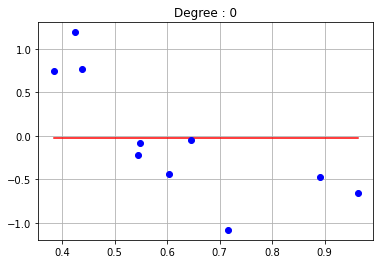

MSE = 0.4593295552676625
Weight Matrix : [-0.02913073  0.        ]


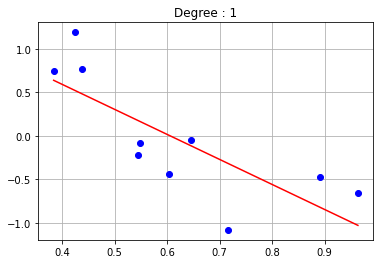

MSE = 0.17929529084928741
Weight Matrix : [ 1.7372496   0.         -2.86858892]


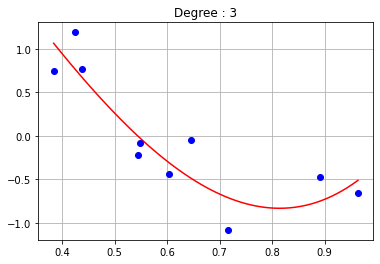

MSE = 0.07811345688853874
Weight Matrix : [ 4.11508262  0.         -7.40984262 -4.18180073  7.15086888]


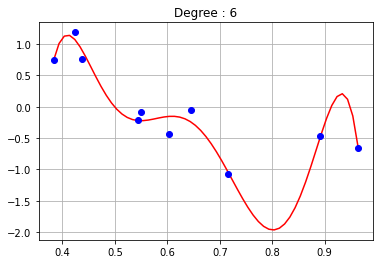

MSE = 0.017455789748047637
Weight Matrix : [  -1542.9274243        0.           15572.49954465  -64031.10168452
  137433.53103095 -162505.73061526  100410.81667214  -25342.44598443]


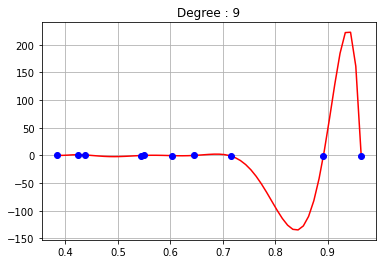

MSE = 1.6379369517615875e-13
Weight Matrix : [ 1.30296433e+06  0.00000000e+00 -2.07859615e+07  1.45707785e+08
 -5.88964915e+08  1.51257738e+09 -2.55916883e+09  2.85217547e+09
 -2.01884299e+09  8.23441907e+08 -1.47445038e+08]


In [64]:
# Loop to fit the models for the above dataset

M = [0,1,3,6,9]
poly_X = []
predictors = []
mse_train = []
for i in M:
    
    # Defining a function to extract the polynomial feature from the data
    
    poly= sklearn.preprocessing.PolynomialFeatures(degree = i)
    x_train = poly.fit_transform(x.reshape(-1,1))
    poly.fit(x_train,y_noise)
    poly_X.append(poly)
    
    # Training the classifier from sklearn
    
    lin = sklearn.linear_model.LinearRegression()
    lin.fit(x_train,y_noise)
    plt.grid()
    
    predictors.append(lin)    
    plt.title("Degree : "+str(i))
    
    # Plotting the prediction along with the datapoints
    
    x_full = np.arange(min(x),max(x),0.01)
    x_full_new = poly.fit_transform(x_full.reshape(-1,1))
    plt.plot(x_full,lin.predict(x_full_new),color="red")
    plt.plot(x,y_noise,'bo')
    plt.show()
    error = np.sum(np.square(y_noise-lin.predict(x_train)))*1/len(y_noise)
    print("MSE = "+str(error))
    mse_train.append(error)
    print("Weight Matrix : "+str(np.concatenate([np.array([lin.intercept_]) , lin.coef_])))

- ###### We see a classic example of overfitting and underfitting in the above case. For the order 0, we see that the model struggles to fit the datapoints properly and has the most MSE error, whereas at the other end we see that the order 9 polynomial is overfitting the datapoints immensely, which leads to a very low training MSE.

- ###### We see as the order of the matrix increases, the weight values increase sharply. This is the side effects of  overfitting error in higher order polynomials.

In [65]:
# Generating dataset

x_new = np.random.uniform(size=100)
x_new = np.sort(x_new)
y_new = np.sin(2*np.pi*x_new)
noise_new = np.random.normal(0,0.75,100)
y_noise_new = y_new+noise_new

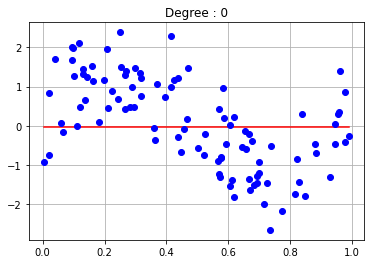

MSE = 1.340291949179833


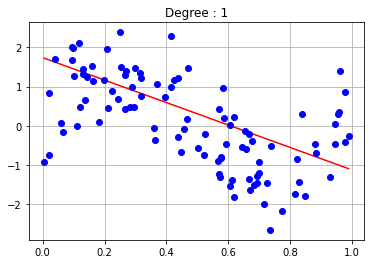

MSE = 0.9794214227154172


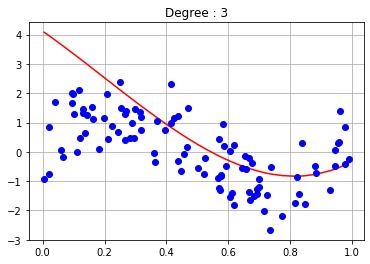

MSE = 2.1071626621077133


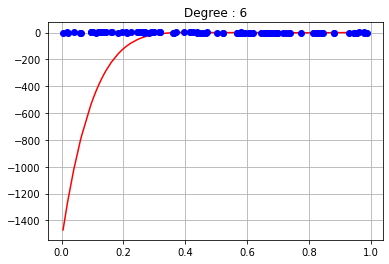

MSE = 98509.85419089161


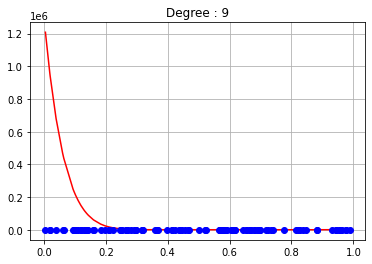

MSE = 44881756929.380035


In [66]:
mse_val = []

# Loop to predict validation set using the model

for i,lin in enumerate(predictors):
    plt.title("Degree : "+str(M[i]))
    plt.grid()
    x_train = poly_X[i].fit_transform(x_new.reshape(-1,1))
    plt.plot(x_new,lin.predict(x_train),color="red")
    plt.plot(x_new,y_noise_new,'bo')
    plt.show()
    error = np.sum(np.square(y_noise_new-lin.predict(x_train)))*1/len(y_noise_new)
    mse_val.append(error)
    print("MSE = "+str(error))

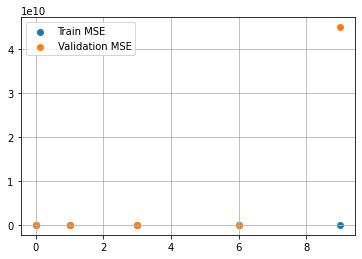

In [67]:
# Plotting the train and validation MSE

plt.scatter(M,mse_train,label = "Train MSE")
plt.scatter(M,mse_val,label = "Validation MSE")
plt.grid(b=True)
plt.legend()
plt.show()

###### We see that due to overfitting, the validation MSE becomes very high in higher order polynomials.

### Regularization

We've seen the effects of increasing model complexity on the training error and the validation error above. We will now use L2 regularization to reduce overfitting.

- Fit a polynomial regression model of order $M=9$ to the same training dataset as before but now using the regularized error function given by $E^{'}(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2 + \frac{\lambda}{2}{\|\textbf{w}\|}^2$ where $\lambda$ is the regularization hyperparameter. Use the following values for $\lambda$: $\lambda={0.01, 0.1, 1}$.
- Report the coefficients of the model fit above for $\lambda={0.01, 0.1, 1}$. Explain the trend in the coefficient values with increasing $\lambda$.
- Find the optimal value of the hyperparameter $\lambda$. 
- Compare the validation error results of the following two models : polynomial regression model of order $M=9$ without regularization and polynomial regression model of order $M=9$ with regularization hyperparameter as estimated above.

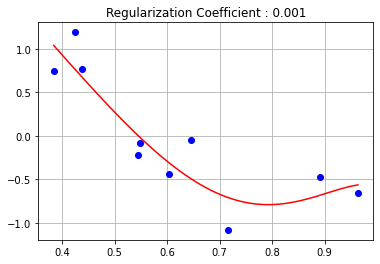

MSE = 0.07328108706474327
[ 3.34489527  0.         -4.82240111 -3.46759581 -0.42535101  1.96096283
  2.95958473  2.61855804  1.25487034 -0.78267561 -3.19954832]


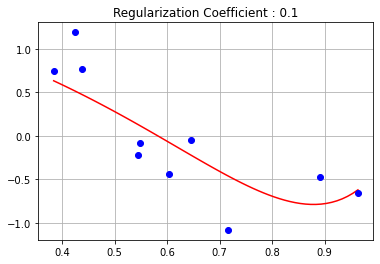

MSE = 0.1351291323963319
[ 1.42921754  0.         -1.46322384 -1.29497724 -0.75887415 -0.26213182
  0.09882373  0.32916286  0.45934167  0.51984647  0.53464052]


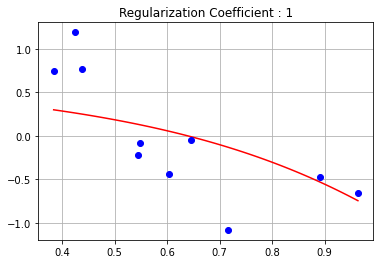

MSE = 0.26333346072360386
[ 0.52101186  0.         -0.37458385 -0.38373579 -0.29347499 -0.19504627
 -0.11451155 -0.05526046 -0.01395264  0.01387296  0.03208189]


In [90]:
# Loop to fit the model with regularization to the dataset

R = [0.001,0.1,1]

# Defining a function to extract the polynomial feature from the data
    
poly= sklearn.preprocessing.PolynomialFeatures(degree = 9)
x_train = poly.fit_transform(x.reshape(-1,1))
predictors_reg = []
for i in R:
    
    # Training the classifier from sklearn
    
    lin = sklearn.linear_model.Ridge(alpha=i)
    lin.fit(x_train,y_noise)
    predictors_reg.append(lin)    
    
    # Plotting the prediction along with the datapoints
    
    plt.grid()
    plt.title("Regularization Coefficient : "+str(i))
    x_full = np.arange(min(x),max(x),0.01)
    x_full_new = poly.fit_transform(x_full.reshape(-1,1))
    plt.plot(x_full,lin.predict(x_full_new),color="red")
    plt.plot(x,y_noise,'bo')
    plt.show()
    error = np.sum(np.square(y_noise-lin.predict(x_train)))*1/len(y_noise)
    print("MSE = "+str(error))
    print(np.concatenate([np.array([lin.intercept_]) , lin.coef_]))

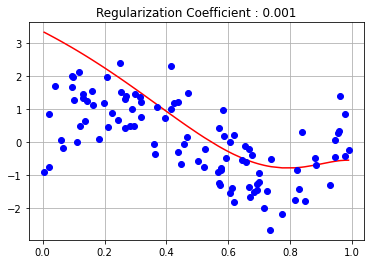

MSE = 1.5773445291081516


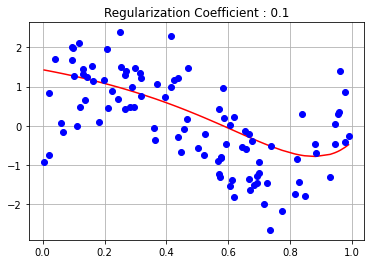

MSE = 0.8106231334863342


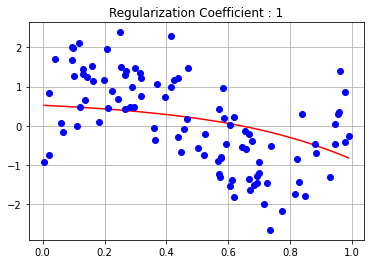

MSE = 1.0535720080178956


In [92]:

# Loop to predict validation set using the model

x_train_new = poly.fit_transform(x_new.reshape(-1,1))
mse_new = []
for i,lin in enumerate(predictors_reg):
    plt.grid()
    plt.title("Regularization Coefficient : "+str(R[i]))
    plt.plot(x_new,lin.predict(x_train_new),color="red")
    plt.plot(x_new,y_noise_new,'bo')
    plt.show()
    error = np.sum(np.square(y_noise_new-lin.predict(x_train_new)))*1/len(y_noise_new)
    print("MSE = "+str(error))
    mse_new.append(error)

In [82]:
# Loop to find optimal value of lambda

l_values = np.arange(0,5,0.01)

train_mse = []
val_mse = []

all_preds = []

for l in l_values:
    lin = sklearn.linear_model.Ridge(alpha=l)
    lin.fit(x_train,y_noise)
    all_preds.append(lin)    
    
    print("Lambda : "+str(round(l,1)))
    
    # Finding Training Error
    
    error = np.sum(np.square(y_noise-lin.predict(x_train)))*1/len(y_noise)
    
    print("Train MSE = "+str(error))
    
    train_mse.append(train_mse)
    
    print(np.concatenate([np.array([lin.intercept_]) , lin.coef_]))
    
    x_train_new = poly.fit_transform(x_new.reshape(-1,1))
    
    # Finding Validation Error
    
    y_pred = lin.predict(x_train_new)
    
    error = np.sum(np.square(y_noise_new-y_pred))*1/len(y_noise_new)
    
    print("Validation MSE = "+str(error))
    
    val_mse.append(error)

Lambda : 0.0
Train MSE = 9.7777086421301e-15
[ 1.30296433e+06  0.00000000e+00 -2.07859615e+07  1.45707785e+08
 -5.88964915e+08  1.51257738e+09 -2.55916883e+09  2.85217547e+09
 -2.01884299e+09  8.23441907e+08 -1.47445038e+08]
Validation MSE = 44881756929.3695
Lambda : 0.0
Train MSE = 0.08923060787876093
[ 2.47076225  0.         -3.18973302 -2.25563704 -0.7016861   0.42864034
  0.97728765  1.0538345   0.81240458  0.3832348  -0.1397878 ]
Validation MSE = 1.039411121402095
Lambda : 0.0
Train MSE = 0.09695167761307112
[ 2.15773101  0.         -2.58036116 -1.98698004 -0.84278899  0.059512
  0.58020807  0.77946104  0.75502653  0.59195526  0.35251383]
Validation MSE = 0.917975706552511
Lambda : 0.0
Train MSE = 0.1024942151200352
[ 1.98204126  0.         -2.27287104 -1.82997301 -0.87458731 -0.08367037
  0.41161132  0.64993846  0.70484789  0.64221359  0.5110366 ]
Validation MSE = 0.8677767075462244
Lambda : 0.0
Train MSE = 0.10750045792082004
[ 1.85617543  0.         -2.06992751 -1.71314667 -0.8

Lambda : 0.9
Train MSE = 0.2599365341404036
[ 0.53923631  0.         -0.39340832 -0.40070842 -0.30364311 -0.19863169
 -0.11305211 -0.05031998 -0.00677598  0.02238477  0.0413074 ]
Validation MSE = 1.045578668845654
Lambda : 0.9
Train MSE = 0.260442366730513
[ 0.53651219  0.         -0.39057665 -0.39816016 -0.30212287 -0.19810453
 -0.11328518 -0.05107695 -0.00786888  0.02109189  0.03990825]
Validation MSE = 1.0467710835644097
Lambda : 1.0
Train MSE = 0.2609410515208769
[ 0.53383007  0.         -0.38779465 -0.39565496 -0.30062617 -0.19758252
 -0.11350963 -0.05181604 -0.00893817  0.01982583  0.03853741]
Validation MSE = 1.047945995181941
Lambda : 1.0
Train MSE = 0.2614327716775971
[ 0.53118882  0.         -0.38506095 -0.39319166 -0.2991524  -0.19706558
 -0.11372573 -0.05253776 -0.0099845   0.01858586  0.03719411]
Validation MSE = 1.0491038159773611
Lambda : 1.0
Train MSE = 0.26191770426162403
[ 0.5285874   0.         -0.38237425 -0.39076915 -0.29770095 -0.19655358
 -0.11393374 -0.05324259 

Lambda : 2.0
Train MSE = 0.2930300584565102
[ 0.37135679  0.         -0.23366186 -0.2532124  -0.21059828 -0.15920155
 -0.11520328 -0.08154589 -0.05702474 -0.03955768 -0.02723597]
Validation MSE = 1.1195770537559422
Lambda : 2.0
Train MSE = 0.2932317538018443
[ 0.37042564  0.         -0.23287851 -0.25246192 -0.21008849 -0.1589361
 -0.11513086 -0.08161106 -0.05718224 -0.03977415 -0.02748796]
Validation MSE = 1.119986130435983
Lambda : 2.0
Train MSE = 0.2934324593599991
[ 0.36950057  0.         -0.23210157 -0.25171722 -0.20958213 -0.1586718
 -0.11505784 -0.08167443 -0.05733715 -0.03998755 -0.02773663]
Validation MSE = 1.120392523840702
Lambda : 2.0
Train MSE = 0.29363218767375826
[ 0.36858151  0.         -0.23133096 -0.25097821 -0.20907914 -0.15840864
 -0.11498425 -0.08173602 -0.05748952 -0.04019793 -0.02798203]
Validation MSE = 1.1207962677262788
Lambda : 2.0
Train MSE = 0.2938309510543503
[ 0.36766838  0.         -0.23056661 -0.25024482 -0.2085795  -0.15814661
 -0.11491008 -0.08179587 -

Lambda : 3.4
Train MSE = 0.31531706804742915
[ 0.27856097  0.         -0.16225138 -0.18287901 -0.16031069 -0.12980886
 -0.10255352 -0.08099357 -0.0647289  -0.05266369 -0.04372491]
Validation MSE = 1.1606151748970335
Lambda : 3.4
Train MSE = 0.31544413010967765
[ 0.27809217  0.         -0.16192477 -0.18254664 -0.16005942 -0.1296454
 -0.10246178 -0.08095457 -0.06472667 -0.05268622 -0.04376362]
Validation MSE = 1.1608263087560327
Lambda : 3.4
Train MSE = 0.3155709055284278
[ 0.27762508  0.         -0.16159969 -0.18221571 -0.15980909 -0.12948239
 -0.10237011 -0.08091537 -0.06472404 -0.05270823 -0.04380175]
Validation MSE = 1.1610367361381984
Lambda : 3.5
Train MSE = 0.3156973959399371
[ 0.27715971  0.         -0.16127613 -0.18188621 -0.1595597  -0.12931984
 -0.10227851 -0.08087596 -0.06472103 -0.05272974 -0.0438393 ]
Validation MSE = 1.161246461922018
Lambda : 3.5
Train MSE = 0.31582360296281553
[ 0.27669604  0.         -0.16095408 -0.18155814 -0.15931126 -0.12915773
 -0.10218697 -0.080836

Validation MSE = 1.1835959750130634
Lambda : 4.8
Train MSE = 0.3300686214925571
[ 0.22833913  0.         -0.12909853 -0.14851128 -0.13354851 -0.11149897
 -0.09123198 -0.07486635 -0.06226771 -0.05271203 -0.04545237]
Validation MSE = 1.1837430234015016
Lambda : 4.8
Train MSE = 0.33016751561272945
[ 0.22802913  0.         -0.12890493 -0.1483066  -0.13338428 -0.11138116
 -0.09115312 -0.0748168  -0.06223914 -0.05269809 -0.04544845]
Validation MSE = 1.1838897325346516
Lambda : 4.8
Train MSE = 0.3302662473028812
[ 0.22771997  0.         -0.12871198 -0.14810256 -0.1332205  -0.11126361
 -0.09107437 -0.07476726 -0.0622105  -0.05268402 -0.04544438]
Validation MSE = 1.1840361039460603
Lambda : 4.8
Train MSE = 0.33036481709308785
[ 0.22741164  0.         -0.12851968 -0.14789915 -0.13305717 -0.11114633
 -0.09099573 -0.0747177  -0.06218178 -0.05266982 -0.04544014]
Validation MSE = 1.1841821391580893
Lambda : 4.8
Train MSE = 0.33046322550996454
[ 0.22710415  0.         -0.12832802 -0.14769638 -0.13289

In [83]:
print("Minimum MSE is in case of : "+str(l_values[val_mse.index(min(val_mse))]))

Minimum MSE is in case of : 0.08


In [86]:
print('MSE of 9th order polynomial without regularization = '+str(mse_val[len(mse_val)-1]))
print('MSE of 9th order polynomial with regularization = '+str((min(val_mse))))

MSE of 9th order polynomial without regularization = 44881756929.380035
MSE of 9th order polynomial with regularization = 0.809119873523105


###### We see that regularization has helped reduce the effect of overfitting in the higher order polynomials, and also has helped reduce the weight values, which in turn help to fit the datapoints better, thus in turn decreasing the validation error.

###### Thus regularization help better fit models by removing the overfitting via adding weight to loss function and also prevent underfitting by allowing us to use higher order polynomials.

### Bias-variance trade-off:

In class you have seen that the expected prediction error for any model can be decomposed as the sum of $bias^2, variance$ and $irreducible\,noise$. We will now observe the bias-variance trade-off for a polynomial regression model of order $M=9$ with varying regularization hyperparameter.
- Generate $50$ datasets, each containing $10$ points, independently, from the curve $f(x)=sin(2\pi x)$. Add gaussian noise $N(0,0.5)$ to each data point.
- Fit a polynomial regression model of order $M=9$ to each training dataset by minimizing the regularized error function $E^{'}(\textbf{w})$ with $\lambda=1$.
- Plot the following:
  - function obtained by training the model on each of the 50 datasets in the same figure.
  - The corresponding average of the 50 fits and the sinusoidal function from which the datasets were generated in the same figure.
- Repeat this exercise for two more $\lambda$ values: $\lambda$ = 0.1, 10.
- Based on the plots obtained, explain the trend in the bias and variance values with increasing model complexity.
- Bonus (optional and will not be graded) : 
  - Plot the $bias^2$, $variance$  and $bias^2 + variance$ against $\lambda$.
  - Also plot the average test error on a test data size of 1000 points (generated in a similiar way as the 50 training datasets, but independently) against $\lambda$ on the same figure.
  - For your reference: 
$$
Bias^2= (E_{D}[\hat f(x)] - f(x))^2
\\
Variance = E_{D}[(\hat f(x) - E_{D}[\hat f(x)])^2]
$$
Here $\hat f$ is the trained model and $D$ is the set of all datasets. Use the $50$ training datasets to compute the empirical estimations.

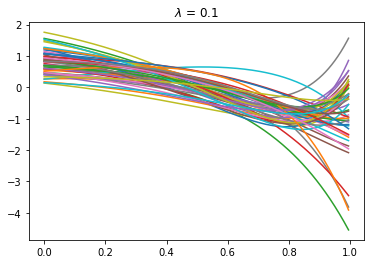

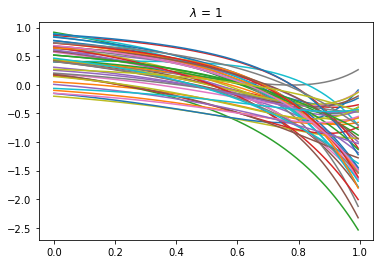

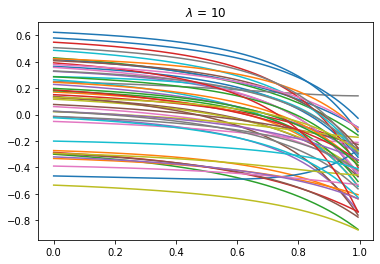

In [47]:
# Generating dataset for the question

lambda_values = [0.1,1,10]
np.random.seed(0)
x = np.random.uniform(size = (10,50))
x = np.sort(x,axis=0)
y = np.sin(np.pi*2*x)
noise = np.random.normal(0,0.5,(10,50))
y_noise  = y+noise
x_train = []

for i in range(50):
    x_train.append(poly.fit_transform(x[:,i].reshape(-1,1)))
    
model_list = {0.1:[],1:[],10:[]}

for i in lambda_values:
    for j in range(50):
        model = sklearn.linear_model.Ridge(alpha=i)
        model.fit(x_train[j],y_noise[:,j])
        model_list[i].append(model)

x = np.arange(0,1,0.005)
y_vals = {0.1:[],1:[],10:[]}
for i in lambda_values:
    for j in range(50):
        y = model_list[i][j].predict(poly.transform(x.reshape(-1,1)))
        y_vals[i].append(y)
        plt.plot(x,y)
        plt.grid()
        plt.title(r"$\lambda$ = "+str(i))
    plt.show()

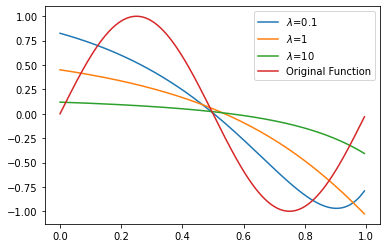

In [50]:
for i in lambda_values:
    y_avg = np.mean(np.array(y_vals[i]),axis=0)
    plt.plot(x,y_avg,label=r"$\lambda$="+str(i))
plt.plot(x,np.sin(2*np.pi*x),label="Original Function")
plt.legend()
plt.show()

###### We see that as regularization increases, the model complexity decreases. This decrease in model complexity helps reduce the variance in the model, but along with that it also increases the bias in the model. Thus a model with a decent level of bias and variance error is important for a good prediction model

# Problem 3: Logistic Regression

## Binary Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic **sigmoid function** $h_ \theta (\cdot)$ to return a probability value which can then be mapped to two or more discrete classes. $$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta^Tx} }  $$ 

<br>here, the vector $\theta$ represents the weights and the vector $x$ represents the given inputs.


## Problem 3, Part A: Dataset A



Use Dataset A (``data_prob3_parta.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [118]:
# Loading dataset

data_a = pd.read_csv("./data_prob3_parta.csv")
display(data_a.head())

Input feature 1  Input feature 2  Output label
0            25.30             20.6           1.0
1             8.41             53.0           0.0
2            15.80             61.3           0.0
3            32.00             31.7           1.0
4            17.60             80.0           0.0

In [119]:
# Splitting dataset into train and test

X_data = (np.array([data_a["Input feature 1"],data_a["Input feature 2"]])).T
y_data = np.array([data_a["Output label"]]).T

train_X_data_a,test_X_data_a,train_y_data_a,test_y_data_a = sklearn.model_selection.train_test_split(X_data,y_data,train_size = 0.75,random_state=42)

print("Train X shape:"+str(train_X_data_a.shape))
print("Train Y shape:"+str(train_y_data_a.shape))
print("Test X shape:"+str(test_X_data_a.shape))
print("Test Y shape:"+str(test_y_data_a.shape))

Train X shape:(1125, 2)
Train Y shape:(1125, 1)
Test X shape:(375, 2)
Test Y shape:(375, 1)


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

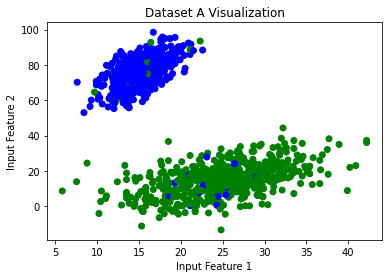

In [120]:
plt.scatter(train_X_data_a.T[0],train_X_data_a.T[1],color=['blue' if l==0 else 'green' for l in train_y_data_a])
plt.title("Dataset A Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.show()

Build the logistic regression model using the training data. 

The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

In [121]:
# Class for running logistic regression

class LogisticRegression:  
    
    # Initializing params
    
    def __init__(self, lr=0.01, num_iter=50000, add_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.add_intercept = add_intercept
        self.verbose = verbose
    
    # Add intercept to the X
    
    def make_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # Function to calculate sigmoid
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Function to calculate loss
    
    def loss(self, h, y):
        t = -y * np.log(h) - (1 - y) * np.log(1 - h)
        return np.nanmean(t)
    
    # Function to train the model
    
    def fit(self, X, y):
        if self.add_intercept:
            X = self.make_intercept(X)
        
        # weights initialization
        
        self.W = np.zeros((X.shape[1],y.shape[1]))
        
        # Train loop
        
        for i in range(self.num_iter):
            
            # Calculate gradient
            
            z = np.dot(X, self.W)
            h = self.sigmoid(z)
            k = np.subtract(h,y)
            gradient = np.dot(X.T, k) / len(y)
            self.W = np.subtract(self.W,self.lr * gradient)
            
            # Print loss every 100 train steps
            
            if(self.verbose == True and i%100==0):
                z = np.dot(X, self.W)
                h = self.sigmoid(z)
                print('loss:'+str(self.loss(h, y)))
    
    # Functions to get prediction
    
    def predict_probabaility(self, X):
        if self.add_intercept:
            X = self.make_intercept(X)
    
        return self.sigmoid(np.dot(X, self.W))
    
    def predict(self, X, threshold):
        return (self.predict_probabaility(X) >= threshold)


In [122]:
# Function to scale X value

def scale_X(X_train):
    return sklearn.preprocessing.scale(X_train)

In [123]:
# Training the model

train_X_data_a_scale = scale_X(train_X_data_a)
l_reg = LogisticRegression(lr=0.005,verbose= True)
l_reg.fit(train_X_data_a_scale,train_y_data_a)

loss:0.6915151691250002
loss:0.5573521339857324
loss:0.4663540311023979
loss:0.40279873382293263
loss:0.35692707693462267
loss:0.32277935940008123
loss:0.2966563016853374
loss:0.27619672803434847
loss:0.25984686594673
loss:0.24655364415953288
loss:0.23558366545256235
loss:0.22641346115504693
loss:0.2186610852586413
loss:0.21204231536118318
loss:0.2063418943242515
loss:0.20139420396860008
loss:0.1970699979063046
loss:0.19326711492213441
loss:0.1899038620294854
loss:0.18691422246353684
loss:0.18424433323719122
loss:0.1818498602818471
loss:0.1796940177066728
loss:0.1777460556889679
loss:0.17598009368752923
loss:0.17437421113772944
loss:0.17290973224857645
loss:0.17157065862451654
loss:0.17034321554515044
loss:0.1692154864141359
loss:0.16817711617682718
loss:0.16721906911069107
loss:0.16633342979738422
loss:0.16551323862654438
loss:0.1647523550945085
loss:0.16404534361343728
loss:0.16338737765733388
loss:0.16277415892765762
loss:0.16220184888571762
loss:0.16166701051812712
loss:0.161166558

loss:0.15122251829124692
loss:0.15122226338183134
loss:0.15122201195113247
loss:0.15122176395099887
loss:0.15122151933396663
loss:0.15122127805324892
loss:0.15122104006272563
loss:0.15122080531693335
loss:0.15122057377105536
loss:0.15122034538091156
loss:0.15122012010294955
loss:0.15121989789423426
loss:0.15121967871243944
loss:0.15121946251583812
loss:0.15121924926329372
loss:0.15121903891425115
loss:0.15121883142872822
loss:0.1512186267673071
loss:0.15121842489112572
loss:0.15121822576186994
loss:0.15121802934176487
loss:0.15121783559356722
loss:0.1512176444805575
loss:0.15121745596653208
loss:0.1512172700157956
loss:0.1512170865931536
loss:0.1512169056639052
loss:0.15121672719383558
loss:0.15121655114920932
loss:0.15121637749676273
loss:0.15121620620369772
loss:0.1512160372376742
loss:0.15121587056680427
loss:0.15121570615964483
loss:0.15121554398519166
loss:0.15121538401287282
loss:0.15121522621254238
loss:0.15121507055447436
loss:0.15121491700935652
loss:0.15121476554828453
loss:0

Print the final weights.

In [124]:
print(l_reg.W)

[[ 0.07341778]
 [ 1.04788112]
 [-2.80825147]]


Print the final accuracy on test data.

In [125]:
def accuracy(y_true,y_pred):
    j = np.sum(np.abs(y_true.T-y_pred))
    
    n = len(y_true)
    return 100-j*100/n

In [126]:
# Printing accuracy

test_X_data_a_scale = scale_X(test_X_data_a)
y_pred = l_reg.predict(test_X_data_a_scale,threshold=0.5)
y_prediction = [1 if p else 0 for p in y_pred]
acc = accuracy(test_y_data_a,y_prediction)
print("Accuracy Percentage on Test Data: "+str(acc))

Accuracy Percentage on Test Data: 96.8


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

In [127]:
# Creating mesh for plotting decision boundary
h = .2
x_min, x_max = test_X_data_a[:, 0].min() - 1, test_X_data_a[:, 0].max() + 1
y_min, y_max = test_X_data_a[:, 1].min() - 1, test_X_data_a[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = l_reg.predict(scale_X(np.c_[xx.ravel(), yy.ravel()]),threshold=0.5)

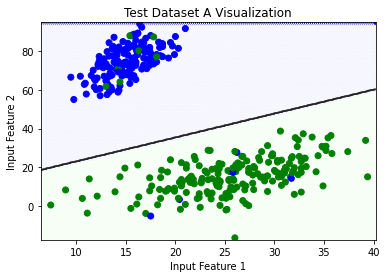

In [130]:
# Plotting test data with decision boundary

plt.title("Test Dataset A Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.binary)
plt.scatter(xx,yy,c=Z,cmap="brg", edgecolor='w')
plt.scatter(test_X_data_a.T[0],test_X_data_a.T[1],color=['blue' if l==0 else 'green' for l in test_y_data_a])

plt.show()

## Problem 3, Part B: Dataset B



Use Dataset B (``data_prob3_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [131]:
# Loading dataset

data_b = pd.read_csv("./data_prob3_partb.csv")
display(data_b.head())

Input feature 1  Input feature 2  Output label
0          0.95800           -0.575           1.0
1          0.00799            0.140           1.0
2          1.38000           -0.551           1.0
3         -0.36300            0.960           0.0
4          0.46000            0.701           0.0

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

In [132]:
# Splitting dataset into train and test

X_data = (np.array([data_b["Input feature 1"],data_b["Input feature 2"]])).T
y_data = np.array([data_b["Output label"]]).T

train_X_data_b,test_X_data_b,train_y_data_b,test_y_data_b = sklearn.model_selection.train_test_split(X_data,y_data,train_size = 0.75,random_state=42)

print("Train X shape:"+str(train_X_data_b.shape))
print("Train Y shape:"+str(train_y_data_b.shape))
print("Test X shape:"+str(test_X_data_b.shape))
print("Test Y shape:"+str(test_y_data_b.shape))

Train X shape:(1125, 2)
Train Y shape:(1125, 1)
Test X shape:(375, 2)
Test Y shape:(375, 1)


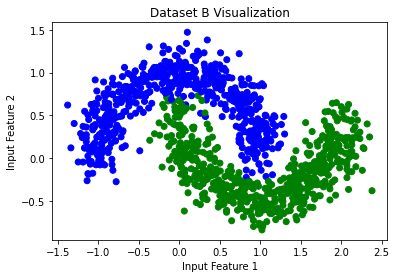

In [133]:
plt.scatter(train_X_data_b.T[0],train_X_data_b.T[1],color=['blue' if l==0 else 'green' for l in train_y_data_b])
plt.title("Dataset B Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.show()

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [134]:
# Training the model

train_X_data_b_scale = scale_X(train_X_data_b)
l_reg = LogisticRegression(lr=0.005,verbose= True,num_iter=50000)
l_reg.fit(train_X_data_b_scale,train_y_data_b)

loss:0.692072086128955
loss:0.6015180239447473
loss:0.5371687715819341
loss:0.49052166920038326
loss:0.45588412631641817
loss:0.429537285935758
loss:0.4090440912607809
loss:0.39278184328882454
loss:0.3796471131174098
loss:0.3688726340612922
loss:0.35991312418741445
loss:0.35237303250179863
loss:0.34595994344631353
loss:0.34045391500457667
loss:0.3356868921358026
loss:0.3315286151969488
loss:0.3278767967437222
loss:0.3246501561812685
loss:0.32178340204924466
loss:0.3192235639387212
loss:0.3169272743585449
loss:0.3148587290420634
loss:0.31298813841040346
loss:0.3112905391364613
loss:0.30974487285677627
loss:0.3083332652661047
loss:0.307040457068789
loss:0.30585335112436135
loss:0.3047606493042336
loss:0.3037525591998847
loss:0.30282055565247334
loss:0.30195718563005935
loss:0.30115590762172895
loss:0.30041095869968687
loss:0.29971724389864074
loss:0.2990702437034776
loss:0.2984659363126649
loss:0.29790073202240525
loss:0.29737141760395785
loss:0.29687510895963587
loss:0.2964092106685421


loss:0.2874553553752781
loss:0.28745534775443593
loss:0.28745534038088805
loss:0.2874553332465975
loss:0.2874553263437894
loss:0.287455319664942
loss:0.2874553132027784
loss:0.28745530695025884
loss:0.28745530090057253
loss:0.2874552950471305
loss:0.2874552893835583
loss:0.28745528390368885
loss:0.2874552786015559
loss:0.2874552734713872
loss:0.2874552685075984
loss:0.28745526370478686
loss:0.28745525905772573
loss:0.287455254561358
loss:0.2874552502107913
loss:0.2874552460012924
loss:0.2874552419282818
loss:0.2874552379873292
loss:0.287455234174148
loss:0.28745523048459126
loss:0.2874552269146468
loss:0.28745522346043284
loss:0.2874552201181936
loss:0.28745521688429554
loss:0.28745521375522315
loss:0.2874552107275754
loss:0.2874552077980614
loss:0.28745520496349736
loss:0.28745520222080295
loss:0.28745519956699783
loss:0.28745519699919864
loss:0.28745519451461554
loss:0.2874551921105492
loss:0.28745518978438817
loss:0.28745518753360577
loss:0.28745518535575737
loss:0.2874551832484775


Print the final weights.

In [135]:
print(l_reg.W)

[[-0.02411407]
 [ 1.11136358]
 [-2.4697579 ]]


Print the final accuracy on test data.

In [136]:
# Printing accuracy

test_X_data_b_scale = scale_X(test_X_data_b)
y_pred = l_reg.predict(test_X_data_b_scale,threshold=0.5)
y_prediction = [1 if p else 0 for p in y_pred]
acc = accuracy(test_y_data_b,y_prediction)
print("Accuracy Percentage on Test Data: "+str(acc))

Accuracy Percentage on Test Data: 88.8


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

In [137]:
# Creating mesh for plotting decision boundary

h = .03
x_min, x_max = test_X_data_b[:, 0].min() - 1, test_X_data_b[:, 0].max() + 1
y_min, y_max = test_X_data_b[:, 1].min() - 1, test_X_data_b[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = l_reg.predict(scale_X(np.c_[xx.ravel(), yy.ravel()]),threshold=0.5)


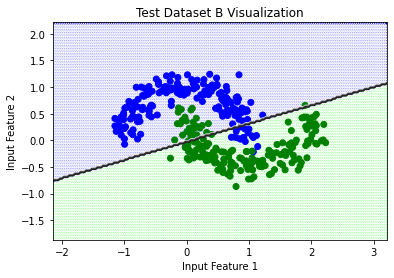

In [138]:
# Plotting test data with decision boundary

plt.title("Test Dataset B Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.binary)
plt.scatter(xx,yy,c=Z,cmap="brg",edgecolor='w')
plt.scatter(test_X_data_b.T[0],test_X_data_b.T[1],color=['blue' if l==0 else 'green' for l in test_y_data_b])

plt.show()

As you can see, a straight line is not the best decision boundary for this type of data. In the next part, we will try polynomial feature mapping to generate more features and build the classifier on top of it.

## Problem 3, Part C: Polynomial Feature Mapping



Use Dataset B (``data_prob3_partb.csv``) for this part of the question.


In [139]:
# Loading dataset

data_b = pd.read_csv("./data_prob3_partb.csv")
display(data_b.head())

Input feature 1  Input feature 2  Output label
0          0.95800           -0.575           1.0
1          0.00799            0.140           1.0
2          1.38000           -0.551           1.0
3         -0.36300            0.960           0.0
4          0.46000            0.701           0.0

Generate more features for each datapoint using the following transformation.

For a datapoint $(x_1, x_2)$,
$$ (x_1, x_2) \rightarrow (x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3, ..., x_1^T, x_2^T) $$
Now, instead of giving $(x_1, x_2)$ as the input to the classifier, use the transformed data as the input to the classifier.

Generate the transformed training and testing dataset using Dataset B (``data_prob3_partb.csv``).

Build the logistic regression model using the transformed training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [140]:
# Splitting dataset into train and test

X_data = (np.array([data_b["Input feature 1"],data_b["Input feature 2"]])).T
y_data = np.array([data_b["Output label"]]).T

train_X_data_b,test_X_data_b,train_y_data_b,test_y_data_b = sklearn.model_selection.train_test_split(X_data,y_data,train_size = 0.75,random_state=42)

print("Train X shape:"+str(train_X_data_b.shape))
print("Train Y shape:"+str(train_y_data_b.shape))
print("Test X shape:"+str(test_X_data_b.shape))
print("Test Y shape:"+str(test_y_data_b.shape))

Train X shape:(1125, 2)
Train Y shape:(1125, 1)
Test X shape:(375, 2)
Test Y shape:(375, 1)


Try different values of $T$ (highest number of degree) between 3 to 10. Find out which value of $T$ gives the best test accuracy. Please print that values of $T$ in the below cell.

In [141]:
# Function to add polynomial features

def addFeatures(data,t):
    return(np.hstack(data**(i+1) for i in range(t)))

In [142]:
# Training the model

lin_regs = []
for t in range(3,11):
    print("Order:"+str(t))
    train_X_data_b_new = addFeatures(train_X_data_b,t)
    train_X_data_b_scale = scale_X(train_X_data_b_new)
    l_reg = LogisticRegression(lr=0.005,verbose= True)
    l_reg.fit(train_X_data_b_scale,train_y_data_b)
    lin_regs.append(l_reg)

Order:3
loss:0.6908045772086617
loss:0.5339008931699972
loss:0.45955046111321785
loss:0.417783171880101
loss:0.3912490872977594
loss:0.37291326327099394
loss:0.35946137890292074
loss:0.3491429782813048
loss:0.34095050486957135
loss:0.3342643771296506
loss:0.3286832442680551
loss:0.32393600607322354
loss:0.3198331460040768
loss:0.31623833075692326
loss:0.3130510792488099
loss:0.3101957789267905
loss:0.307614495621225
loss:0.30526213298135957
loss:0.3031030930036279
loss:0.3011089220234373
loss:0.29925661940767173
loss:0.2975274015375703
loss:0.29590578463765316
loss:0.2943788947820925
loss:0.2929359423106403
loss:0.29156781692801287
loss:0.2902667725434871
loss:0.28902617963638394
loss:0.287840328987745
loss:0.2867042748790436
loss:0.28561370889691623
loss:0.28456485767618
loss:0.28355439951495603
loss:0.28257939597768844
loss:0.28163723548287595
loss:0.2807255865351791
loss:0.2798423587646278
loss:0.2789856703206038
loss:0.27815382046512016
loss:0.27734526644051555
loss:0.2765586038670

loss:0.19196905738576486
loss:0.1918092469715897
loss:0.19164983160851098
loss:0.191490809759978
loss:0.19133217989754298
loss:0.19117394050080525
loss:0.1910160900573567
loss:0.19085862706272752
loss:0.190701550020332
loss:0.19054485744141578
loss:0.19038854784500242
loss:0.1902326197578418
loss:0.19007707171435778
loss:0.1899219022565971
loss:0.1897671099341787
loss:0.189612693304243
loss:0.1894586509314023
loss:0.18930498138769106
loss:0.18915168325251697
loss:0.18899875511261247
loss:0.18884619556198656
loss:0.18869400320187688
loss:0.18854217664070255
loss:0.18839071449401748
loss:0.18823961538446352
loss:0.18808887794172446
loss:0.18793850080248056
loss:0.18778848261036304
loss:0.18763882201590923
loss:0.18748951767651803
loss:0.18734056825640574
loss:0.18719197242656227
loss:0.1870437288647078
loss:0.18689583625524941
loss:0.1867482932892389
loss:0.18660109866432995
loss:0.18645425108473632
loss:0.18630774926119012
loss:0.18616159191090048
loss:0.1860157777575127
loss:0.18587030

loss:0.20995539184680506
loss:0.20966642603542743
loss:0.2093785943442571
loss:0.20909188893342484
loss:0.20880630206963094
loss:0.20852182612332318
loss:0.20823845356597878
loss:0.20795617696748686
loss:0.20767498899362655
loss:0.2073948824036373
loss:0.20711585004787678
loss:0.20683788486556437
loss:0.2065609798826045
loss:0.2062851282094887
loss:0.20601032303927164
loss:0.20573655764561902
loss:0.20546382538092378
loss:0.20519211967448867
loss:0.20492143403077134
loss:0.20465176202769075
loss:0.2043830973149912
loss:0.2041154336126626
loss:0.2038487647094143
loss:0.20358308446120035
loss:0.2033183867897942
loss:0.20305466568141098
loss:0.20279191518537548
loss:0.2025301294128336
loss:0.20226930253550623
loss:0.20200942878448358
loss:0.20175050244905793
loss:0.2014925178755943
loss:0.2012354694664366
loss:0.20097935167884856
loss:0.2007241590239874
loss:0.2004698860659101
loss:0.2002165274206095
loss:0.19996407775508052
loss:0.19971253178641443
loss:0.1994618842809204
loss:0.19921213

loss:0.3167130881499451
loss:0.3125955375974358
loss:0.3089298619178141
loss:0.3056298336652562
loss:0.3026301570481631
loss:0.2998804927111804
loss:0.2973414196814285
loss:0.29498163775948144
loss:0.2927759867223398
loss:0.2907040167216539
loss:0.2887489387802303
loss:0.28689684250733094
loss:0.28513610495512565
loss:0.28345693834954483
loss:0.2818510401598355
loss:0.28031131956241995
loss:0.27883168160912186
loss:0.2774068554573267
loss:0.27603225658254754
loss:0.2747038754423795
loss:0.2734181869062534
loss:0.27217207611697924
loss:0.2709627774504889
loss:0.26978782398803824
loss:0.2686450054793606
loss:0.2675323332046776
loss:0.2664480104729566
loss:0.26539040774857414
loss:0.2643580415969777
loss:0.2633495567955609
loss:0.26236371107882356
loss:0.2613993620844676
loss:0.26045545614505416
loss:0.2595310186324942
loss:0.258625145613254
loss:0.25773699661323857
loss:0.2568657883248316
loss:0.25601078911603153
loss:0.2551713142242187
loss:0.25434672153575916
loss:0.25353640786813075
l

loss:0.15804912278308728
loss:0.15789404199787538
loss:0.15773944348508923
loss:0.15758532485962864
loss:0.15743168375230251
loss:0.1572785178096937
loss:0.15712582469402622
loss:0.1569736020830332
loss:0.15682184766982657
loss:0.156670559162768
loss:0.1565197342853412
loss:0.1563693707760255
loss:0.15621946638817077
loss:0.15607001888987382
loss:0.15592102606385563
loss:0.15577248570734023
loss:0.15562439563193492
loss:0.15547675366351113
loss:0.15532955764208725
loss:0.15518280542171184
loss:0.15503649487034887
loss:0.15489062386976357
loss:0.15474519031540956
loss:0.1546001921163171
loss:0.15445562719498251
loss:0.15431149348725876
loss:0.1541677889422471
loss:0.15402451152218963
loss:0.15388165920236316
loss:0.15373922997097397
loss:0.15359722182905364
loss:0.1534556327903563
loss:0.15331446088125594
loss:0.15317370414064574
loss:0.1530333606198379
loss:0.1528934283824645
loss:0.15275390550437937
loss:0.15261479007356082
loss:0.15247608019001557
loss:0.1523377739656833
loss:0.15219

loss:0.1847508633487026
loss:0.1844800052234377
loss:0.18421038900724093
loss:0.1839420052263884
loss:0.18367484451954186
loss:0.1834088976356355
loss:0.18314415543182058
loss:0.18288060887146554
loss:0.18261824902221066
loss:0.18235706705407434
loss:0.18209705423761027
loss:0.18183820194211275
loss:0.1815805016338695
loss:0.1813239448744599
loss:0.18106852331909692
loss:0.18081422871501207
loss:0.1805610528998808
loss:0.18030898780028873
loss:0.18005802543023508
loss:0.17980815788967447
loss:0.17955937736309432
loss:0.17931167611812693
loss:0.17906504650419588
loss:0.1788194809511945
loss:0.17857497196819688
loss:0.17833151214219858
loss:0.17808909413688798
loss:0.17784771069144573
loss:0.1776073546193727
loss:0.17736801880734446
loss:0.17712969621409275
loss:0.17689237986931128
loss:0.17665606287258723
loss:0.1764207383923564
loss:0.17618639966488117
loss:0.1759530399932515
loss:0.17572065274640739
loss:0.17548923135818315
loss:0.1752587693263714
loss:0.17502926021180798
loss:0.17480

loss:0.2669912394763926
loss:0.26570504016346924
loss:0.2644546159801771
loss:0.26323771946040453
loss:0.2620523280875338
loss:0.26089661456132063
loss:0.2597689216682649
loss:0.25866774095915435
loss:0.25759169458953807
loss:0.2565395197990954
loss:0.2555100556014636
loss:0.25450223133256195
loss:0.25351505676696007
loss:0.2525476135615841
loss:0.25159904782647413
loss:0.25066856365531764
loss:0.24975541747556226
loss:0.2488589131002161
loss:0.2479783973818988
loss:0.2471132563850285
loss:0.24626291200480116
loss:0.2454268189723003
loss:0.2446044621940362
loss:0.24379535438175576
loss:0.2429990339347288
loss:0.24221506304210216
loss:0.24144302597748346
loss:0.24068252756179612
loss:0.23993319177376138
loss:0.2391946604901818
loss:0.23846659234061857
loss:0.23774866166312292
loss:0.23704055754945275
loss:0.23634198296973086
loss:0.23565265396781054
loss:0.23497229891973975
loss:0.2343006578486884
loss:0.23363748179053956
loss:0.23298253220506981
loss:0.23233558042826755
loss:0.23169640

loss:0.1495098168559209
loss:0.14936954771780217
loss:0.14922971541981128
loss:0.14909031769777012
loss:0.14895135230353815
loss:0.14881281700486906
loss:0.14867470958526938
loss:0.14853702784385792
loss:0.1483997695952274
loss:0.14826293266930735
loss:0.14812651491122844
loss:0.14799051418118825
loss:0.14785492835431868
loss:0.14771975532055473
loss:0.14758499298450461
loss:0.14745063926532126
loss:0.14731669209657536
loss:0.14718314942612973
loss:0.14705000921601474
loss:0.14691726944230535
loss:0.1467849280949996
loss:0.14665298317789777
loss:0.14652143270848358
loss:0.1463902747178062
loss:0.14625950725036346
loss:0.14612912836398656
loss:0.14599913612972568
loss:0.14586952863173716
loss:0.14574030396717144
loss:0.14561146024606242
loss:0.14548299559121808
loss:0.14535490813811183
loss:0.14522719603477532
loss:0.14509985744169238
loss:0.14497289053169374
loss:0.1448462934898531
loss:0.14472006451338423
loss:0.14459420181153895
loss:0.14446870360550643
loss:0.14434356812831325
loss:

loss:0.1801229945244641
loss:0.17986251334695794
loss:0.1796032774159403
loss:0.17934527651679905
loss:0.17908850056309913
loss:0.17883293959416519
loss:0.17857858377272914
loss:0.17832542338263851
loss:0.17807344882662496
loss:0.17782265062412983
loss:0.17757301940918618
loss:0.17732454592835442
loss:0.17707722103871001
loss:0.17683103570588224
loss:0.17658598100214173
loss:0.17634204810453538
loss:0.17609922829306737
loss:0.1758575129489247
loss:0.1756168935527458
loss:0.17537736168293097
loss:0.17513890901399332
loss:0.1749015273149491
loss:0.17466520844774586
loss:0.17442994436572806
loss:0.17419572711213796
loss:0.17396254881865125
loss:0.1737304017039473
loss:0.17349927807231058
loss:0.1732691703122653
loss:0.17304007089523987
loss:0.17281197237426205
loss:0.17258486738268217
loss:0.17235874863292575
loss:0.17213360891527243
loss:0.17190944109666217
loss:0.17168623811952716
loss:0.17146399300064857
loss:0.17124269883003843
loss:0.17102234876984423
loss:0.17080293605327743
loss:0.

loss:0.2648355434243475
loss:0.2635294768831738
loss:0.2622599596118505
loss:0.2610247052853823
loss:0.25982165632618964
loss:0.25864895377857433
loss:0.2575049118236793
loss:0.2563879961351616
loss:0.25529680542820277
loss:0.25423005567499524
loss:0.2531865665557412
loss:0.2521652497909404
loss:0.2511650990624925
loss:0.25018518128109146
loss:0.24922462899799655
loss:0.24828263379243304
loss:0.2473584404930879
loss:0.2464513421145936
loss:0.24556067540844884
loss:0.2446858169432351
loss:0.24382617964184217
loss:0.2429812097141632
loss:0.24215038393274407
loss:0.24133320720647325
loss:0.24052921041381065
loss:0.23973794846249166
loss:0.23895899854725272
loss:0.23819195858105388
loss:0.23743644577861778
loss:0.23669209537397284
loss:0.23595855945613206
loss:0.2352355059091483
loss:0.2345226174445869
loss:0.23381959071601735
loss:0.23312613550645933
loss:0.2324419739808796
loss:0.23176683999683104
loss:0.23110047846719003
loss:0.23044264476969703
loss:0.22979310419865
loss:0.229151631454

loss:0.148010520084145
loss:0.1478759502765518
loss:0.14774178907106586
loss:0.14760803434974631
loss:0.1474746840099702
loss:0.14734173596429168
loss:0.14720918814030273
loss:0.14707703848049572
loss:0.1470761355965723
loss:0.14694465917962668
loss:0.14681357519152377
loss:0.14668288163123064
loss:0.1465525765119619
loss:0.1464226578610508
loss:0.14629312371982195
loss:0.1461639721434653
loss:0.14603520120091185
loss:0.14590680897470998
loss:0.14577879356090404
loss:0.14565115306891382
loss:0.14552388562141513
loss:0.14539698935422227
loss:0.14527046241617106
loss:0.14514430296900377
loss:0.1450185091872551
loss:0.14489307925813896
loss:0.14476801138143733
loss:0.14464330376938941
loss:0.14451895464658263
loss:0.14439496224984452
loss:0.14427132482813573
loss:0.1441480406424444
loss:0.14402510796568113
loss:0.14390252508257598
loss:0.14378029028957548
loss:0.14365840189474174
loss:0.14353685821765177
loss:0.14341565758929845
loss:0.14329479835199208
loss:0.14317427885926362
loss:0.143

loss:0.1772956518067191
loss:0.17705012958467628
loss:0.1768057517846108
loss:0.1765625090977165
loss:0.1763203923300127
loss:0.17607939240026968
loss:0.1758395003379856
loss:0.17560070728141366
loss:0.1753630044756376
loss:0.17512638327069452
loss:0.17489083511974302
loss:0.17465635157727558
loss:0.17442292429737385
loss:0.1741905450320056
loss:0.17395920562936157
loss:0.173728898032232
loss:0.17349961427642033
loss:0.1732713464891947
loss:0.17304408688777423
loss:0.17281782777785035
loss:0.17259256155214214
loss:0.17236828068898363
loss:0.1722981316457397
loss:0.17207560147367393
loss:0.17185403545622463
loss:0.1716334263942854
loss:0.1714137671678318
loss:0.17119505073468563
loss:0.1709772701293055
loss:0.17076041846160345
loss:0.17054448891578683
loss:0.17032947474922508
loss:0.17011536929133977
loss:0.16990216594251858
loss:0.16968985817305127
loss:0.16947843952208827
loss:0.16926790359662017
loss:0.16905824407047831
loss:0.16884945468335566
loss:0.16864152923984724
loss:0.1684344

Print the final weights.

In [143]:
for i,l in enumerate(lin_regs):
    print("Order:"+str(i+3))
    print(l.W)

Order:3
[[-0.00602721]
 [-0.27931868]
 [-2.51358413]
 [-2.76367824]
 [ 0.55217452]
 [ 4.25275693]
 [-1.09549224]]
Order:4
[[ 0.06327056]
 [-0.05262597]
 [-2.58880054]
 [-3.70560524]
 [ 0.70484577]
 [ 3.12869735]
 [-1.01292769]
 [ 2.32725045]
 [-0.43728556]]
Order:5
[[ 0.16470135]
 [-0.00908846]
 [-2.67063143]
 [-3.96328486]
 [ 0.76706529]
 [ 2.3712144 ]
 [-0.93430338]
 [ 1.47002724]
 [-0.33697849]
 [ 2.54336794]
 [-0.6037545 ]]
Order:6
[[ 0.2645196 ]
 [ 0.08251691]
 [-2.7059952 ]
 [-4.09198654]
 [ 0.80114572]
 [ 2.1231786 ]
 [-0.91716997]
 [ 1.11952567]
 [-0.304553  ]
 [ 2.17555194]
 [-0.58063117]
 [ 1.62271719]
 [-0.37512677]]
Order:7
[[ 0.36039784]
 [ 0.12641743]
 [-2.73149267]
 [-4.11746026]
 [ 0.81619151]
 [ 1.97460486]
 [-0.90500656]
 [ 0.92933077]
 [-0.28928455]
 [ 1.95427221]
 [-0.5685141 ]
 [ 1.40102097]
 [-0.36746396]
 [ 1.38746785]
 [-0.35503171]]
Order:8
[[ 0.43339109]
 [ 0.15794169]
 [-2.74375692]
 [-4.12758912]
 [ 0.8258363 ]
 [ 1.91433096]
 [-0.90116997]
 [ 0.83646473]
 [

Print the final accuracy on transformed test data.

In [144]:
# Printing accuracy

for i,l in enumerate(lin_regs):
    test_X_data_b_new = addFeatures(test_X_data_b,i+3)
    test_X_data_b_scale = scale_X(test_X_data_b_new)
    y_pred = l.predict(test_X_data_b_scale,threshold=0.5)
    y_prediction = [1 if p else 0 for p in y_pred]
    acc = accuracy(test_y_data_b,y_prediction)
    print("Order : "+str(i+3))
    print("Accuracy Percentage on Test Data : "+str(acc))

Order : 3
Accuracy Percentage on Test Data : 93.86666666666666
Order : 4
Accuracy Percentage on Test Data : 94.93333333333334
Order : 5
Accuracy Percentage on Test Data : 96.26666666666667
Order : 6
Accuracy Percentage on Test Data : 96.26666666666667
Order : 7
Accuracy Percentage on Test Data : 96.26666666666667
Order : 8
Accuracy Percentage on Test Data : 96.26666666666667
Order : 9
Accuracy Percentage on Test Data : 96.26666666666667
Order : 10
Accuracy Percentage on Test Data : 96.26666666666667


Plot the scatter plot on test data (note that this is  the original data , not the transformed one). On top of this scatter plot, plot the new decision boundaries.

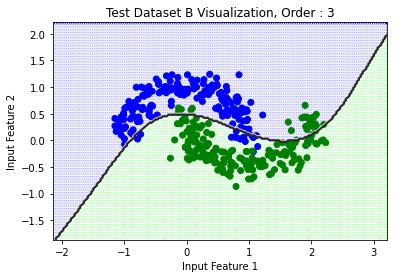

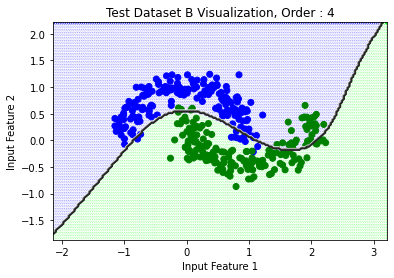

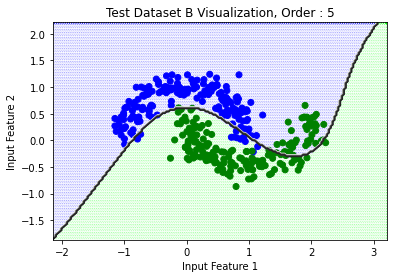

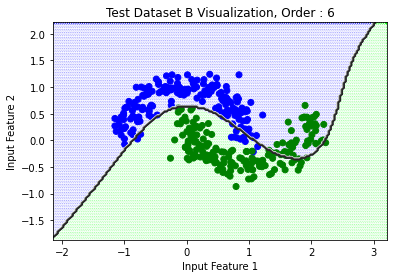

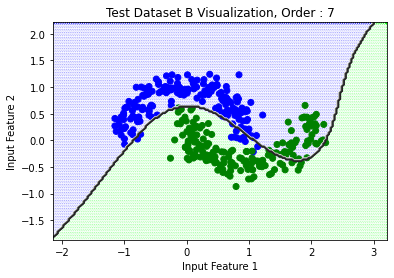

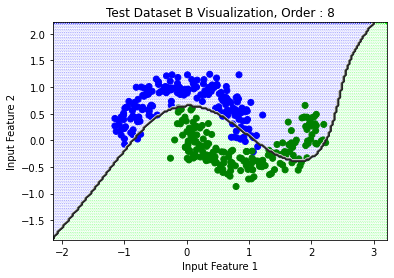

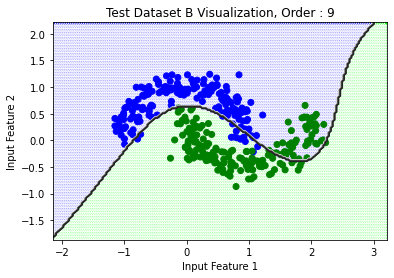

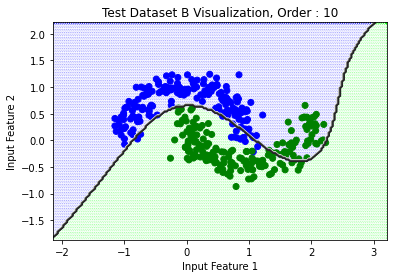

In [145]:
# Plotting test data with decision boundary

for i,l in enumerate(lin_regs):
    h = .03
    plt.title("Test Dataset B Visualization, Order : "+str(i+3))
    plt.xlabel("Input Feature 1")
    plt.ylabel("Input Feature 2")
    x_min, x_max = test_X_data_b[:, 0].min() - 1, test_X_data_b[:, 0].max() + 1
    y_min, y_max = test_X_data_b[:, 1].min() - 1, test_X_data_b[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = l.predict(scale_X(addFeatures(np.c_[xx.ravel(), yy.ravel()],i+3)),threshold=0.5)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.binary)
    plt.scatter(xx,yy,c=Z,cmap="brg", edgecolor='w')
    plt.scatter(test_X_data_b.T[0],test_X_data_b.T[1],color=['blue' if l==0 else 'green' for l in test_y_data_b])

    plt.show()

## Problem 3, Part D: Multi-class Logistic Regression

## Multi-class Logistic Regression

In case of a multi-class classification problem (when the number of classes is greater than two), a **softmax function** is used instead. 
$$\text{Softmax}(\theta_{i}) = \frac{\exp(\theta_i)}{\sum_{j=1}^{N} \exp(\theta_j)}$$ where $j$ varies from $1$ to $N$ which is the number of classes and  $\theta_{i}$ is $$\theta_{i}=W_{i}*x^{(i)}+b$$ Where $x^{(i)}$ is a feature  vector of dimensions $D \times 1$ and $W_{i}$ is the $i$-th row of the weight matrix $ W$ of  dimensions $N \times D$  and $b$ is the bias having dimensions $D \times 1$.


Use Dataset D (``data_prob3_partd.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [146]:
# Loading dataset

data_d = pd.read_csv('./data_prob3_partd.csv')
data_d.head()

Input feature 1  Input feature 2  Output label
0             40.7            42.20           2.0
1             26.5             3.80           1.0
2             42.1            43.00           2.0
3             39.3            46.30           2.0
4             23.0             5.27           1.0

In [147]:
# Splitting dataset into train and test

X_data = (np.array([data_d["Input feature 1"],data_d["Input feature 2"]])).T
y_data = np.array([data_d["Output label"]]).T

train_X_data_d,test_X_data_d,train_y_data_d,test_y_data_d = sklearn.model_selection.train_test_split(X_data,y_data,train_size = 0.75,random_state=42)

print("Train X shape:"+str(train_X_data_d.shape))
print("Train Y shape:"+str(train_y_data_d.shape))
print("Test X shape:"+str(test_X_data_d.shape))
print("Test Y shape:"+str(test_y_data_d.shape))
print(np.unique(y_data))

Train X shape:(1125, 2)
Train Y shape:(1125, 1)
Test X shape:(375, 2)
Test Y shape:(375, 1)
[0. 1. 2.]


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

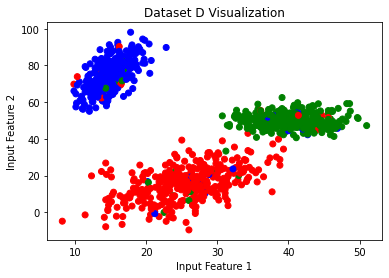

In [148]:
# Plotting test data with decision boundary

plt.scatter(train_X_data_d.T[0],train_X_data_d.T[1],color=['blue' if l==0 else 'red' if l==1 else 'green' for l in train_y_data_d])
plt.title("Dataset D Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.show()

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [149]:
# Class for running multiclass logistic regression

class MultiClassLogisticRegression:
    
    # Initializing params
    
    def __init__(self, lr=0.01, num_iter=100000, add_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.add_intercept = add_intercept
        self.verbose = verbose
    
    # Add intercept to the X
    
    def make_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # Function to calculate softmax
    
    def softmax(self,z):
        sum_val = np.sum(np.exp(-z),axis=1)
        sum_val = np.reshape(sum_val,(sum_val.shape[0],1))
        return np.exp(-z)/sum_val
    
    # Function to calculate loss
    
    def loss(self, h, y):
        return (np.mean((-np.log(h)*y)))

    # Function to train the model
    
    def fit(self, X, y):
        if self.add_intercept:
            X = self.make_intercept(X)
        
        # weights initialization
        
        self.W = np.zeros((X.shape[1],y.shape[1]))
        
        # Train loop
        
        for i in range(self.num_iter):
            
            # Calculate gradient
            
            z = np.dot(X, self.W)
            h = self.softmax(z)
            k = np.subtract(h,y)
            gradient = -np.dot(X.T, k) / len(y)
            self.W = np.subtract(self.W,self.lr * gradient)
            
            # Print loss every 100 train steps
            
            if(self.verbose == True and i%100==0):
                z = np.dot(X, self.W)
                h = self.softmax(z)
                print('loss:'+str(self.loss(h, y)))
    
    # Functions to get prediction
    
    def predict_probabaility(self, X):
        if self.add_intercept:
            X = self.make_intercept(X)
    
        return (self.softmax(np.dot(X, self.W)))
    
    def predict(self, X):
        return (np.argmax(self.predict_probabaility(X),axis=1))


In [150]:
# Training the model

train_X_data_d_scale = scale_X(train_X_data_d)
m_l_reg = MultiClassLogisticRegression(lr=0.1,verbose= True,num_iter=10000)

train_y_data_d_oneHot = sklearn.preprocessing.OneHotEncoder().fit(train_y_data_d).transform(train_y_data_d).toarray()
m_l_reg.fit(train_X_data_d_scale,train_y_data_d_oneHot)

loss:0.3497256550350171
loss:0.10670165148338918
loss:0.09815357517716986
loss:0.09635925613608125
loss:0.09579692898864339
loss:0.09558433028867988
loss:0.09549407378893016
loss:0.09545232492629738
loss:0.09543159638136944
loss:0.09542065560343838
loss:0.09541456751559786
loss:0.09541102414920698
loss:0.09540888309931182
loss:0.09540754870204851
loss:0.09540669549698783
loss:0.09540613822389897
loss:0.0954057676629511
loss:0.09540551748079545
loss:0.09540534636127378
loss:0.09540522800749442
loss:0.0954051453641358
loss:0.09540508718488161
loss:0.09540504594404116
loss:0.09540501653934748
loss:0.09540499547118503
loss:0.09540498031449803
loss:0.09540496937374374
loss:0.09540496145421636
loss:0.09540495570849356
loss:0.09540495153208034
loss:0.0954049484917117
loss:0.09540494627560976
loss:0.09540494465867454
loss:0.0954049434779408
loss:0.0954049426151607
loss:0.0954049419843749
loss:0.09540494152300139
loss:0.09540494118542196
loss:0.09540494093835056
loss:0.09540494075747978
loss:0.

Print the final weights.

In [151]:
print(m_l_reg.W.T)

[[ 0.16801538  1.22229641 -1.17393684]
 [-0.15745374  0.50537497  2.02956059]
 [-0.01056163 -1.72767137 -0.85562375]]


In [152]:
def m_accuracy(test,pred):
    tot_sum=0
    diff = test-pred
    for i in diff:
        if(i!=0):
            tot_sum+=1
    return(100-tot_sum*100/len(test))

Print the final accuracy on test data.

In [153]:
# Printing accuracy

test_X_data_d_scale = scale_X(test_X_data_d)
y_pred = m_l_reg.predict(test_X_data_d_scale)
acc = m_accuracy(test_y_data_d,y_pred.reshape(-1,1))
print("Accuracy Percentage on Test Data: "+str(acc))

Accuracy Percentage on Test Data: 96.8


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

In [154]:
# Creating mesh for plotting decision boundary

h = .2
x_min, x_max = test_X_data_d[:, 0].min() - 1, test_X_data_d[:, 0].max() + 1
y_min, y_max = test_X_data_d[:, 1].min() - 1, test_X_data_d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = m_l_reg.predict(scale_X(np.c_[xx.ravel(), yy.ravel()]))

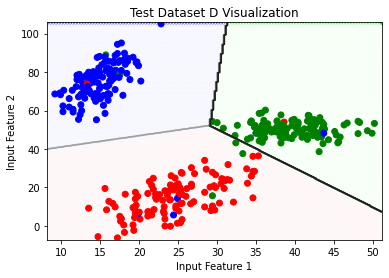

In [155]:
# Plotting test data with decision boundary

plt.title("Test Dataset D Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.binary)
plt.scatter(xx,yy,c=Z,cmap="brg", edgecolor='w')
plt.scatter(test_X_data_d.T[0],test_X_data_d.T[1],color=['blue' if l==0 else 'red' if l==1 else 'green' for l in test_y_data_d])

plt.show()

# Problem 4: Learning on real world datasets

*Cric_data.csv* contains the batting averages and bowling averages of various cricket players along with their role in the team (Bowler/Batsman/Allrounder). The task is to predict the player role based on their batting and bowling averages.

In the next CodeWrite cell, extract the required columns from the csv file, partition the data into training (75%) and testing (25%) data randomly.  

In [168]:
# Extract data and partition

inp = pd.read_csv('Cric_data.csv', usecols=['Batting Average', 'Bowling Average', 'Player Class'])

inp_b = inp[inp["Player Class"]!=0]

# Splitting train and test for both parts

X = np.array([inp["Batting Average"],inp["Bowling Average"]]).T
y = np.array([inp["Player Class"]]).T
X_b = np.array([inp_b["Batting Average"],inp_b["Bowling Average"]]).T
y_b = np.array([inp_b["Player Class"]]).T
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,y,train_size = 0.75,random_state=42)
X_train_b,X_test_b,Y_train_b,Y_test_b = sklearn.model_selection.train_test_split(X_b,y_b,train_size = 0.75,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(np.unique(y))
print(X_train_b.shape)
print(X_test_b.shape)
print(Y_train_b.shape)
print(Y_test_b.shape)
print(np.unique(y_b))
np.random.seed(0)

(954, 2)
(318, 2)
(954, 1)
(318, 1)
[-1  0  1]
(625, 2)
(209, 2)
(625, 1)
(209, 1)
[-1  1]


**Binary Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider only batsmen and bowlers in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

1a) Linear Predictor: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, I)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, I)$. 

1b) Bayes Classifier: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, \Sigma_-)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, \Sigma_+)$. 

In [169]:
def Lin_clsf_1a(X_train, Y_train, X_test):
    """ Give prediction for test data using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    
    # Creating dataframe for easier data management
    
    data = {"Batting Average":list(X_train[:,0]),"Bowling Average":list(X_train[:,1]),"Player Class":list(Y_train.reshape(len(Y_train)))}
    data = pd.DataFrame(data)
    groups = data.groupby("Player Class")
    
    # Getting mean of batsman class
    
    mu_min = groups.get_group(-1).mean()
    mu_min = np.array(mu_min[:2])
    
    # Getting mean of bowler class
    
    mu_pls = groups.get_group(1).mean()
    mu_pls = np.array(mu_pls[:2])
    
    # Creating distribution using the above means
    
    dist_pls = scipy.stats.multivariate_normal(mean=mu_pls,cov=np.array([[1,0],[0,1]]))
    dist_min = scipy.stats.multivariate_normal(mean=mu_min,cov=np.array([[1,0],[0,1]]))

    # Predicting using the pdfs
    
    out = []
    for i in X_test:
        p_pls = dist_pls.pdf(i)
        p_min = dist_min.pdf(i)
        
        if(p_pls>p_min):
            out.append(1)
        else:
            
            out.append(-1)
    return np.array(out).reshape(-1,1)
        
    
def Bayes_clsf_1b(X_train, Y_train, X_test):
    """ Give prediction for test data using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    
    # Creating dataframe for easier data management
    
    data = {"Batting Average":list(X_train[:,0]),"Bowling Average":list(X_train[:,1]),"Player Class":list(Y_train.reshape(len(Y_train)))}
    data = pd.DataFrame(data)
    groups = data.groupby("Player Class")
    X_pls = groups.get_group(1)
    X_pls = np.array([X_pls["Batting Average"],X_pls["Bowling Average"]])
    X_min = groups.get_group(-1)
    X_min = np.array([X_min["Batting Average"],X_min["Bowling Average"]])
    
    # Getting mean of batsman class
    
    mu_min = groups.get_group(-1).mean()
    mu_min = np.array(mu_min[:2])
    
    # Getting mean of bowler class
    
    mu_pls = groups.get_group(1).mean()
    mu_pls = np.array(mu_pls[:2])
    
    # Creating distribution using the above means (Added covariance in cov)
    
    dist_pls = scipy.stats.multivariate_normal(mean=mu_pls,cov=np.cov(X_pls))
    dist_min = scipy.stats.multivariate_normal(mean=mu_min,cov=np.cov(X_min))

    # Predicting using the pdfs
    
    out = []
    for i in X_test:
        p_pls = dist_pls.pdf(i)
        p_min = dist_min.pdf(i)
        
        if(p_pls>p_min):
            out.append(1)
        else:
            
            out.append(-1)
    return np.array(out).reshape(-1,1)

In [170]:
# Loss function

def BinaryLoss(y,pred):
    return np.sum(np.abs(y-pred))  

In [171]:
# Printing the loss

pred_lin_b = Lin_clsf_1a(X_train_b,Y_train_b,X_test_b)
pred_bay_b = Bayes_clsf_1b(X_train_b,Y_train_b,X_test_b)

lin_loss_b = BinaryLoss(Y_test_b,pred_lin_b)
bay_loss_b = BinaryLoss(Y_test_b,pred_bay_b)

print("Loss of Linear : "+str(lin_loss_b))
print("Loss of Bayes : "+str(bay_loss_b))


Loss of Linear : 56
Loss of Bayes : 26


**Multi-class Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider batsmen, bowlers and allrounders in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

The $3\times 3$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below. (Ordering: Batsman - Allrounder - Bowler)

$L=\begin{bmatrix} 0 &1 & 2\\ 1 &0 & 1\\ 2 &1 & 0\end{bmatrix}$ 

2a) Linear Predictor: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, I)$

2b) Bayes Classifier: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, \Sigma_a)$

In [172]:


def Lin_clsf_2a(X_train, Y_train, X_test):
    """ Give prediction for test data using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,3)
    Y_train: +1/0/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,3)

    Returns:
    Y_test_pred : +1/0/-1 numpy array of shape (m,)

    """
        
    # Creating dataframe for easier data management
    
    data = {"Batting Average":list(X_train[:,0]),"Bowling Average":list(X_train[:,1]),"Player Class":list(Y_train.reshape(len(Y_train)))}
    data = pd.DataFrame(data)
    groups = data.groupby("Player Class")
    
    # Getting mean of batsman class
    
    mu_bat = groups.get_group(-1).mean()
    mu_bat = np.array(mu_bat[:2])
    
    # Getting mean of all rounder class
    
    mu_all = groups.get_group(0).mean()
    mu_all = np.array(mu_all[:2])
    
    # Getting mean of bowler class
    
    mu_bwl = groups.get_group(1).mean()
    mu_bwl = np.array(mu_bwl[:2])
    
    # Creating distribution using the above means
    
    dist_bwl = scipy.stats.multivariate_normal(mean=mu_bwl,cov=np.array([[1,0],[0,1]]))
    dist_bat = scipy.stats.multivariate_normal(mean=mu_bat,cov=np.array([[1,0],[0,1]]))
    dist_all = scipy.stats.multivariate_normal(mean=mu_all,cov=np.array([[1,0],[0,1]]))
    
    # Predicting using the pdfs
    
    out = []
    for i in X_test:
        p_bat = dist_bat.pdf(i)
        p_bwl = dist_bwl.pdf(i)
        p_all = dist_all.pdf(i)
        p_l = [p_bat,p_all,p_bwl]
        out.append(p_l.index(max(p_l))-1)
    return np.array(out).reshape(-1,1)





def Bayes_clsf_2b(X_train, Y_train, X_test):
    """ Give prediction for test data using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,3)
    Y_train: +1/0/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,3)

    Returns:
    Y_test_pred : +1/0/-1 numpy array of shape (m,)

    """
    
    # Creating dataframe for easier data management
    
    data = {"Batting Average":list(X_train[:,0]),"Bowling Average":list(X_train[:,1]),"Player Class":list(Y_train.reshape(len(Y_train)))}
    data = pd.DataFrame(data)
    groups = data.groupby("Player Class")
    
    # Getting mean of batsman class
    
    X_bat = groups.get_group(-1)
    X_bat = np.array([X_bat["Batting Average"],X_bat["Bowling Average"]])
    X_bwl = groups.get_group(1)
    X_bwl = np.array([X_bwl["Batting Average"],X_bwl["Bowling Average"]])
    X_all = groups.get_group(0)
    X_all = np.array([X_all["Batting Average"],X_all["Bowling Average"]])
    
    
    # Getting mean of batsman class
    
    mu_bat = groups.get_group(-1).mean()
    mu_bat = np.array(mu_bat[:2])
    # Getting mean of all rounder class
    
    mu_all = groups.get_group(0).mean()
    mu_all = np.array(mu_all[:2])
    # Getting mean of batsman class
    
    mu_bwl = groups.get_group(1).mean()
    mu_bwl = np.array(mu_bwl[:2])
    # Creating distribution using the above means (Added covariance in cov)
    
    
    dist_bwl = scipy.stats.multivariate_normal(mean=mu_bwl,cov=np.cov(X_bwl))
    dist_bat = scipy.stats.multivariate_normal(mean=mu_bat,cov=np.cov(X_bat))
    dist_all = scipy.stats.multivariate_normal(mean=mu_all,cov=np.cov(X_all))
    
    # Predicting using the pdfs
    
    out = []
    for i in X_test:
        p_bat = dist_bat.pdf(i)
        p_bwl = dist_bwl.pdf(i)
        p_all = dist_all.pdf(i)
        p_l = [p_bat,p_all,p_bwl]
        out.append(p_l.index(max(p_l))-1)
    return np.array(out).reshape(-1,1)

In [173]:
def MulLoss(y,pred):
    loss_mat = np.array([[0,1,2],[1,0,1],[2,1,0]])
    
    return np.sum(loss_mat[y.ravel()+1,pred.ravel()+1])

In [174]:
pred_lin = Lin_clsf_2a(X_train,Y_train,X_test)
pred_bay = Bayes_clsf_2b(X_train,Y_train,X_test)

lin_loss = MulLoss(Y_test,pred_lin)
bay_loss = MulLoss(Y_test,pred_bay)

print("Loss of Linear : "+str(lin_loss))
print("Loss of Bayes : "+str(bay_loss))

Loss of Linear : 120
Loss of Bayes : 125


**Plots:**

In the next CodeWrite cell, plot all the 4 classifiers on a 2d plot. Take a suitable grid covering averages (0,60) in both dimensions. (Color the different classes accordingly). Add the training data points also on the plot. Label the plots appropriately. 

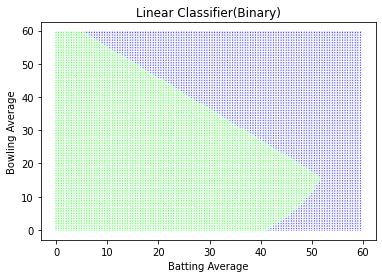

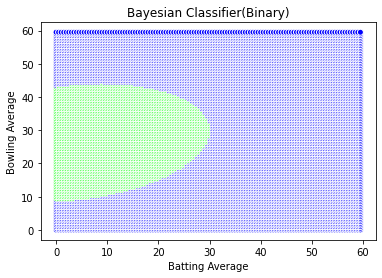

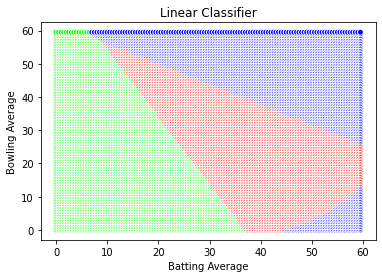

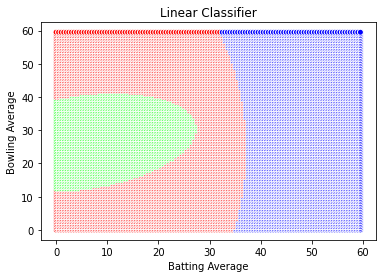

In [175]:
# Plotting decision boundaries

div = 0.5

xx,yy = np.meshgrid(np.arange(0,60,div),np.arange(0,60,div))
Z_lin_b = Lin_clsf_1a(X_train_b,Y_train_b,np.c_[xx.ravel(), yy.ravel()])
Z_lin = Lin_clsf_2a(X_train,Y_train,np.c_[xx.ravel(), yy.ravel()])
Z_bay_b = Bayes_clsf_1b(X_train_b,Y_train_b,np.c_[xx.ravel(), yy.ravel()])
Z_bay = Bayes_clsf_2b(X_train,Y_train,np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx,yy,c=Z_lin_b,cmap="brg",s=5, edgecolor='w')
plt.title("Linear Classifier(Binary)")
plt.xlabel("Batting Average")
plt.ylabel("Bowling Average")
plt.show()
plt.scatter(xx,yy,c=Z_bay_b,cmap="brg", edgecolor='w')
plt.title("Bayesian Classifier(Binary)")
plt.xlabel("Batting Average")
plt.ylabel("Bowling Average")
plt.show()

plt.scatter(xx,yy,c=Z_lin,cmap="brg", edgecolor='w')
plt.title("Linear Classifier")
plt.xlabel("Batting Average")
plt.ylabel("Bowling Average")
plt.show()
plt.scatter(xx,yy,c=Z_bay,cmap="brg", edgecolor='w')
plt.title("Linear Classifier")
plt.xlabel("Batting Average")
plt.ylabel("Bowling Average")

plt.show()

**Observations:**

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the four learnt classifiers, and also give the error rate of the four classifiers as a 2x2 table.

# Observation

 - ###### We see from the classifier plots that the Linear Classifier has linear boundaries and Bayes classifier has mostly curved boundaries
 
 - ###### We see that the Linear classifier does better than Bayes classifier in both the cases.
 
 - ###### In case of Binary classification, we assumed the covariance matrix of Linear Classifier to be $I$ matrix, i.e. the variables were independant to one another, and in Bayes classifier, we assumed the variables to have some dependece by calculating the covariance matrix. From this assumption, and from the error result, we can come to a conclusion that using the covariance between variables is very useful.
 
 - ###### Since the errors were almost similar in Multi-Class classification, we see that the errors are almost similar. This shows that using covariance in Multi-Class classification is not that useful.

#### Error Rate of the Classifiers :
||Linear|Bayes|
|----|----|---|
|__Binary__| 56 |26  |
|__Multi-Class__|120|125|